# Required Libraries

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = None
pd.options.display.max_columns = None

import numpy as np
import pandas as pd
import datetime


from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler


import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


from scipy import stats

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from scipy import stats
from scipy.stats import shapiro

from statsmodels.graphics.gofplots import qqplot

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PowerTransformer

# Data Understanding

In [2]:
data=pd.read_csv("DataCoSupplyChainDataset.csv", encoding= 'unicode_escape')
data.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   

   Customer Zipcode  Department Id Department Name   Latitude   Longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Customer Id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0         1/31/2018 22:56     77202                    1360   
1         1/13/2018 12:27     75939                    1360   
2         1/13/2018 12:06     75938                    1360   
3         1/13/2018 11:45     75937                    1360   
4         1/13/2018 11:24     75936                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75             

# Missing Values

In [3]:
data.isna().sum()/len(data)*100

Type                               0.000000
Days for shipping (real)           0.000000
Days for shipment (scheduled)      0.000000
Benefit per order                  0.000000
Sales per customer                 0.000000
Delivery Status                    0.000000
Late_delivery_risk                 0.000000
Category Id                        0.000000
Category Name                      0.000000
Customer City                      0.000000
Customer Country                   0.000000
Customer Email                     0.000000
Customer Fname                     0.000000
Customer Id                        0.000000
Customer Lname                     0.004432
Customer Password                  0.000000
Customer Segment                   0.000000
Customer State                     0.000000
Customer Street                    0.000000
Customer Zipcode                   0.001662
Department Id                      0.000000
Department Name                    0.000000
Latitude                        

In [4]:
data.shape

(180519, 53)

 Our dataset has 53 columns and 180519 Rows.
 There are 4 columns that have missing values.
 The percentage of missing values exceeds 20% for the two variables, "Product Description" & "Order Zipcode" 
 and hence we need to drop them.
 The variables, Customer Lname and Customer Zipcode has less than 10 missing values. 
 We can remove the Customer Lname and Customer Zipcode as these do not contribute to our analysis.

In [5]:
df=data.copy()

In [6]:
data[data.duplicated()]
# no duplicates

Empty DataFrame
Columns: [Type, Days for shipping (real), Days for shipment (scheduled), Benefit per order, Sales per customer, Delivery Status, Late_delivery_risk, Category Id, Category Name, Customer City, Customer Country, Customer Email, Customer Fname, Customer Id, Customer Lname, Customer Password, Customer Segment, Customer State, Customer Street, Customer Zipcode, Department Id, Department Name, Latitude, Longitude, Market, Order City, Order Country, Order Customer Id, order date (DateOrders), Order Id, Order Item Cardprod Id, Order Item Discount, Order Item Discount Rate, Order Item Id, Order Item Product Price, Order Item Profit Ratio, Order Item Quantity, Sales, Order Item Total, Order Profit Per Order, Order Region, Order State, Order Status, Order Zipcode, Product Card Id, Product Category Id, Product Description, Product Image, Product Name, Product Price, Product Status, shipping date (DateOrders), Shipping Mode]
Index: []

In [7]:
df.select_dtypes("object").nunique()

Type                              4
Delivery Status                   4
Category Name                    50
Customer City                   563
Customer Country                  2
Customer Email                    1
Customer Fname                  782
Customer Lname                 1109
Customer Password                 1
Customer Segment                  3
Customer State                   46
Customer Street                7458
Department Name                  11
Market                            5
Order City                     3597
Order Country                   164
order date (DateOrders)       65752
Order Region                     23
Order State                    1089
Order Status                      9
Product Image                   118
Product Name                    118
shipping date (DateOrders)    63701
Shipping Mode                     4
dtype: int64

In [8]:
df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


In [9]:
df.drop(['Category Id','Customer Email','Customer Fname','Customer Lname','Customer Password',
         'Customer Street','Customer Zipcode','Department Id','Latitude','Longitude',
         'Order Item Cardprod Id','Order Item Discount','Order Item Profit Ratio','Order Zipcode',
         'Product Card Id','Product Description','Product Image','Product Price',"Order Customer Id",
         "Benefit per order","Sales per customer","Order Item Id","Product Category Id"],axis=1,inplace=True)

'Category Id'
'Customer Email'
'Customer Fname'
'Customer Lname'
'Customer Password'
'Department Id'
'Customer Zipcode'
**these are all customer specific unique identifiers which are not helpful for analysis.

"Order Item Id"
'Order Item Cardprod Id'
'Order Zipcode'
'Product Image'
**these are all product specific unique identifiers which are not helpful for analysis.

"Order Customer Id"
**exactly same as customer id

"Benefit per order"
**exactly similar to Order Profit Per Order.

"Sales per customer"
**exactly similar to Order Item Total.


'Product Card Id'
** redundent of product name

'Product Description'
**more than 85% of records are null in these variables.


'Customer Street'
'Latitude'
'Longitude'
**redundent columns which would give similar information as other columns like customer city and order city.
**even if we retain these columns, we would need to do feature engineeing operations on these to produce columns with 
#low number of levels similar to customer country and order country.


'Order Item Discount'
#derived column from order_item_discount_rate which is not required for our analysis.

'Order Item Profit Ratio'
**derived from Order Profit Per Order and Order Item Total(Order Profit Per Order/Order Item Total) which is not required for 
**our analysis.

'Product Price'
**redundent column which is similar to Order Item Product Price


"Product Category Id"
**exactly same as category name.

'order date (DateOrders)'
'shipping date (DateOrders)'
**these two columns have been used to derive days for shipping(real) and days for shipping(scheduled)

## Observations

In [10]:
df.shape

(180519, 30)

In [11]:
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

    Delivery Status  Late_delivery_risk   Category Name Customer City  \
0  Advance shipping                   0  Sporting Goods        Caguas   
1     Late delivery                   1  Sporting Goods        Caguas   
2  Shipping on time                   0  Sporting Goods      San Jose   
3  Advance shipping                   0  Sporting Goods   Los Angeles   
4  Advance shipping                   0  Sporting Goods        Caguas   

  Customer Country  Customer Id Customer Segment Customer State  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

  Department Name        Market  Order City Order Country  \
0         Fitness  Pacific Asia      Bekasi     Indonesia   
1         Fitness  Pacific Asia     Bikaner         India   
2         Fitness  Pacific Asia     Bikaner         India   
3         Fitness  Pacific Asia  Townsville     Australia   
4         Fitness  Pacific Asia  Townsville     Australia   

  order date (DateOrders)  Order Id  Order Item Discount Rate  \
0         1/31/2018 22:56     77202                      0.04   
1         1/13/2018 12:27     75939                      0.05   
2         1/13/2018 12:06     75938                      0.06   
3         1/13/2018 11:45     75937                      0.07   
4         1/13/2018 11:24     75936                      0.09   

   Order Item Product Price  Order Item Quantity   Sales  Order Item Total  \
0                    327.75                    1  327.75        314.640015   
1                    327.75                    1  327.75        311.359985   
2                    327.75                    1  327.75        309.720001   
3                    327.75                    1  327.75        304.809998   
4                    327.75                    1  327.75        298.250000   

   Order Profit Per Order    Order Region      Order State     Order Status  \
0               91.250000  Southeast Asia  Java Occidental         COMPLETE   
1             -249.089996      South Asia         Rajastán          PENDING   
2             -247.779999      South Asia         Rajastán           CLOSED   
3               22.860001         Oceania       Queensland         COMPLETE   
4              134.210007         Oceania       Queensland  PENDING_PAYMENT   

   Product Name  Product Status shipping date (DateOrders)   Shipping Mode  
0  Smart watch                0             2/3/2018 22:56  Standard Class  
1  Smart watch                0            1/18/2018 12:27  Standard Class  
2  Smart watch                0            1/17/2018 12:06  Standard Class  
3  Smart watch                0            1/16/2018 11:45  Standard Class  
4  Smart watch                0            1/15/2018 11:24  Standard Class

In [12]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Delivery Status                  0
Late_delivery_risk               0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Region                     0
Order State                      0
Order Status                     0
Product Name                     0
Product Status                   0
shipping date (DateO

In [13]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Delivery Status                   object
Late_delivery_risk                 int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
order date (DateOrders)           object
Order Id                           int64
Order Item Discount Rate         float64
Order Item Product Price         float64
Order Item Quantity                int64
Sales                            float64
Order Item Total                 float64
Order Profit Per Order           float64
Order Region                      object
Order State     

In [18]:
#df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
#df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

In [14]:
df.std()

Days for shipping (real)             1.623722
Days for shipment (scheduled)        1.374449
Late_delivery_risk                   0.497664
Customer Id                       4162.918106
Order Id                         21045.379569
Order Item Discount Rate             0.070415
Order Item Product Price           139.732492
Order Item Quantity                  1.453451
Sales                              132.273077
Order Item Total                   120.043670
Order Profit Per Order             104.433526
Product Status                       0.000000
dtype: float64

In [15]:
df.drop('Product Status',axis=1,inplace=True)
# zero variance.

# Data Description

In [16]:
df.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Late_delivery_risk    Customer Id       Order Id  \
count       180519.000000  180519.000000  180519.000000   
mean             0.548291    6691.379495   36221.894903   
std              0.497664    4162.918106   21045.379569   
min              0.000000       1.000000       1.000000   
25%              0.000000    3258.500000   18057.000000   
50%              1.000000    6457.000000   36140.000000   
75%              1.000000    9779.000000   54144.000000   
max              1.000000   20757.000000   77204.000000   

       Order Item Discount Rate  Order Item Product Price  \
count             180519.000000             180519.000000   
mean                   0.101668                141.232550   
std                    0.070415                139.732492   
min                    0.000000                  9.990000   
25%                    0.040000                 50.000000   
50%                    0.100000                 59.990002   
75%                    0.160000                199.990005   
max                    0.250000               1999.989990   

       Order Item Quantity          Sales  Order Item Total  \
count        180519.000000  180519.000000     180519.000000   
mean              2.127638     203.772096        183.107609   
std               1.453451     132.273077        120.043670   
min               1.000000       9.990000          7.490000   
25%               1.000000     119.980003        104.379997   
50%               1.000000     199.919998        163.990005   
75%               3.000000     299.950012        247.399994   
max               5.000000    1999.989990       1939.989990   

       Order Profit Per Order  
count           180519.000000  
mean                21.974989  
std                104.433526  
min              -4274.979980  
25%                  7.000000  
50%                 31.520000  
75%                 64.800003  
max                911.799988

In [17]:
df.describe(include="object")

Type Delivery Status Category Name Customer City Customer Country  \
count   180519          180519        180519        180519           180519   
unique       4               4            50           563                2   
top      DEBIT   Late delivery        Cleats        Caguas          EE. UU.   
freq     69295           98977         24551         66770           111146   

       Customer Segment Customer State Department Name  Market     Order City  \
count            180519         180519          180519  180519         180519   
unique                3             46              11       5           3597   
top            Consumer             PR        Fan Shop   LATAM  Santo Domingo   
freq              93504          69373           66861   51594           2211   

         Order Country order date (DateOrders)     Order Region Order State  \
count           180519                  180519           180519      180519   
unique             164                   65752               23        1089   
top     Estados Unidos         9/22/2016 22:56  Central America  Inglaterra   
freq             24840                       5            28341        6722   

       Order Status                      Product Name  \
count        180519                            180519   
unique            9                               118   
top        COMPLETE  Perfect Fitness Perfect Rip Deck   
freq          59491                             24515   

       shipping date (DateOrders)   Shipping Mode  
count                      180519          180519  
unique                      63701               4  
top                6/5/2017 12:25  Standard Class  
freq                           10          107752

1.Type- there are 4 types of transcations that happened and majority of them were by using debit card

2.Days for shipping (real) and Days for shipment (scheduled)-the average actual shipment time is more than the average scheduled shipment time.

3.50% of the shipment delivery time is more the average schedule shipment time.

4.Delivery Status-It is observed that more than 50% of the orders are under late delivery order status only



*1.benefit per order-minimum benefit per order is -4274 which is either an anolmaly or is a major loos bearing order, we have to check accordingly

*2.Order Profit Per Order is similar to benefit per order 


In [18]:
df.skew()

Days for shipping (real)         0.084771
Days for shipment (scheduled)   -0.731998
Late_delivery_risk              -0.194074
Customer Id                      0.488768
Order Id                         0.032709
Order Item Discount Rate         0.340928
Order Item Product Price         3.191020
Order Item Quantity              0.880252
Sales                            2.884249
Order Item Total                 2.888446
Order Profit Per Order          -4.741834
dtype: float64

In [19]:
df.shape

(180519, 29)

# Scaling

In [20]:
df_num = df.select_dtypes(include=[np.number])
df_num.head(2)

Days for shipping (real)  Days for shipment (scheduled)  \
0                         3                              4   
1                         5                              4   

   Late_delivery_risk  Customer Id  Order Id  Order Item Discount Rate  \
0                   0        20755     77202                      0.04   
1                   1        19492     75939                      0.05   

   Order Item Product Price  Order Item Quantity   Sales  Order Item Total  \
0                    327.75                    1  327.75        314.640015   
1                    327.75                    1  327.75        311.359985   

   Order Profit Per Order  
0               91.250000  
1             -249.089996

In [21]:
df_cont = df_num[['Order Item Discount Rate',
                  'Order Item Product Price','Sales','Order Item Total','Order Profit Per Order']]
df_cont.head()

Order Item Discount Rate  Order Item Product Price   Sales  \
0                      0.04                    327.75  327.75   
1                      0.05                    327.75  327.75   
2                      0.06                    327.75  327.75   
3                      0.07                    327.75  327.75   
4                      0.09                    327.75  327.75   

   Order Item Total  Order Profit Per Order  
0        314.640015               91.250000  
1        311.359985             -249.089996  
2        309.720001             -247.779999  
3        304.809998               22.860001  
4        298.250000              134.210007

In [22]:
df_nc=df_num[['Days for shipping (real)','Days for shipment (scheduled)', 'Late_delivery_risk',
       'Customer Id','Order Id','Order Item Quantity']]
df_nc.head()

Days for shipping (real)  Days for shipment (scheduled)  \
0                         3                              4   
1                         5                              4   
2                         4                              4   
3                         3                              4   
4                         2                              4   

   Late_delivery_risk  Customer Id  Order Id  Order Item Quantity  
0                   0        20755     77202                    1  
1                   1        19492     75939                    1  
2                   0        19491     75938                    1  
3                   0        19490     75937                    1  
4                   0        19489     75936                    1

In [23]:
df_cat=df.select_dtypes("object")
df_cat.head()

Type   Delivery Status   Category Name Customer City Customer Country  \
0     DEBIT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   
1  TRANSFER     Late delivery  Sporting Goods        Caguas      Puerto Rico   
2      CASH  Shipping on time  Sporting Goods      San Jose          EE. UU.   
3     DEBIT  Advance shipping  Sporting Goods   Los Angeles          EE. UU.   
4   PAYMENT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   

  Customer Segment Customer State Department Name        Market  Order City  \
0         Consumer             PR         Fitness  Pacific Asia      Bekasi   
1         Consumer             PR         Fitness  Pacific Asia     Bikaner   
2         Consumer             CA         Fitness  Pacific Asia     Bikaner   
3      Home Office             CA         Fitness  Pacific Asia  Townsville   
4        Corporate             PR         Fitness  Pacific Asia  Townsville   

  Order Country order date (DateOrders)    Order Region      Order State  \
0     Indonesia         1/31/2018 22:56  Southeast Asia  Java Occidental   
1         India         1/13/2018 12:27      South Asia         Rajastán   
2         India         1/13/2018 12:06      South Asia         Rajastán   
3     Australia         1/13/2018 11:45         Oceania       Queensland   
4     Australia         1/13/2018 11:24         Oceania       Queensland   

      Order Status  Product Name shipping date (DateOrders)   Shipping Mode  
0         COMPLETE  Smart watch              2/3/2018 22:56  Standard Class  
1          PENDING  Smart watch             1/18/2018 12:27  Standard Class  
2           CLOSED  Smart watch             1/17/2018 12:06  Standard Class  
3         COMPLETE  Smart watch             1/16/2018 11:45  Standard Class  
4  PENDING_PAYMENT  Smart watch             1/15/2018 11:24  Standard Class

In [24]:
ss = StandardScaler()

In [25]:
df_cont_scaled = pd.DataFrame(data=ss.fit_transform(df_cont),columns=df_cont.columns)
df_cont_scaled.head()

Order Item Discount Rate  Order Item Product Price    Sales  \
0                 -0.875782                  1.334822  0.93729   
1                 -0.733767                  1.334822  0.93729   
2                 -0.591751                  1.334822  0.93729   
3                 -0.449736                  1.334822  0.93729   
4                 -0.165706                  1.334822  0.93729   

   Order Item Total  Order Profit Per Order  
0          1.095708                0.663343  
1          1.068384               -2.595582  
2          1.054722               -2.583038  
3          1.013820                0.008474  
4          0.959174                1.074706

In [26]:
df_cont_scaled.skew()

Order Item Discount Rate    0.340928
Order Item Product Price    3.191020
Sales                       2.884249
Order Item Total            2.888446
Order Profit Per Order     -4.741834
dtype: float64

In [27]:
df_fin=pd.concat([df_cont_scaled,df_nc,df_cat],axis=1)
df_fin.head()

Order Item Discount Rate  Order Item Product Price    Sales  \
0                 -0.875782                  1.334822  0.93729   
1                 -0.733767                  1.334822  0.93729   
2                 -0.591751                  1.334822  0.93729   
3                 -0.449736                  1.334822  0.93729   
4                 -0.165706                  1.334822  0.93729   

   Order Item Total  Order Profit Per Order  Days for shipping (real)  \
0          1.095708                0.663343                         3   
1          1.068384               -2.595582                         5   
2          1.054722               -2.583038                         4   
3          1.013820                0.008474                         3   
4          0.959174                1.074706                         2   

   Days for shipment (scheduled)  Late_delivery_risk  Customer Id  Order Id  \
0                              4                   0        20755     77202   
1                              4                   1        19492     75939   
2                              4                   0        19491     75938   
3                              4                   0        19490     75937   
4                              4                   0        19489     75936   

   Order Item Quantity      Type   Delivery Status   Category Name  \
0                    1     DEBIT  Advance shipping  Sporting Goods   
1                    1  TRANSFER     Late delivery  Sporting Goods   
2                    1      CASH  Shipping on time  Sporting Goods   
3                    1     DEBIT  Advance shipping  Sporting Goods   
4                    1   PAYMENT  Advance shipping  Sporting Goods   

  Customer City Customer Country Customer Segment Customer State  \
0        Caguas      Puerto Rico         Consumer             PR   
1        Caguas      Puerto Rico         Consumer             PR   
2      San Jose          EE. UU.         Consumer             CA   
3   Los Angeles          EE. UU.      Home Office             CA   
4        Caguas      Puerto Rico        Corporate             PR   

  Department Name        Market  Order City Order Country  \
0         Fitness  Pacific Asia      Bekasi     Indonesia   
1         Fitness  Pacific Asia     Bikaner         India   
2         Fitness  Pacific Asia     Bikaner         India   
3         Fitness  Pacific Asia  Townsville     Australia   
4         Fitness  Pacific Asia  Townsville     Australia   

  order date (DateOrders)    Order Region      Order State     Order Status  \
0         1/31/2018 22:56  Southeast Asia  Java Occidental         COMPLETE   
1         1/13/2018 12:27      South Asia         Rajastán          PENDING   
2         1/13/2018 12:06      South Asia         Rajastán           CLOSED   
3         1/13/2018 11:45         Oceania       Queensland         COMPLETE   
4         1/13/2018 11:24         Oceania       Queensland  PENDING_PAYMENT   

   Product Name shipping date (DateOrders)   Shipping Mode  
0  Smart watch              2/3/2018 22:56  Standard Class  
1  Smart watch             1/18/2018 12:27  Standard Class  
2  Smart watch             1/17/2018 12:06  Standard Class  
3  Smart watch             1/16/2018 11:45  Standard Class  
4  Smart watch             1/15/2018 11:24  Standard Class

In [28]:
df_fin.shape

(180519, 29)

# Outlier Analysis

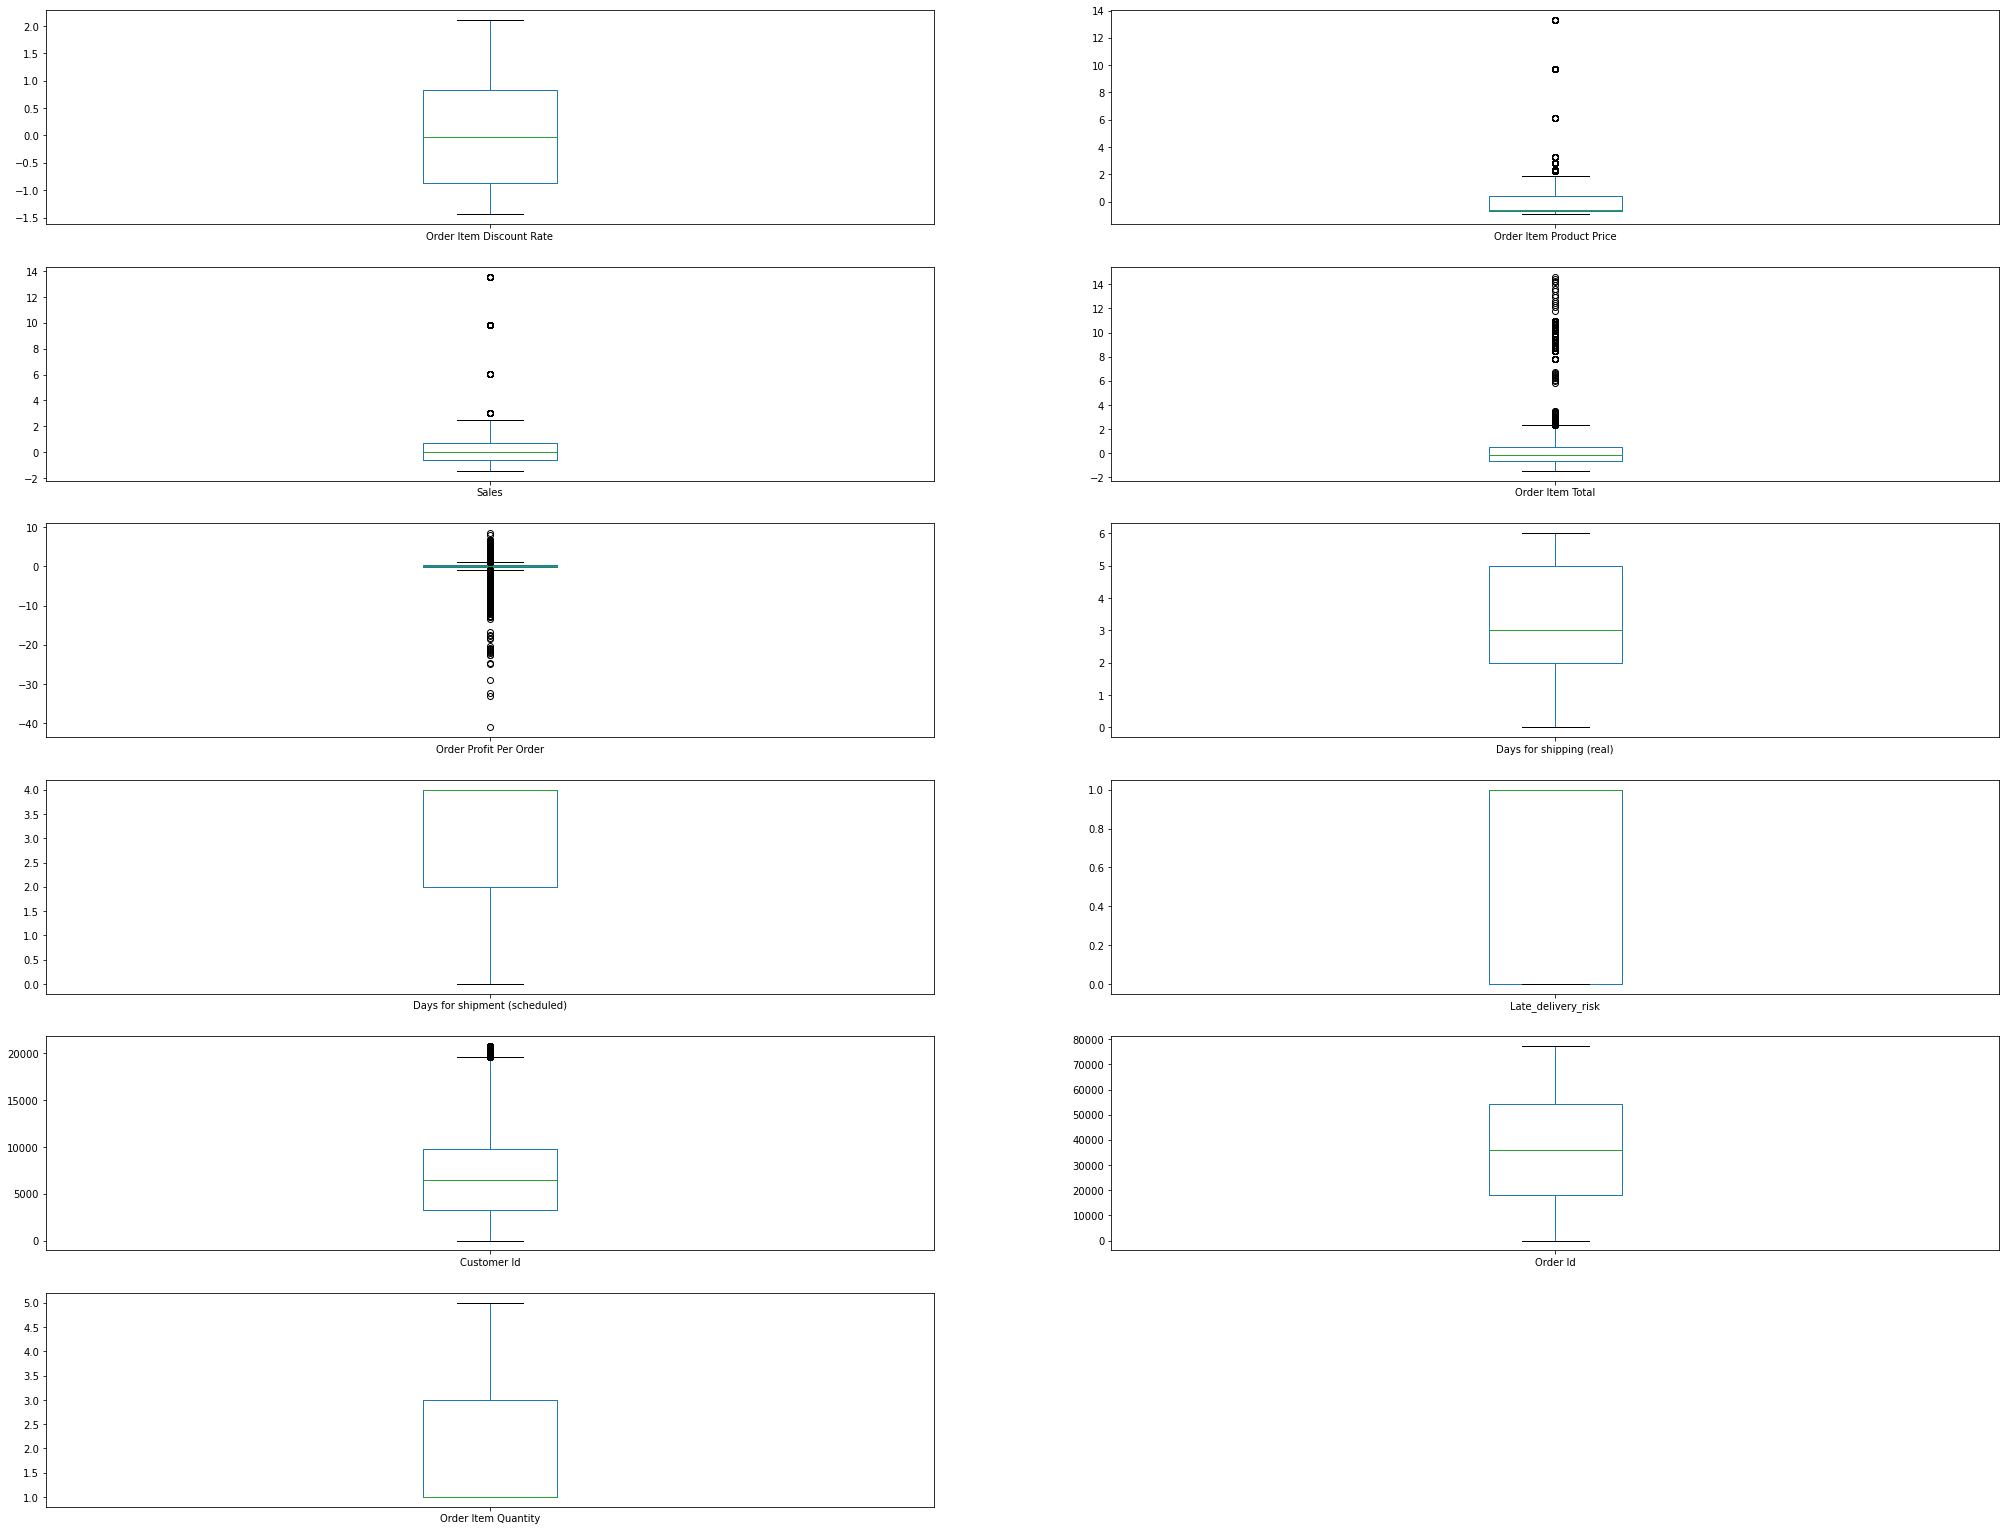

In [34]:
df_fin.plot(kind="box",subplots=True,layout=(15,2),figsize=(35,70))
plt.show()

<AxesSubplot:>

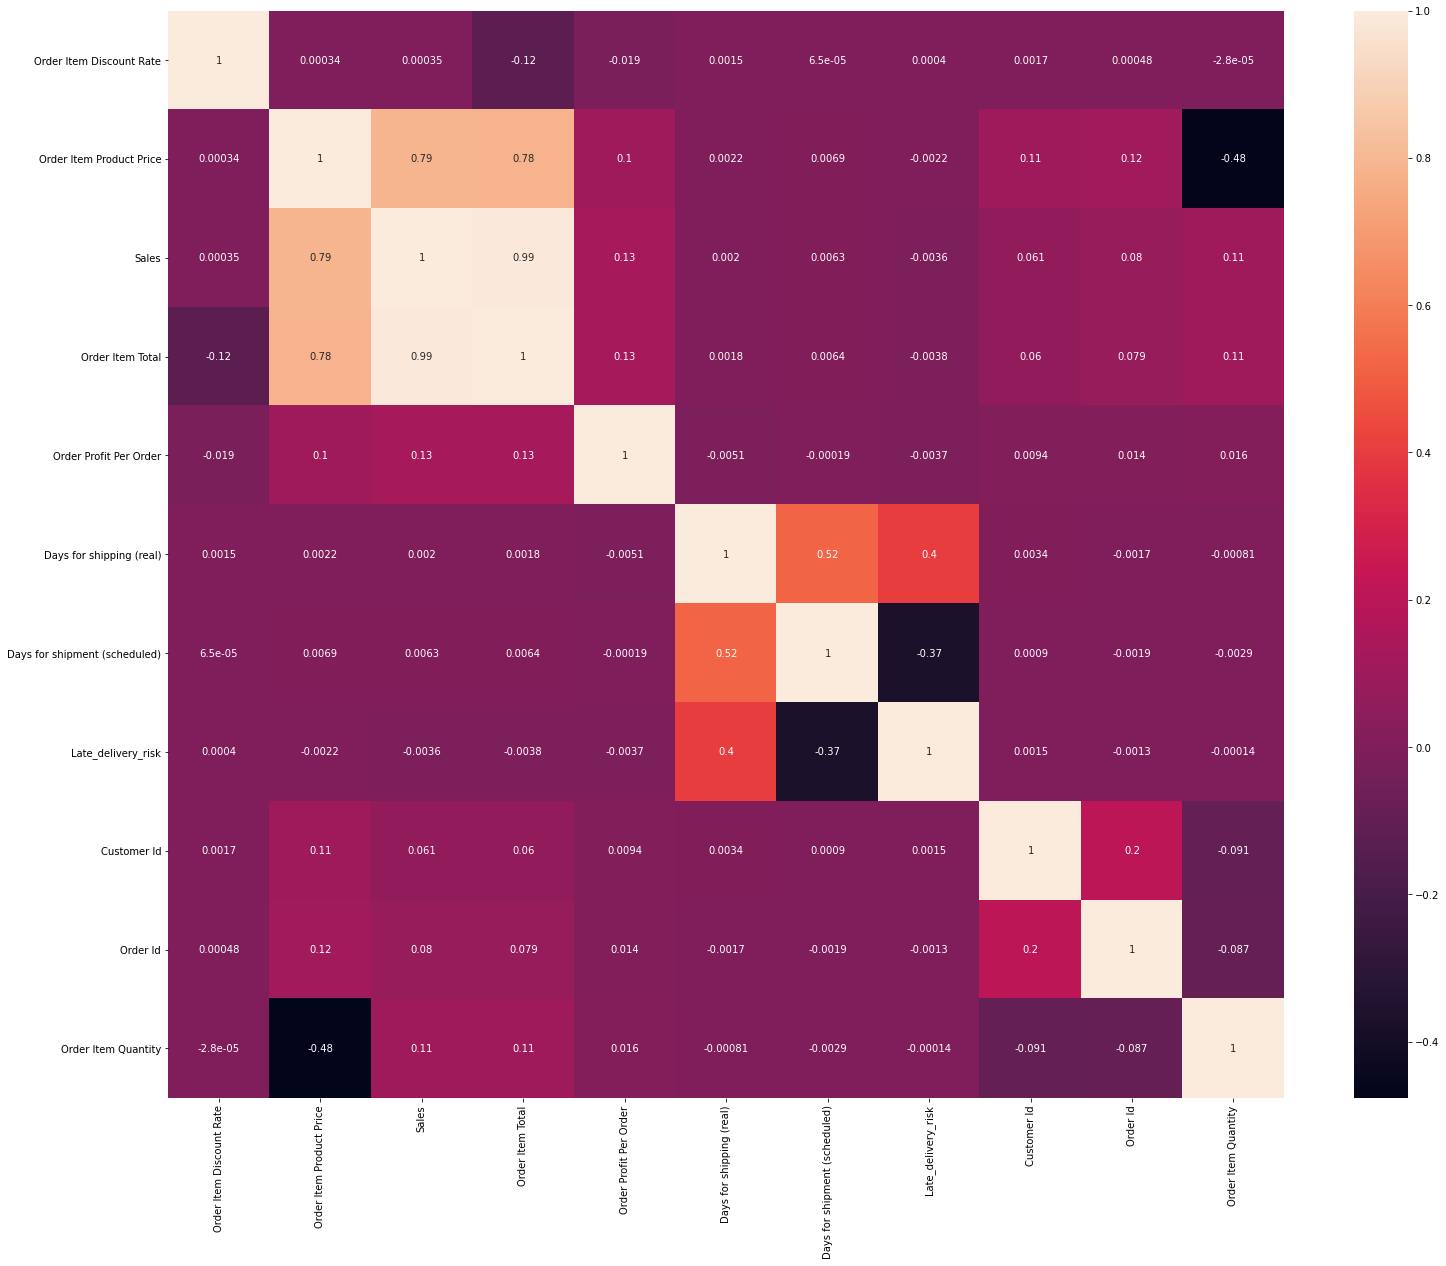

In [35]:
plt.figure(figsize=(25,20))
sns.heatmap(df_fin.corr(),annot=True)

In [36]:
# order_item_total has to be dropeed as it is highly collinear with sales.

In [29]:
df_fin.drop("Order Item Total",axis=1,inplace=True)

In [38]:
# feature engineering neeeds to be done to form columns with low number of sub-categories.

# EDA 

In [30]:
df.shape

(180519, 29)

In [31]:
pd.crosstab(df["Delivery Status"],df["Customer City"]).apply(lambda r:r/r.sum(),axis=0)*100

Customer City      Aguadilla    Alameda     Albany  Albuquerque  Algonquin  \
Delivery Status                                                              
Advance shipping        32.0  28.813559  36.619718    16.847826   14.06250   
Late delivery           40.0  39.830508  43.661972    61.231884   63.28125   
Shipping canceled        0.0   4.237288   5.633803     4.347826   14.06250   
Shipping on time        28.0  27.118644  14.084507    17.572464    8.59375   

Customer City       Alhambra  Allentown  Alpharetta   Amarillo    Anaheim  \
Delivery Status                                                             
Advance shipping   21.367521       34.0   18.867925  24.315068  22.960725   
Late delivery      58.974359       46.0   64.150943  57.191781  58.308157   
Shipping canceled   6.837607        2.0    0.000000   4.109589   8.157100   
Shipping on time   12.820513       18.0   16.981132  14.383562  10.574018   

Customer City      Ann Arbor  Annandale  Annapolis    Antioch       Apex  \
Delivery Status                                                            
Advance shipping   22.162162  16.346154  27.956989  18.731988  28.750000   
Late delivery      68.108108  51.923077  59.139785  50.720461  49.583333   
Shipping canceled   3.243243   1.923077   0.000000   6.628242   7.916667   
Shipping on time    6.486486  29.807692  12.903226  23.919308  13.750000   

Customer City      Apopka    Arecibo  Arlington  Arlington Heights   Asheboro  \
Delivery Status                                                                 
Advance shipping     37.6  32.786885  25.688073          12.121212  13.432836   
Late delivery        32.8  55.737705  48.623853          74.242424  59.701493   
Shipping canceled    15.2   4.098361  10.091743           0.000000   1.492537   
Shipping on time     14.4   7.377049  15.596330          13.636364  25.373134   

Customer City        Astoria    Atlanta    Augusta     Aurora     Austin  \
Delivery Status                                                            
Advance shipping   35.294118  28.605769  24.154589  23.152709  28.980892   
Late delivery      52.941176  50.240385  49.758454  51.724138  51.910828   
Shipping canceled   0.000000   3.125000   5.797101   3.940887   4.458599   
Shipping on time   11.764706  18.028846  20.289855  21.182266  14.649682   

Customer City          Azusa  Bakersfield  Baldwin Park    Ballwin  Baltimore  \
Delivery Status                                                                 
Advance shipping   26.277372    25.129088     22.935780  30.463576  17.522124   
Late delivery      51.824818    54.044750     55.963303  37.748344  65.486726   
Shipping canceled   0.000000     5.851979      4.587156   6.622517   1.946903   
Shipping on time   21.897810    14.974182     16.513761  25.165563  15.044248   

Customer City      Bartlett  Bay Shore    Bayamon  Bayonne    Baytown  \
Delivery Status                                                         
Advance shipping        4.0  30.188679  19.528620  32.8125  31.730769   
Late delivery          60.0  62.264151  58.585859  31.2500  42.307692   
Shipping canceled       0.0   0.000000   4.377104  14.0625   1.923077   
Shipping on time       36.0   7.547170  17.508418  21.8750  24.038462   

Customer City      Beaverton  Bell Gardens  Bellflower  Bellingham     Beloit  \
Delivery Status                                                                 
Advance shipping   16.101695     17.333333   25.352113   21.276596  25.874126   
Late delivery      61.016949     56.666667   58.450704   55.319149  59.440559   
Shipping canceled   1.694915      1.333333    9.859155    6.382979   0.699301   
Shipping on time   21.186441     24.666667    6.338028   17.021277  13.986014   

Customer City           Bend   Bensalem     Berwyn   Billings  Birmingham  \
Delivery Status                                                             
Advance shipping   24.409449  28.915663  28.358209  31.034483   17.142857   
Late delivery      54.7

In [32]:
pd.crosstab(df["Delivery Status"],df["Order City"]).apply(lambda r:r/r.sum(),axis=0)*100

Order City            Aachen  Aalen      Aalst        Aba     Abadan  \
Delivery Status                                                        
Advance shipping   15.873016    0.0   0.000000  33.333333  24.242424   
Late delivery      44.444444  100.0  69.565217  50.000000  45.454545   
Shipping canceled   4.761905    0.0   0.000000   0.000000   0.000000   
Shipping on time   34.920635    0.0  30.434783  16.666667  30.303030   

Order City         Abakaliki  Abbeville  Abbotsford   Abeokuta   Aberdeen  \
Delivery Status                                                             
Advance shipping        50.0  58.333333    0.000000  13.333333   9.523810   
Late delivery            0.0  41.666667   55.555556  46.666667  61.904762   
Shipping canceled        0.0   0.000000    0.000000  13.333333  23.809524   
Shipping on time        50.0   0.000000   44.444444  26.666667   4.761905   

Order City              Abha    Abidjan  Abilene  Abreu e Lima  Abu Kabir  \
Delivery Status                                                             
Advance shipping   45.454545  12.765957      0.0         100.0       12.5   
Late delivery      36.363636  70.212766      0.0           0.0       87.5   
Shipping canceled   0.000000   1.595745      0.0           0.0        0.0   
Shipping on time   18.181818  15.425532    100.0           0.0        0.0   

Order City          Acarigua   Acayucan      Accra  Acerra   Acireale  \
Delivery Status                                                         
Advance shipping   23.076923  58.620690  11.834320     0.0  28.333333   
Late delivery      50.000000  27.586207  64.497041    75.0  48.333333   
Shipping canceled   0.000000  13.793103   4.142012    25.0   0.000000   
Shipping on time   26.923077   0.000000  19.526627     0.0  23.333333   

Order City             Acuña  Acámbaro  Ad Diwaniyah  Ad Diwem      Adana  \
Delivery Status                                                             
Advance shipping   23.333333      25.0     30.555556      25.0  15.748031   
Late delivery      46.666667      75.0     38.888889      35.0  61.417323   
Shipping canceled   0.000000       0.0      0.000000      15.0   4.724409   
Shipping on time   30.000000       0.0     30.555556      25.0  18.110236   

Order City          Adelaide   Adiyaman   Aew?l-li  Afragola  Afyon  \
Delivery Status                                                       
Advance shipping   26.470588   0.000000  33.333333       0.0    0.0   
Late delivery      51.680672  84.615385  66.666667      50.0  100.0   
Shipping canceled   3.781513   0.000000   0.000000       0.0    0.0   
Shipping on time   18.067227  15.384615   0.000000      50.0    0.0   

Order City            Agadir       Agde  Agen   Agra  Agrigento      Ahvaz  \
Delivery Status                                                              
Advance shipping   46.341463  44.444444  50.0  18.75       12.5  49.090909   
Late delivery      34.146341  55.555556  50.0  52.50       75.0  25.454545   
Shipping canceled   7.317073   0.000000   0.0  16.25        0.0   0.000000   
Shipping on time   12.195122   0.000000   0.0  12.50       12.5  25.454545   

Order City         Ain Oussera  Aix-en-Provence  Aix-les-Bains    Ajaccio  \
Delivery Status                                                             
Advance shipping           0.0        25.581395            0.0  42.857143   
Late delivery             75.0        60.465116          100.0  57.142857   
Shipping canceled          0.0         1.162791            0.0   0.000000   
Shipping on time          25.0        12.790698            0.0   0.000000   

Order City             Ajman      Ajmer  Akhisar      Akola      Akron  \
Delivery Status                                                          
Advance shipping   57.142857  30.666667    100.0  38.461538  19.298246   
Late delivery      42.857143  58.666667      0.0  50.000000  66.666667   
Shipping canceled   0.000000   0.000000      0.0   0.000000   0.000000   
Shipping o

In [33]:
pd.crosstab(df["Delivery Status"],df["Order State"]).apply(lambda r:r/r.sum(),axis=0)*100

Order State             Abia    Abruzos       Aceh       Acre   Adamaoua  \
Delivery Status                                                            
Advance shipping   33.333333  31.147541   0.000000  11.111111  50.000000   
Late delivery      50.000000  57.377049  78.947368  47.222222  21.428571   
Shipping canceled   0.000000  11.475410   5.263158  27.777778  28.571429   
Shipping on time   16.666667   0.000000  15.789474  13.888889   0.000000   

Order State          Adamawa      Adana   Adiyaman  Afyonkarahisar      Aichi  \
Delivery Status                                                                 
Advance shipping   66.666667  17.610063   0.000000             0.0  14.285714   
Late delivery      33.333333  57.232704  84.615385           100.0  59.523810   
Shipping canceled   0.000000   3.773585   0.000000             0.0   0.000000   
Shipping on time    0.000000  21.383648  15.384615             0.0  26.190476   

Order State            Ajmán     Akmola    Aksaray  Akwa Ibom  Al Asimah  \
Delivery Status                                                            
Advance shipping   57.142857  36.363636   0.000000  21.052632        0.0   
Late delivery      42.857143  18.181818  16.666667  57.894737        0.0   
Shipping canceled   0.000000   4.545455  16.666667   0.000000        0.0   
Shipping on time    0.000000  40.909091  66.666667  21.052632      100.0   

Order State        Al Bahr al Ahmar  Al Buhayrah  Al Hudayda    Al Jawf  \
Delivery Status                                                           
Advance shipping               28.0    14.285714         0.0  50.000000   
Late delivery                  62.0     0.000000       100.0  29.166667   
Shipping canceled               0.0    71.428571         0.0   0.000000   
Shipping on time               10.0    14.285714         0.0  20.833333   

Order State        Al Marqab    Alabama    Alagoas    Alberta  Alejandría  \
Delivery Status                                                             
Advance shipping         0.0  26.973684  38.431373  32.258065   26.811594   
Late delivery           50.0  48.684211  39.607843  51.612903   42.391304   
Shipping canceled       50.0   6.578947   7.450980   3.225806    7.608696   
Shipping on time         0.0  17.763158  14.509804  12.903226   23.188406   

Order State            Alger  Alibori     Almaty  \
Delivery Status                                    
Advance shipping   20.567376     80.0  16.666667   
Late delivery      57.446809      0.0  16.666667   
Shipping canceled   3.546099      0.0   0.000000   
Shipping on time   18.439716     20.0  66.666667   

Order State        Alsacia-Champaña-Ardenas-Lorena  Alta Austria    Amapá  \
Delivery Status                                                             
Advance shipping                         20.737327     25.263158   7.8125   
Late delivery                            54.377880     61.052632  67.1875   
Shipping canceled                         5.760369      3.157895   3.1250   
Shipping on time                         19.124424     10.526316  21.8750   

Order State        Amasya   Amazonas    Amberes       Amur       Amán  \
Delivery Status                                                         
Advance shipping      0.0  27.480916  25.668449   4.347826  22.772277   
Late delivery        70.0  49.618321  47.593583  43.478261  48.514851   
Shipping canceled     0.0   3.053435   5.882353   0.000000   2.970297   
Shipping on time     30.0  19.847328  20.855615  52.173913  25.742574   

Order State        Analamanga    Anambra     Ancash  Andalucía  \
Delivery Status                                                  
Advance shipping    13.725490  35.416667  29.411765  21.062992   
Late delivery       48.039216  54.166667   0.000000  59.842520   
Shipping canceled    9.803922   0.000000   0.000000   2.362205   
Shipping on time    28.431373  10.416667  70.588235  16.732283   

Order State        Andhra Pradesh    Andiján      Anhui     Ankara     An

In [34]:
pd.crosstab(df["Delivery Status"],df["Late_delivery_risk"])

Late_delivery_risk      0      1
Delivery Status                 
Advance shipping    41592      0
Late delivery           0  98977
Shipping canceled    7754      0
Shipping on time    32196      0

In [35]:
pd.crosstab(df["Delivery Status"],df["Customer Country"]).apply(lambda r:r/r.sum(),axis=0)*100

Customer Country     EE. UU.  Puerto Rico
Delivery Status                          
Advance shipping   22.944595    23.193461
Late delivery      54.870171    54.763381
Shipping canceled   4.247566     4.372018
Shipping on time   17.937668    17.671140

In [36]:
pd.crosstab(df["Delivery Status"],df["Customer Segment"]).apply(lambda r:r/r.sum(),axis=0)*100

Customer Segment    Consumer  Corporate  Home Office
Delivery Status                                     
Advance shipping   22.873888  23.464564    22.801465
Late delivery      54.808350  54.722663    55.070440
Shipping canceled   4.367728   4.126741     4.372246
Shipping on time   17.950034  17.686032    17.755849

In [37]:
pd.crosstab(df["Delivery Status"],df["Market"]).apply(lambda r:r/r.sum(),axis=0)*100

Market                Africa     Europe      LATAM  Pacific Asia       USCA
Delivery Status                                                            
Advance shipping   22.774238  23.091618  23.334109     22.959283  22.601651
Late delivery      54.589289  55.207753  54.355158     55.046049  54.800574
Shipping canceled   3.960737   4.302316   4.428810      4.059622   4.542812
Shipping on time   18.675736  17.398313  17.881924     17.935046  18.054963

In [38]:
pd.crosstab(df["Delivery Status"],df["Department Name"]).apply(lambda r:r/r.sum(),axis=0)*100

Department Name      Apparel  Book Shop  Discs Shop   Fan Shop    Fitness  \
Delivery Status                                                             
Advance shipping   22.817258  21.481481   23.149062  23.037346  23.073820   
Late delivery      54.747133  56.543210   54.442251  54.774831  55.546591   
Shipping canceled   4.314462   3.456790    4.096742   4.229671   4.235579   
Shipping on time   18.121148  18.518519   18.311945  17.958152  17.144010   

Department Name     Footwear       Golf  Health and Beauty    Outdoors  \
Delivery Status                                                          
Advance shipping   23.187608  23.196869           22.928177  23.632046   
Late delivery      54.726334  54.780253           55.801105  55.492463   
Shipping canceled   4.364888   4.370861            4.419890   4.325831   
Shipping on time   17.721170  17.652017           16.850829  16.549659   

Department Name     Pet Shop  Technology  
Delivery Status                           
Advance shipping   18.495935   23.481229  
Late delivery      58.943089   55.017065  
Shipping canceled   4.065041    4.709898  
Shipping on time   18.495935   16.791809

In [39]:
pd.crosstab(df["Delivery Status"],df["Order Region"]).apply(lambda r:r/r.sum(),axis=0)*100

Order Region          Canada  Caribbean  Central Africa  Central America  \
Delivery Status                                                            
Advance shipping   29.405631  24.008175       21.109123        23.167849   
Late delivery      48.800834  53.077663       57.960644        54.754596   
Shipping canceled   5.422315   4.412118        3.637448         4.117709   
Shipping on time   16.371220  18.502044       17.292785        17.959846   

Order Region       Central Asia  East Africa  East of USA  Eastern Asia  \
Delivery Status                                                           
Advance shipping      20.253165    21.544276    22.559653     24.093407   
Late delivery         55.334539    55.939525    55.661605     54.326923   
Shipping canceled      1.989150     3.833693     4.309472      4.217033   
Shipping on time      22.423146    18.682505    17.469270     17.362637   

Order Region       Eastern Europe  North Africa  Northern Europe    Oceania  \
Delivery Status                                                               
Advance shipping        22.423469     23.514851        23.907271  22.901064   
Late delivery           55.663265     54.517327        54.044118  54.020497   
Shipping canceled        3.443878      4.517327         3.921569   4.089476   
Shipping on time        18.469388     17.450495        18.127042  18.988963   

Order Region       South America  South Asia  South of  USA   Southeast Asia  \
Delivery Status                                                                
Advance shipping       23.274188   22.830164       22.917182       23.147080   
Late delivery          54.308671   56.266977       55.772559       55.529930   
Shipping canceled       5.028457    3.570043        4.697157        4.224762   
Shipping on time       17.388684   17.332816       16.613103       17.098228   

Order Region       Southern Africa  Southern Europe  US Center   West Africa  \
Delivery Status                                                                
Advance shipping         24.459810        23.815078   20.842534    22.970779   
Late delivery            53.327571        54.384477   55.240360    52.840909   
Shipping canceled         4.926534         4.251935    3.974860     3.382035   
Shipping on time         17.286085        17.548510   19.942246    20.806277   

Order Region       West Asia  West of USA   Western Europe  
Delivery Status                                             
Advance shipping   21.800632     22.957588       22.641927  
Late delivery      55.283741     53.959715       55.848611  
Shipping canceled   4.376768      4.979357        4.581504  
Shipping on time   18.538858     18.103340       16.927958

In [40]:
pd.crosstab(df["Delivery Status"],df["Type"]).apply(lambda r:r/r.sum(),axis=0)*100

Type                    CASH      DEBIT    PAYMENT   TRANSFER
Delivery Status                                              
Advance shipping   24.515701  23.881954  23.985620  20.499970
Late delivery      56.632341  57.217692  57.529059  48.543592
Shipping canceled   0.000000   0.000000   0.000000  15.544374
Shipping on time   18.851958  18.900354  18.485321  15.412064

In [41]:
pd.crosstab(df["Delivery Status"],df["Order Item Quantity"])

Order Item Quantity      1      2      3      4      5
Delivery Status                                       
Advance shipping     22763   4698   4694   4689   4748
Late delivery        54405  11039  11216  11147  11170
Shipping canceled     4230    918    877    854    875
Shipping on time     17736   3660   3563   3645   3592

In [42]:
pd.crosstab(df["Delivery Status"],df["Order Item Quantity"]).apply(lambda r:r/r.sum(),axis=0)*100

Order Item Quantity          1          2          3          4          5
Delivery Status                                                           
Advance shipping     22.961850  23.125769  23.066339  23.058766  23.291636
Late delivery        54.880263  54.339158  55.115479  54.816818  54.795193
Shipping canceled     4.266952   4.518828   4.309582   4.199656   4.292372
Shipping on time     17.890936  18.016244  17.508600  17.924760  17.620800

In [43]:
pd.crosstab(df["Delivery Status"],df["Days for shipping (real)"]).apply(lambda r:r/r.sum(),axis=0)*100

Days for shipping (real)          0          1          2          3  \
Delivery Status                                                        
Advance shipping           0.000000   0.000000  36.866368  72.028507   
Late delivery              0.000000  95.640971  46.827864  23.497306   
Shipping canceled          4.744094   4.359029   4.261896   4.474187   
Shipping on time          95.255906   0.000000  12.043873   0.000000   

Days for shipping (real)          4          5          6  
Delivery Status                                            
Advance shipping           0.000000   0.000000   0.000000  
Late delivery             23.704977  95.881121  95.703791  
Shipping canceled          4.264721   4.118879   4.296209  
Shipping on time          72.030302   0.000000   0.000000

In [44]:
pd.crosstab(df["Delivery Status"],df["Days for shipment (scheduled)"]).apply(lambda r:r/r.sum()*100,axis=0)

Days for shipment (scheduled)          0          1          2          4
Delivery Status                                                          
Advance shipping                0.000000   0.000000   0.000000  38.599748
Late delivery                  45.743042  95.322499  76.632781  38.071683
Shipping canceled               4.559926   4.677501   4.003862   4.268134
Shipping on time               49.697032   0.000000  19.363358  19.060435

In [45]:
pd.crosstab(df["Delivery Status"],df["Days for shipment (scheduled)"]).apply(lambda r:r/r.sum()*100,axis=1)

Days for shipment (scheduled)          0          1          2           4
Delivery Status                                                           
Advance shipping                0.000000   0.000000   0.000000  100.000000
Late delivery                   4.500035  26.787031  27.265930   41.447003
Shipping canceled               5.726077  16.778437  18.184163   59.311323
Shipping on time               15.029817   0.000000  21.179650   63.790533

In [46]:
# all the advance shippings were scheduled as standard class delivery(4th day delivery).

<Figure size 1080x504 with 0 Axes>

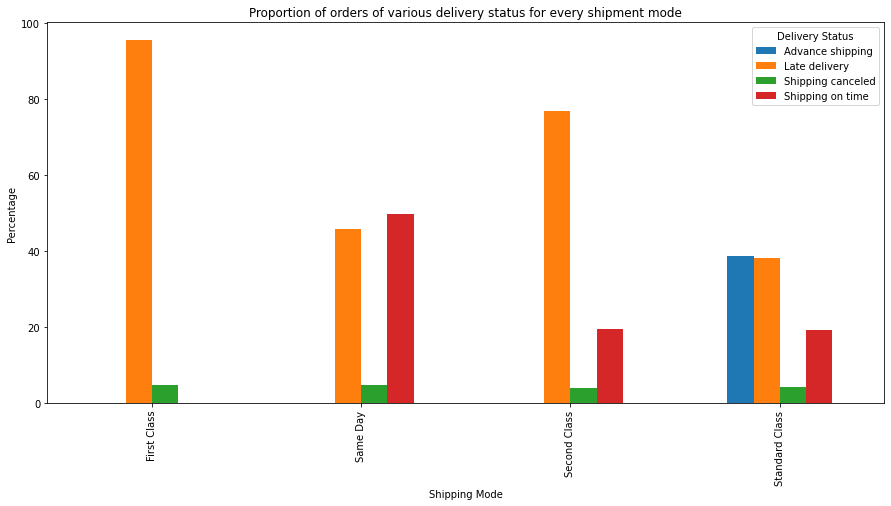

In [56]:
plt.figure(figsize=(15,7))
pd.crosstab(df["Shipping Mode"],df["Delivery Status"]).apply(lambda r:r/r.sum()*100,axis=1).plot(kind="bar",figsize=(15,7))
plt.ylabel("Percentage")
plt.title("Proportion of orders of various delivery status for every shipment mode")
plt.show()

In [58]:
# same day delivery option needs to be cancelled so that they can work on 1-day and 2-day deliveries.

In [59]:
# Days for shipment (scheduled) and shipping mode are exactly similar. 

In [47]:
pd.crosstab(df["Delivery Status"],df["Days for shipment (scheduled)"]).apply(lambda r:r/r.sum()*100,axis=0)

Days for shipment (scheduled)          0          1          2          4
Delivery Status                                                          
Advance shipping                0.000000   0.000000   0.000000  38.599748
Late delivery                  45.743042  95.322499  76.632781  38.071683
Shipping canceled               4.559926   4.677501   4.003862   4.268134
Shipping on time               49.697032   0.000000  19.363358  19.060435

In [48]:
pd.crosstab(df["Delivery Status"],df["Order Status"])

Order Status       CANCELED  CLOSED  COMPLETE  ON_HOLD  PAYMENT_REVIEW  \
Delivery Status                                                          
Advance shipping          0    4809     14136     2413             420   
Late delivery             0   11109     34199     5450            1082   
Shipping canceled      3692       0         0        0               0   
Shipping on time          0    3698     11156     1941             391   

Order Status       PENDING  PENDING_PAYMENT  PROCESSING  SUSPECTED_FRAUD  
Delivery Status                                                           
Advance shipping      4857             9588        5369                0  
Late delivery        11712            22922       12503                0  
Shipping canceled        0                0           0             4062  
Shipping on time      3658             7322        4030                0

In [49]:
pd.crosstab(df["Delivery Status"],df["Order Status"]).apply(lambda r:r/r.sum()*100,axis=0)

Order Status       CANCELED     CLOSED   COMPLETE    ON_HOLD  PAYMENT_REVIEW  \
Delivery Status                                                                
Advance shipping        0.0  24.515701  23.761577  24.612403       22.187005   
Late delivery           0.0  56.632341  57.486006  55.589555       57.157950   
Shipping canceled     100.0   0.000000   0.000000   0.000000        0.000000   
Shipping on time        0.0  18.851958  18.752416  19.798042       20.655045   

Order Status         PENDING  PENDING_PAYMENT  PROCESSING  SUSPECTED_FRAUD  
Delivery Status                                                             
Advance shipping   24.012459        24.071099   24.513743              0.0  
Late delivery      57.902803        57.546696   57.086111              0.0  
Shipping canceled   0.000000         0.000000    0.000000            100.0  
Shipping on time   18.084738        18.382205   18.400146              0.0

In [50]:
df.groupby('Delivery Status')["Sales"].mean()

Delivery Status
Advance shipping     204.799190
Late delivery        203.344163
Shipping canceled    202.515522
Shipping on time     204.063439
Name: Sales, dtype: float64

In [64]:
# take the year out of order date to find some kind of pattern

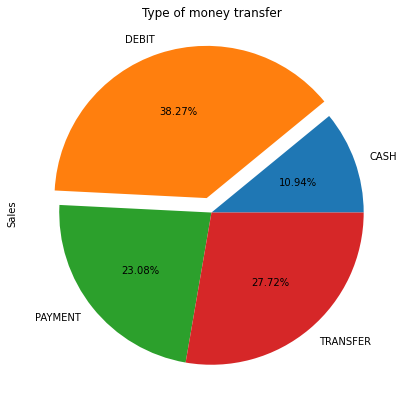

In [65]:
plt.figure(figsize=(15,7))
df.groupby("Type")["Sales"].sum().plot(kind="pie",autopct='%1.2f%%',explode=[0,0.1,0,0])
plt.title("Type of money transfer")
plt.show()

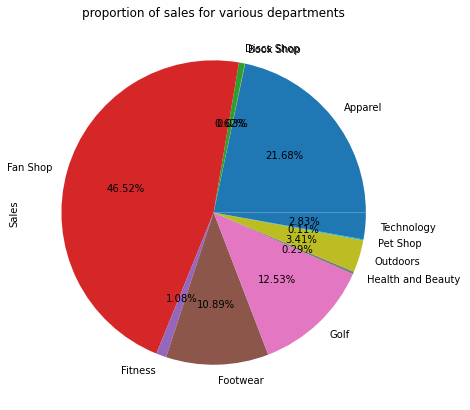

In [66]:
plt.figure(figsize=(15,7))
df.groupby("Department Name")["Sales"].sum().plot(kind="pie",autopct='%1.2f%%')
plt.title("proportion of sales for various departments")
plt.show()

In [67]:
#38% of the money transfer is through debit card, so company can approach popular debit card companies
#to promote their bussiness.

# Stastistical test

In [51]:
df_stat = pd.read_csv('first_anova.csv')
df_stat.head(2)

Unnamed: 0  Order Item Discount Rate  Order Item Product Price    Sales  \
0           0                 -0.875782                  1.334822  0.93729   
1           1                 -0.733767                  1.334822  0.93729   

   Order Item Total  Order Profit Per Order  Days for shipping (real)  \
0          1.095708                0.663343                         3   
1          1.068384               -2.595582                         5   

   Days for shipment (scheduled)  Late_delivery_risk  Customer Id  Order Id  \
0                              4                   0        20755     77202   
1                              4                   1        19492     75939   

   Order Item Quantity  Product Category Id      Type   Delivery Status  \
0                    1                   73     DEBIT  Advance shipping   
1                    1                   73  TRANSFER     Late delivery   

    Category Name Customer City Customer Country Customer Segment  \
0  Sporting Goods        Caguas      Puerto Rico         Consumer   
1  Sporting Goods        Caguas      Puerto Rico         Consumer   

  Customer State Department Name        Market Order City Order Country  \
0             PR         Fitness  Pacific Asia     Bekasi     Indonesia   
1             PR         Fitness  Pacific Asia    Bikaner         India   

     Order Region      Order State Order Status  Product Name   Shipping Mode  
0  Southeast Asia  Java Occidental     COMPLETE  Smart watch   Standard Class  
1      South Asia         Rajastán      PENDING  Smart watch   Standard Class

Text(0.5, 1.0, 'Number of transactions Vs. Type of transactions')

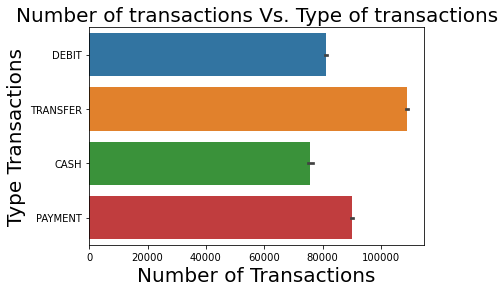

In [52]:
type_count = df_fin['Type'].value_counts()
sns.barplot(x=df_fin['Type'].index,y=df_fin['Type'].values)
plt.xlabel('Number of Transactions',fontsize=20)
plt.ylabel('Type Transactions',fontsize=20)
plt.title("Number of transactions Vs. Type of transactions",fontsize=20)

In [53]:
debit_shipping_days = df_fin[df_fin['Type'] == 'DEBIT']['Days for shipping (real)']
transfer_shipping_days = df_fin[df_fin['Type'] == 'TRANSFER']['Days for shipping (real)']
payment_shipping_days = df_fin[df_fin['Type'] == 'PAYMENT']['Days for shipping (real)']
cash_shipping_days = df_fin[df_fin['Type'] == 'CASH']['Days for shipping (real)']

In [54]:
#H0: The type of transaction has no effect on shipping days
#H1: The type of transaction has different effect on shipping days on at least one type.
# let level of significance, 95%

In [55]:
f_score,p_value = stats.f_oneway(debit_shipping_days,transfer_shipping_days,payment_shipping_days,cash_shipping_days)
print("p_value: ",p_value)

p_value:  3.36804436980892e-05


# Since p_value is less than 0.05, we can reject null hypothesis and say that different payment transaction type has different average number of shipping days.

In [57]:
## Let's do post-hoc analysis.

In [58]:
import statsmodels.stats.multicomp as mc

In [59]:
comp = mc.MultiComparison(data=df_fin['Days for shipping (real)'],groups=df_fin['Type'])
post_hoc = comp.tukeyhsd()
post_hoc.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [60]:
# the pair (cash,debit) have no effect on shipping days and so have same average shipping days.
# the pair (cash,transfer) have no effect on shipping days and so have same average shipping days.
# the pair (debit,transfer) have no effect on shipping days and so have same average shipping days.

In [61]:
# however, the pair (cash,payment) have different average shipping days.
# however, the pair (debit,payment) have different average shipping days.
# however, the pair (payment,transfer) have different average shipping days.

In [62]:
from scipy.stats import norm

In [63]:
market_deliv = pd.crosstab(df["Late_delivery_risk"],df["Market"])
market_deliv

Market              Africa  Europe  LATAM  Pacific Asia   USCA
Late_delivery_risk                                            
0                     5274   22509  23550         18548  11661
1                     6340   27743  28044         22712  14138

Text(0.5, 1.0, 'Late Delivery Status for each Market')

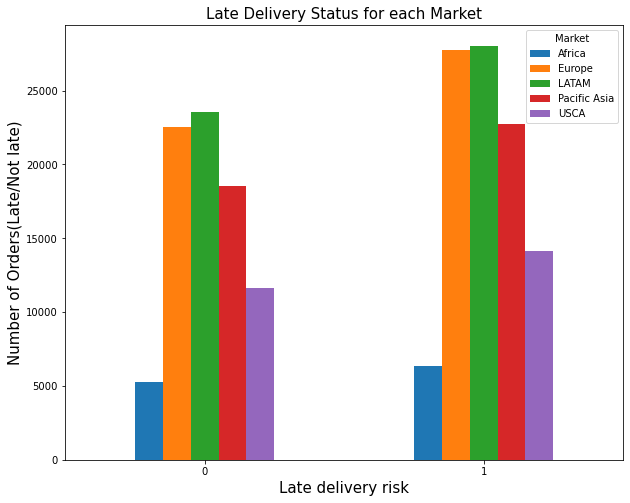

In [64]:
market_deliv.plot(kind='bar',figsize=(10,8),rot=0)
plt.ylabel("Number of Orders(Late/Not late)",fontsize=15)
plt.xlabel("Late delivery risk",fontsize=15)
plt.title("Late Delivery Status for each Market",fontsize=15)

In [67]:
from scipy.stats import chi2_contingency

In [68]:
# H0: the markets locations and Late Delivery status are independent
# H1: the markets locations and late Delivery status are independent
# alpha = 95%

In [69]:
test_stat, p, dof, exp = chi2_contingency(observed = market_deliv, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", exp)

Test statistic: 8.650713962626106
p-value: 0.07044822520489222
Degrees of freedom: 4
Expected values: [[ 5246.14466067 22699.26480869 23305.45786316 18637.50031853
  11653.63234895]
 [ 6367.85533933 27552.73519131 28288.54213684 22622.49968147
  14145.36765105]]


In [70]:
# Since the p-value is greater than 0.05, we fail to reject Null Hypothesis and 
# infer that market location has nothing to do with all the late deliveries.

## ----------------------------------------------------------------------------------

In [71]:
cust_seg_deliv = pd.crosstab(df["Late_delivery_risk"],df["Customer Segment"])
cust_seg_deliv

Customer Segment    Consumer  Corporate  Home Office
Late_delivery_risk                                  
0                      42256      24807        14479
1                      51248      29982        17747

Text(0.5, 1.0, 'Late Delivery Status for each Customer Segment')

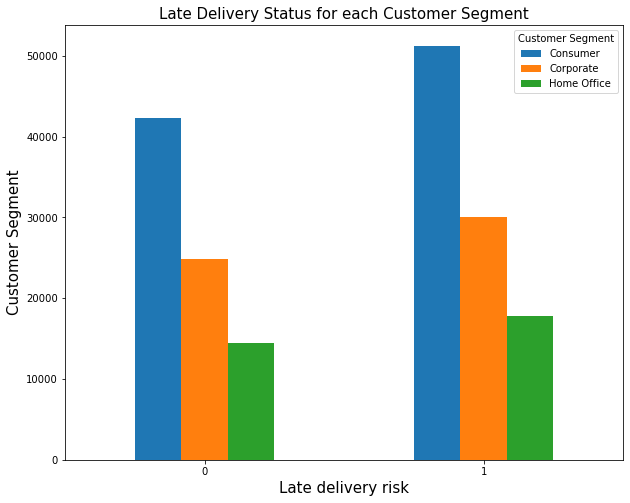

In [72]:
cust_seg_deliv.plot(kind='bar',figsize=(10,8),rot=0)
plt.ylabel("Customer Segment",fontsize=15)
plt.xlabel("Late delivery risk",fontsize=15)
plt.title("Late Delivery Status for each Customer Segment",fontsize=15)

In [73]:
# H0: Customer segment is independent of late delivery status.
# H1: Customer segment is independent of late delivery status.
# alpha = 95%

In [74]:
observed_value = cust_seg_deliv.values
observed_value

array([[42256, 24807, 14479],
       [51248, 29982, 17747]])

In [75]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 1.0247401261548736
p-value: 0.5990740516327164
Degrees of freedom: 2
Expected values: [[42236.56882655 24748.66710983 14556.76406362]
 [51267.43117345 30040.33289017 17669.23593638]]


In [76]:
# we fail to reject null hypothesis since the p-value is greater than 0.05 and infer 
# that orders were late irrespective of there segments.

## ----------------------------------------------------------------------------------

In [77]:
dep_name_deliv = pd.crosstab(df["Late_delivery_risk"],df["Department Name"])
dep_name_deliv

Department Name     Apparel  Book Shop  Discs Shop  Fan Shop  Fitness  \
Late_delivery_risk                                                      
0                     22173        176         923     30238     1102   
1                     26825        229        1103     36623     1377   

Department Name     Footwear   Golf  Health and Beauty   Outdoors  Pet Shop  \
Late_delivery_risk                                                            
0                       6576  15022                 160      4311       202   
1                       7949  18198                 202      5375       290   

Department Name     Technology  
Late_delivery_risk              
0                          659  
1                          806

Text(0.5, 1.0, 'Late Delivery Status for each Department')

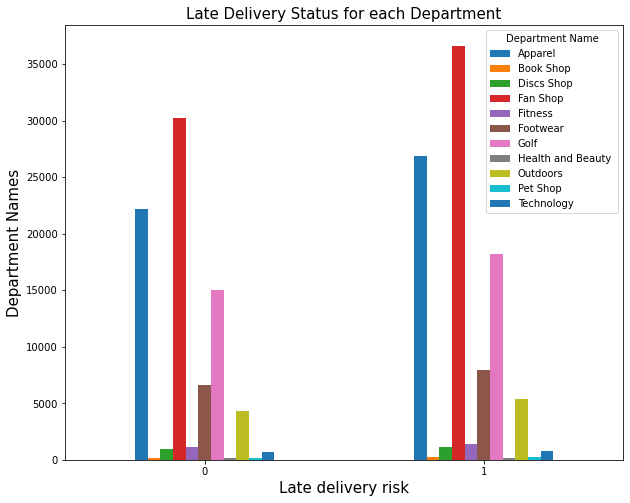

In [78]:
dep_name_deliv.plot(kind='bar',figsize=(10,8),rot=0)
plt.ylabel("Department Names",fontsize=15)
plt.xlabel("Late delivery risk",fontsize=15)
plt.title("Late Delivery Status for each Department",fontsize=15)

In [79]:
# H0: Late delivery status is independent of department name.
# H1: Late delivery status is not independent of department name.
# alpha = 95%

In [80]:
observed_value = dep_name_deliv.values
observed_value

array([[22173,   176,   923, 30238,  1102,  6576, 15022,   160,  4311,
          202,   659],
       [26825,   229,  1103, 36623,  1377,  7949, 18198,   202,  5375,
          290,   806]])

In [81]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 6.666694824386181
p-value: 0.7564916045517328
Degrees of freedom: 10
Expected values: [[22132.82211845   182.94201718   915.1617946  30201.69434796
   1119.78582864  6561.06864097 15005.76249591   163.51854375
   4375.25031714   222.24067273   661.75322265]
 [26865.17788155   222.05798282  1110.8382054  36659.30565204
   1359.21417136  7963.93135903 18214.23750409   198.48145625
   5310.74968286   269.75932727   803.24677735]]


In [82]:
# Late deliveries are same for all different different departments as the p_value is greater than 0.05.

## ----------------------------------------------------------------------------------

In [83]:
order_reg_deliv = pd.crosstab(df["Late_delivery_risk"],df["Order Region"])
order_reg_deliv

Order Region        Canada  Caribbean  Central Africa  Central America  \
Late_delivery_risk                                                       
0                      491       3903             705            12823   
1                      468       4415             972            15518   

Order Region        Central Asia  East Africa  East of USA  Eastern Asia  \
Late_delivery_risk                                                         
0                            247          816         3066          3325   
1                            306         1036         3849          3955   

Order Region        Eastern Europe  North Africa  Northern Europe  Oceania  \
Late_delivery_risk                                                           
0                             1738          1470             4500     4666   
1                             2182          1762             5292     5482   

Order Region        South America  South Asia  South of  USA   Southeast Asia  \
Late_delivery_risk                                                              
0                            6824        3381            1789            4242   
1                            8111        4350            2256            5297   

Order Region        Southern Africa  Southern Europe  US Center   West Africa  \
Late_delivery_risk                                                              
0                               540             4302        2635         1743   
1                               617             5129        3252         1953   

Order Region        West Asia  West of USA   Western Europe  
Late_delivery_risk                                           
0                        2687          3680           11969  
1                        3322          4313           15140

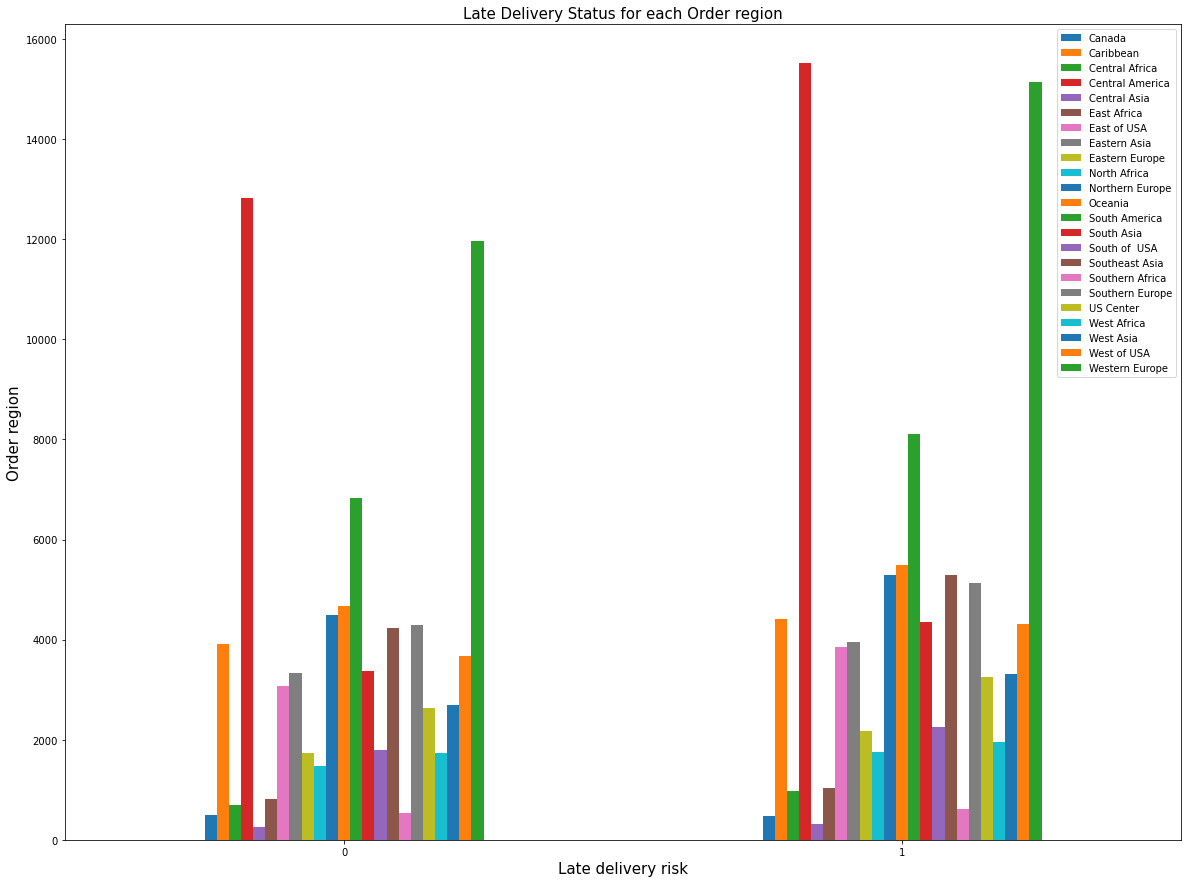

In [84]:
order_reg_deliv.plot(kind='bar',figsize=(20,15),rot=0,legend=True)
plt.ylabel("Order region",fontsize=15)
plt.xlabel("Late delivery risk",fontsize=15)
plt.title("Late Delivery Status for each Order region",fontsize=15)
plt.legend(loc='upper right')

In [85]:
# H0: Late deliveries are independent of order region
# H1: Late deliveries are not independent of order region.
# alpha = 95%

In [86]:
observed_value = order_reg_deliv.values
observed_value

array([[  491,  3903,   705, 12823,   247,   816,  3066,  3325,  1738,
         1470,  4500,  4666,  6824,  3381,  1789,  4242,   540,  4302,
         2635,  1743,  2687,  3680, 11969],
       [  468,  4415,   972, 15518,   306,  1036,  3849,  3955,  2182,
         1762,  5292,  5482,  8111,  4350,  2256,  5297,   617,  5129,
         3252,  1953,  3322,  4313, 15140]])

In [87]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 74.93361415711169
p-value: 1.083129807862368e-07
Degrees of freedom: 22
Expected values: [[  433.18862834  3757.31283688   757.51546375 12801.87582471
    249.79490248   836.56448352  3123.56555266  3288.43922246
   1770.69804287  1459.922468    4423.13143769  4583.93972934
   6746.26920158  3492.15983913  1827.16162842  4308.84914053
    522.62694786  4260.06460262  2659.20902509  1669.51529756
   2714.31748459  3610.50751444 12245.37072552]
 [  525.81137166  4560.68716312   919.48453625 15539.12417529
    303.20509752  1015.43551648  3791.43444734  3991.56077754
   2149.30195713  1772.077532    5368.86856231  5564.06027066
   8188.73079842  4238.84016087  2217.83837158  5230.15085947
    634.37305214  5170.93539738  3227.79097491  2026.48470244
   3294.68251541  4382.49248556 14863.62927448]]


In [88]:
# Since p_value is less than 0.05, we reject null hypothesis and infer that late delivery
# and order region are dependent.

In [89]:
colTotals = order_reg_deliv.sum()
nCols = len(colTotals)

rowTotals = order_reg_deliv.sum(axis=1)
nRows = len(rowTotals)

n = sum(rowTotals)

In [90]:
phRes = pd.DataFrame(columns=['Late_delivery_risk', 'Order_region', 'Adj. Res.'])
for i in range(nRows):
    for j in range(nCols):
        AdjRes = (order_reg_deliv.iloc[i,j] - expected_value[i,j]) / (expected_value[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
        phRes = phRes.append({'Late_delivery_risk':order_reg_deliv.index[i], 'Order_region':order_reg_deliv.columns[j], 'Adj. Res.':AdjRes}, ignore_index=True)

phRes

Late_delivery_risk     Order_region  Adj. Res.
0                   0           Canada   3.761194
1                   0        Caribbean   3.286401
2                   0   Central Africa  -2.588883
3                   0  Central America   0.274614
4                   0     Central Asia  -0.239186
5                   0      East Africa  -0.965165
6                   0      East of USA  -1.418448
7                   0     Eastern Asia   0.878928
8                   0   Eastern Europe  -1.060990
9                   0     North Africa   0.359424
10                  0  Northern Europe   1.605050
11                  0          Oceania   1.684890
12                  0    South America   1.334467
13                  0       South Asia  -2.596569
14                  0   South of  USA   -1.219421
15                  0   Southeast Asia  -1.413183
16                  0  Southern Africa   1.029605
17                  0  Southern Europe   0.891289
18                  0       US Center   -0.644607
19                  0      West Africa   2.454077
20                  0        West Asia  -0.720205
21                  0     West of USA    1.597652
22                  0   Western Europe  -3.658769
23                  1           Canada  -3.761194
24                  1        Caribbean  -3.286401
25                  1   Central Africa   2.588883
26                  1  Central America  -0.274614
27                  1     Central Asia   0.239186
28                  1      East Africa   0.965165
29                  1      East of USA   1.418448
30                  1     Eastern Asia  -0.878928
31                  1   Eastern Europe   1.060990
32                  1     North Africa  -0.359424
33                  1  Northern Europe  -1.605050
34                  1          Oceania  -1.684890
35                  1    South America  -1.334467
36                  1       South Asia   2.596569
37                  1   South of  USA    1.219421
38                  1   Southeast Asia   1.413183
39                  1  Southern Africa  -1.029605
40                  1  Southern Europe  -0.891289
41                  1       US Center    0.644607
42                  1      West Africa  -2.454077
43                  1        West Asia   0.720205
44                  1     West of USA   -1.597652
45                  1   Western Europe   3.658769

In [91]:
from scipy.stats import norm

In [92]:
phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
phRes

Late_delivery_risk     Order_region  Adj. Res.      Sig.  Adj. Sig.
0                   0           Canada   3.761194  0.000169   0.007779
1                   0        Caribbean   3.286401  0.001015   0.046679
2                   0   Central Africa  -2.588883  0.009629   0.442924
3                   0  Central America   0.274614  0.783613  36.046186
4                   0     Central Asia  -0.239186  0.810962  37.304229
5                   0      East Africa  -0.965165  0.334462  15.385253
6                   0      East of USA  -1.418448  0.156060   7.178767
7                   0     Eastern Asia   0.878928  0.379440  17.454247
8                   0   Eastern Europe  -1.060990  0.288695  13.279951
9                   0     North Africa   0.359424  0.719278  33.086797
10                  0  Northern Europe   1.605050  0.108483   4.990211
11                  0          Oceania   1.684890  0.092010   4.232455
12                  0    South America   1.334467  0.182051   8.374337
13                  0       South Asia  -2.596569  0.009416   0.433136
14                  0   South of  USA   -1.219421  0.222684  10.243477
15                  0   Southeast Asia  -1.413183  0.157602   7.249693
16                  0  Southern Africa   1.029605  0.303195  13.946984
17                  0  Southern Europe   0.891289  0.372774  17.147605
18                  0       US Center   -0.644607  0.519182  23.882371
19                  0      West Africa   2.454077  0.014125   0.649735
20                  0        West Asia  -0.720205  0.471399  21.684350
21                  0     West of USA    1.597652  0.110120   5.065539
22                  0   Western Europe  -3.658769  0.000253   0.011658
23                  1           Canada  -3.761194  0.000169   0.007779
24                  1        Caribbean  -3.286401  0.001015   0.046679
25                  1   Central Africa   2.588883  0.009629   0.442924
26                  1  Central America  -0.274614  0.783613  36.046186
27                  1     Central Asia   0.239186  0.810962  37.304229
28                  1      East Africa   0.965165  0.334462  15.385253
29                  1      East of USA   1.418448  0.156060   7.178767
30                  1     Eastern Asia  -0.878928  0.379440  17.454247
31                  1   Eastern Europe   1.060990  0.288695  13.279951
32                  1     North Africa  -0.359424  0.719278  33.086797
33                  1  Northern Europe  -1.605050  0.108483   4.990211
34                  1          Oceania  -1.684890  0.092010   4.232455
35                  1    South America  -1.334467  0.182051   8.374337
36                  1       South Asia   2.596569  0.009416   0.433136
37                  1   South of  USA    1.219421  0.222684  10.243477
38                  1   Southeast Asia   1.413183  0.157602   7.249693
39                  1  Southern Africa  -1.029605  0.303195  13.946984
40                  1  Southern Europe  -0.891289  0.372774  17.147605
41                  1       US Center    0.644607  0.519182  23.882371
42                  1      West Africa  -2.454077  0.014125   0.649735
43                  1        West Asia   0.720205  0.471399  21.684350
44                  1     West of USA   -1.597652  0.110120   5.065539
45                  1   Western Europe   3.658769  0.000253   0.011658

In [93]:
phRes.loc[phRes['Adj. Sig.']> 1, 'Adj. Sig.'] = 1

In [94]:
ord_reg_signi = phRes[phRes['Adj. Sig.']<=0.05]
ord_reg_signi

Late_delivery_risk    Order_region  Adj. Res.      Sig.  Adj. Sig.
0                   0          Canada   3.761194  0.000169   0.007779
1                   0       Caribbean   3.286401  0.001015   0.046679
22                  0  Western Europe  -3.658769  0.000253   0.011658
23                  1          Canada  -3.761194  0.000169   0.007779
24                  1       Caribbean  -3.286401  0.001015   0.046679
45                  1  Western Europe   3.658769  0.000253   0.011658

In [95]:
# Late delivery risk  paired with order regions like canada,caribbean and western europe are significantly
# have significance of adjusted residuals which is statistically significant.

## ----------------------------------------------------------------------------------

In [96]:
ord_itm_qty = pd.crosstab(df["Late_delivery_risk"],df["Order Item Quantity"])
ord_itm_qty

Order Item Quantity      1      2      3      4      5
Late_delivery_risk                                    
0                    44729   9276   9134   9188   9215
1                    54405  11039  11216  11147  11170

Text(0.5, 1.0, 'Late Delivery Status Vs Order Item Quantity')

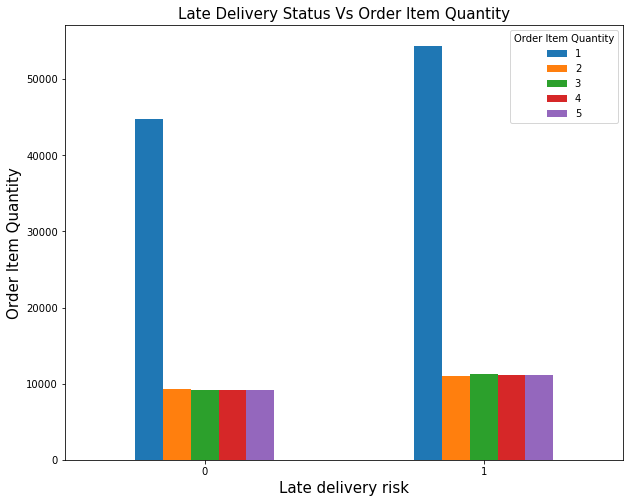

In [97]:
ord_itm_qty.plot(kind='bar',figsize=(10,8),rot=0)
plt.ylabel("Order Item Quantity",fontsize=15)
plt.xlabel("Late delivery risk",fontsize=15)
plt.title("Late Delivery Status Vs Order Item Quantity",fontsize=15)

In [98]:
# H0: Number of items ordered is independent of late deliveries
# H1: Number of items ordered is not independent of late deliveries
# alpha = 95%

In [99]:
observed_value = ord_itm_qty.values
observed_value

array([[44729,  9276,  9134,  9188,  9215],
       [54405, 11039, 11216, 11147, 11170]])

In [100]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 2.7583058486313816
p-value: 0.5990510769481232
Degrees of freedom: 4
Expected values: [[44779.68871975  9176.46192368  9192.27172763  9185.49609736
   9208.08153158]
 [54354.31128025 11138.53807632 11157.72827237 11149.50390264
  11176.91846842]]


In [101]:
# Number of items ordered is independent of late deliveries

## ----------------------------------------------------------------------------------

In [102]:
df_fin.shape

(180519, 28)

In [103]:
df_copy = df_fin.copy()

In [105]:
df_copy.drop(['Customer Id','Order Id'],1,inplace=True)

In [106]:
df_copy.shape

(180519, 26)

In [107]:
X = pd.crosstab(df_copy['Late_delivery_risk'],df_copy['Customer City'])
X

Customer City       Aguadilla  Alameda  Albany  Albuquerque  Algonquin  \
Late_delivery_risk                                                       
0                          30       71      40          214         47   
1                          20       47      31          338         81   

Customer City       Alhambra  Allentown  Alpharetta  Amarillo  Anaheim  \
Late_delivery_risk                                                       
0                         48         27          38       125      138   
1                         69         23          68       167      193   

Customer City       Ann Arbor  Annandale  Annapolis  Antioch  Apex  Apopka  \
Late_delivery_risk                                                           
0                          59         50         38      171   121      84   
1                         126         54         55      176   119      41   

Customer City       Arecibo  Arlington  Arlington Heights  Asheboro  Astoria  \
Late_delivery_risk                                                             
0                        54         56                 17        27       40   
1                        68         53                 49        40       45   

Customer City       Atlanta  Augusta  Aurora  Austin  Azusa  Bakersfield  \
Late_delivery_risk                                                         
0                       207      104     490     151     66          267   
1                       209      103     525     163     71          314   

Customer City       Baldwin Park  Ballwin  Baltimore  Bartlett  Bay Shore  \
Late_delivery_risk                                                          
0                             48       94        195        10         20   
1                             61       57        370        15         33   

Customer City       Bayamon  Bayonne  Baytown  Beaverton  Bell Gardens  \
Late_delivery_risk                                                       
0                       123       44       60         46            65   
1                       174       20       44         72            85   

Customer City       Bellflower  Bellingham  Beloit  Bend  Bensalem  Berwyn  \
Late_delivery_risk                                                           
0                           59          21      58   115        44      37   
1                           83          26      85   139        39      30   

Customer City       Billings  Birmingham  Bismarck  Blacksburg  Bloomfield  \
Late_delivery_risk                                                           
0                         47          18        63          28          55   
1                         40          17        74          34          38   

Customer City       Bolingbrook  Bountiful  Bowling Green  Brandon  Brentwood  \
Late_delivery_risk                                                              
0                            32         41             54       51         19   
1                            47         55             74      107         20   

Customer City       Bridgeton  Brighton  Bristol  Brockton  Broken Arrow  \
Late_delivery_risk                                                         
0                          81        73       24        30            72   
1                          97       107       62        55            76   

Customer City       Bronx  Brooklyn  Broomfield  Brownsville  Buena Park  \
Late_delivery_risk                                                         
0                     676      1600          40          127          19   
1                     824      1812          34          118          47   

Customer City       Buffalo  Burnsville  CA  Caguas  Campbell  Canoga Park  \
Late_delivery_risk                                                           
0                       141          60   2   30220        61           29   
1                       190          71   1   36550        83     

In [108]:
# H0: Late delivery is independent of customer city
# H1: Late delivery is not independent of customer city
# alpha = 95%

In [109]:
observed_value = X.values
observed_value

array([[30, 71, 40, ..., 69, 29, 47],
       [20, 47, 31, ..., 75, 63, 68]])

In [110]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("expected value: ",expected_value)

Test statistic: 1879.543360414227
p-value: 1.7272793951297557e-141
Degrees of freedom: 562
expected value:  [[22.58543422 53.30162476 32.07131659 ... 65.04605055 41.55719897
  51.94649871]
 [27.41456578 64.69837524 38.92868341 ... 78.95394945 50.44280103
  63.05350129]]


In [111]:
# late delivery is not independent of customer city as p-value is less than 0.05

In [112]:
colTotals = X.sum()
nCols = len(colTotals)

rowTotals = X.sum(axis=1)
nRows = len(rowTotals)

n = sum(rowTotals)

In [113]:
phRes = pd.DataFrame(columns=['Late_delivery_risk', 'Customer_city', 'Adj. Res.'])
for i in range(nRows):
    for j in range(nCols):
        AdjRes = (X.iloc[i,j] - expected_value[i,j]) / (expected_value[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
        phRes = phRes.append({'Late_delivery_risk':X.index[i], 'Customer_city':X.columns[j], 'Adj. Res.':AdjRes}, ignore_index=True)

phRes

Late_delivery_risk         Customer_city  Adj. Res.
0                     0             Aguadilla   2.107298
1                     0               Alameda   3.274911
2                     0                Albany   1.891135
3                     0           Albuquerque  -3.027376
4                     0             Algonquin  -1.922161
5                     0              Alhambra  -0.901254
6                     0             Allentown   1.254666
7                     0            Alpharetta  -1.929061
8                     0              Amarillo  -0.811909
9                     0               Anaheim  -1.273020
10                    0             Ann Arbor  -3.631100
11                    0             Annandale   0.595677
12                    0             Annapolis  -0.835529
13                    0               Antioch   1.539391
14                    0                  Apex   1.634072
15                    0                Apopka   4.950715
16                    0               Arecibo  -0.201721
17                    0             Arlington   1.302179
18                    0     Arlington Heights  -3.169682
19                    0              Asheboro  -0.801535
20                    0               Astoria   0.349839
21                    0               Atlanta   1.882812
22                    0               Augusta   1.466781
23                    0                Aurora   1.993348
24                    0                Austin   1.040012
25                    0                 Azusa   0.706864
26                    0           Bakersfield   0.380522
27                    0          Baldwin Park  -0.238006
28                    0               Ballwin   4.219327
29                    0             Baltimore  -5.098345
30                    0              Bartlett  -0.519552
31                    0             Bay Shore  -1.087800
32                    0               Bayamon  -1.301999
33                    0               Bayonne   3.791053
34                    0               Baytown   2.566618
35                    0             Beaverton  -1.351094
36                    0          Bell Gardens  -0.452404
37                    0            Bellflower  -0.867516
38                    0            Bellingham  -0.067512
39                    0                Beloit  -1.108513
40                    0                  Bend   0.033560
41                    0              Bensalem   1.435772
42                    0                Berwyn   1.653786
43                    0              Billings   1.659498
44                    0            Birmingham   0.743971
45                    0              Bismarck   0.191646
46                    0            Blacksburg  -0.001516
47                    0            Bloomfield   2.707579
48                    0           Bolingbrook  -0.833264
49                    0             Bountiful  -0.484952
50                    0         Bowling Green  -0.678471
51                    0               Brandon  -3.257745
52                    0             Brentwood   0.445159
53                    0             Bridgeton   0.089786
54                    0              Brighton  -1.244856
55                    0               Bristol  -3.217781
56                    0              Brockton  -1.830168
57                    0          Broken Arrow   0.850504
58                    0                 Bronx  -0.081432
59                    0              Brooklyn   2.041078
60                    0            Broomfield   1.535814
61                    0           Brownsville   2.097972
62                    0            Buena Park  -2.674913
63                    0               Buffalo  -0.941377
64                    0            Burnsville   0.145095
65                    0                    CA   0.748140
66                    0                Caguas   0.582009
67                    0              Campbell  -0.677780
68                    0           Canoga Park  -2.386578
69             

In [114]:
phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
phRes

Late_delivery_risk         Customer_city  Adj. Res.          Sig.  \
0                     0             Aguadilla   2.107298  3.509175e-02   
1                     0               Alameda   3.274911  1.056953e-03   
2                     0                Albany   1.891135  5.860639e-02   
3                     0           Albuquerque  -3.027376  2.466869e-03   
4                     0             Algonquin  -1.922161  5.458555e-02   
5                     0              Alhambra  -0.901254  3.674533e-01   
6                     0             Allentown   1.254666  2.095999e-01   
7                     0            Alpharetta  -1.929061  5.372332e-02   
8                     0              Amarillo  -0.811909  4.168439e-01   
9                     0               Anaheim  -1.273020  2.030109e-01   
10                    0             Ann Arbor  -3.631100  2.822157e-04   
11                    0             Annandale   0.595677  5.513912e-01   
12                    0             Annapolis  -0.835529  4.034199e-01   
13                    0               Antioch   1.539391  1.237089e-01   
14                    0                  Apex   1.634072  1.022437e-01   
15                    0                Apopka   4.950715  7.394145e-07   
16                    0               Arecibo  -0.201721  8.401346e-01   
17                    0             Arlington   1.302179  1.928551e-01   
18                    0     Arlington Heights  -3.169682  1.526059e-03   
19                    0              Asheboro  -0.801535  4.228219e-01   
20                    0               Astoria   0.349839  7.264594e-01   
21                    0               Atlanta   1.882812  5.972591e-02   
22                    0               Augusta   1.466781  1.424355e-01   
23                    0                Aurora   1.993348  4.622330e-02   
24                    0                Austin   1.040012  2.983342e-01   
25                    0                 Azusa   0.706864  4.796513e-01   
26                    0           Bakersfield   0.380522  7.035576e-01   
27                    0          Baldwin Park  -0.238006  8.118764e-01   
28                    0               Ballwin   4.219327  2.450329e-05   
29                    0             Baltimore  -5.098345  3.426363e-07   
30                    0              Bartlett  -0.519552  6.033762e-01   
31                    0             Bay Shore  -1.087800  2.766836e-01   
32                    0               Bayamon  -1.301999  1.929169e-01   
33                    0               Bayonne   3.791053  1.500098e-04   
34                    0               Baytown   2.566618  1.026958e-02   
35                    0             Beaverton  -1.351094  1.766653e-01   
36                    0          Bell Gardens  -0.452404  6.509776e-01   
37                    0            Bellflower  -0.867516  3.856595e-01   
38                    0            Bellingham  -0.067512  9.461740e-01   
39                    0                Beloit  -1.108513  2.676405e-01   
40                    0                  Bend   0.033560  9.732278e-01   
41                    0              Bensalem   1.435772  1.510673e-01   
42                    0                Berwyn   1.653786  9.817100e-02   
43                    0              Billings   1.659498  9.701551e-02   
44                    0            Birmingham   0.743971  4.568939e-01   
45                    0              Bismarck   0.191646  8.480198e-01   
46                    0            Blacksburg  -0.001516  9.987906e-01   
47                    0            Bloomfield   2.707579  6.777587e-03   
48                    0           Bolingbrook  -0.833264  4.046960e-01   
49                    0             Bountiful  -0.484952  6.277105e-01   
50                    0         Bowling Green  -0.678471  4.974734e-01   
51                    0               Brandon  -3.257745  1.123011e-03   
52                    0             Brentwood   0.445159  6.562047e-01   
53       

In [115]:
phRes.loc[phRes['Adj. Sig.']> 1, 'Adj. Sig.'] = 1

In [116]:
cust_cit_signi = phRes[phRes['Adj. Sig.']<=0.05]
cust_cit_signi

Late_delivery_risk   Customer_city  Adj. Res.          Sig.  Adj. Sig.
15                    0          Apopka   4.950715  7.394145e-07   0.000833
28                    0         Ballwin   4.219327  2.450329e-05   0.027591
29                    0       Baltimore  -5.098345  3.426363e-07   0.000386
93                    0     Chula Vista   4.757039  1.964530e-06   0.002212
125                   0          Denton  -5.078902  3.796218e-07   0.000427
126                   0          Denver   4.240281  2.232403e-05   0.025137
156                   0       Ewa Beach   5.897764  3.684601e-09   0.000004
160                   0    Fayetteville  -4.116635  3.844438e-05   0.043288
164                   0        Flushing  -4.153895  3.268633e-05   0.036805
182                   0         Garland  -4.231601  2.320334e-05   0.026127
203                   0        Hamilton   5.240841  1.598465e-07   0.000180
242                   0         Jamaica   4.984671  6.206724e-07   0.000699
292                   0          Madera   4.147746  3.357645e-05   0.037807
309                   0          Medina  -4.149037  3.338768e-05   0.037595
393                   0     Pico Rivera   4.103323  4.072587e-05   0.045857
399                   0           Plano  -4.966663  6.811480e-07   0.000767
433                   0       Roseville  -4.995080  5.881151e-07   0.000662
449                   0  San Bernardino  -4.617211  3.889323e-06   0.004379
507                   0            Troy   4.537761  5.685477e-06   0.006402
511                   0          Tustin  -5.430646  5.615033e-08   0.000063
530                   0        Waukegan  -4.383755  1.166507e-05   0.013135
578                   1          Apopka  -4.950715  7.394145e-07   0.000833
591                   1         Ballwin  -4.219327  2.450329e-05   0.027591
592                   1       Baltimore   5.098345  3.426363e-07   0.000386
656                   1     Chula Vista  -4.757039  1.964530e-06   0.002212
688                   1          Denton   5.078902  3.796218e-07   0.000427
689                   1          Denver  -4.240281  2.232403e-05   0.025137
719                   1       Ewa Beach  -5.897764  3.684601e-09   0.000004
723                   1    Fayetteville   4.116635  3.844438e-05   0.043288
727                   1        Flushing   4.153895  3.268633e-05   0.036805
745                   1         Garland   4.231601  2.320334e-05   0.026127
766                   1        Hamilton  -5.240841  1.598465e-07   0.000180
805                   1         Jamaica  -4.984671  6.206724e-07   0.000699
855                   1          Madera  -4.147746  3.357645e-05   0.037807
872                   1          Medina   4.149037  3.338768e-05   0.037595
956                   1     Pico Rivera  -4.103323  4.072587e-05   0.045857
962                   1           Plano   4.966663  6.811480e-07   0.000767
996                   1       Roseville   4.995080  5.881151e-07   0.000662
1012                  1  San Bernardino   4.617211  3.889323e-06   0.004379
1070                  1            Troy  -4.537761  5.685477e-06   0.006402
1074                  1          Tustin   5.430646  5.615033e-08   0.000063
1093                  1        Waukegan   4.383755  1.166507e-05   0.013135

In [117]:
# the above mentioned customer city are not independent of late delivery status

## ----------------------------------------------------------------------------------

In [118]:
ord_cit_deliv = pd.crosstab(df_copy['Late_delivery_risk'],df_copy['Order City'])
ord_cit_deliv

Order City          Aachen  Aalen  Aalst  Aba  Abadan  Abakaliki  Abbeville  \
Late_delivery_risk                                                            
0                       35      0      7   18      18          6          7   
1                       28      3     16   18      15          0          5   

Order City          Abbotsford  Abeokuta  Aberdeen  Abha  Abidjan  Abilene  \
Late_delivery_risk                                                           
0                            4         8         8    14       56        3   
1                            5         7        13     8      132        0   

Order City          Abreu e Lima  Abu Kabir  Acarigua  Acayucan  Accra  \
Late_delivery_risk                                                       
0                              7          2        13        21     60   
1                              0         14        13         8    109   

Order City          Acerra  Acireale  Acuña  Acámbaro  Ad Diwaniyah  Ad Diwem  \
Late_delivery_risk                                                              
0                        1        31     32         3            22        13   
1                        3        29     28         9            14         7   

Order City          Adana  Adelaide  Adiyaman  Aew?l-li  Afragola  Afyon  \
Late_delivery_risk                                                         
0                      49       230         2         3         4      0   
1                      78       246        11         6         4      9   

Order City          Agadir  Agde  Agen  Agra  Agrigento  Ahvaz  Ain Oussera  \
Late_delivery_risk                                                            
0                       27     4     1    38          2     41            2   
1                       14     5     1    42          6     14            6   

Order City          Aix-en-Provence  Aix-les-Bains  Ajaccio  Ajman  Ajmer  \
Late_delivery_risk                                                          
0                                34              0        9      4     31   
1                                52              1       12      3     44   

Order City          Akhisar  Akola  Akron  Aksaray  Aksu  Akure  Al Amarah  \
Late_delivery_risk                                                           
0                         4     13     19        5     6      1          9   
1                         0     13     38        1     3      6          0   

Order City          Al Hillah  Al Hudayda  Al Hufuf  Al Khums  \
Late_delivery_risk                                              
0                           7           0         7         3   
1                          26           7         8         3   

Order City          Al Mahallah al Kubra  Al Manaqil  Al Mubarraz  \
Late_delivery_risk                                                  
0                                      4           0           16   
1                                     21           2            9   

Order City          Al Muharraq  Alanya  Albacete  Albany  Albertville  Albi  \
Late_delivery_risk                                                             
0                             4      15        17      37            0    12   
1                             0      10        31      29           10    18   

Order City          Albuquerque  Albury  Alcobendas  Alessandria  Alexandria  \
Late_delivery_risk                                                             
0                            17      14          16            5         177   
1                            19      38          10            8         136   

Order City          Alfortville  Algiers  Alicante  Alice Springs  Aligarh  \
Late_delivery_risk                                                           
0                             2       60        32             13       29   
1                            10       81        16              6       15   

Order City 

In [119]:
# H0: Late deliveries is independent of order city
# H1: Late deliveries is not independent of order city
# alpha=95%

In [120]:
observed_value = ord_cit_deliv.values
observed_value

array([[35,  0,  7, ...,  4,  0,  0],
       [28,  3, 16, ...,  9,  6, 14]])

In [121]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("expected_value:",expected_value)

Test statistic: 14195.298421321104
p-value: 0.0
Degrees of freedom: 3596
expected_value: [[28.45764712  1.35512605 10.38929974 ...  5.8722129   2.71025211
   6.32392158]
 [34.54235288  1.64487395 12.61070026 ...  7.1277871   3.28974789
   7.67607842]]


In [122]:
# p-value is less than 0.05 an hence we reject null and infer that order city is not independent
# of late delivery status.

In [123]:
colTotals = ord_cit_deliv.sum()
nCols = len(colTotals)

rowTotals = ord_cit_deliv.sum(axis=1)
nRows = len(rowTotals)

n = sum(rowTotals)

In [124]:
phRes = pd.DataFrame(columns=['Late_delivery_risk', 'Order_city', 'Adj. Res.'])
for i in range(nRows):
    for j in range(nCols):
        AdjRes = (ord_cit_deliv.iloc[i,j] - expected_value[i,j]) / (expected_value[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
        phRes = phRes.append({'Late_delivery_risk':ord_cit_deliv.index[i], 'Order_city':ord_cit_deliv.columns[j], 'Adj. Res.':AdjRes}, ignore_index=True)

phRes

Late_delivery_risk                           Order_city  Adj. Res.
0                     0                               Aachen   1.656550
1                     0                                Aalen  -1.572128
2                     0                                Aalst  -1.420165
3                     0                                  Aba   0.582276
4                     0                               Abadan   1.082216
5                     0                            Abakaliki   2.698729
6                     0                            Abbeville   0.916236
7                     0                           Abbotsford  -0.043791
8                     0                             Abeokuta   0.635258
9                     0                             Aberdeen  -0.651576
10                    0                                 Abha   1.740459
11                    0                              Abidjan  -4.240619
12                    0                              Abilene   1.908274
13                    0                         Abreu e Lima   2.914969
14                    0                            Abu Kabir  -2.626062
15                    0                             Acarigua   0.494826
16                    0                             Acayucan   2.948171
17                    0                                Accra  -2.526646
18                    0                               Acerra  -0.810633
19                    0                             Acireale   1.011219
20                    0                                Acuña   1.270674
21                    0                             Acámbaro  -1.404089
22                    0                         Ad Diwaniyah   1.922005
23                    0                             Ad Diwem   1.782001
24                    0                                Adana  -1.492403
25                    0                             Adelaide   1.382102
26                    0                             Adiyaman  -2.158084
27                    0                             Aew?l-li  -0.713606
28                    0                             Afragola   0.274466
29                    0                                Afyon  -2.723050
30                    0                               Agadir   2.661433
31                    0                                 Agde  -0.043791
32                    0                                 Agen   0.137231
33                    0                                 Agra   0.418697
34                    0                            Agrigento  -1.146421
35                    0                                Ahvaz   4.378087
36                    0                          Ain Oussera  -1.146421
37                    0                      Aix-en-Provence  -1.050480
38                    0                        Aix-les-Bains  -0.907663
39                    0                              Ajaccio  -0.213065
40                    0                                Ajman   0.636486
41                    0                                Ajmer  -0.667941
42                    0                              Akhisar   2.203491
43                    0                                Akola   0.494826
44                    0                                Akron  -1.796108
45                    0                              Aksaray   1.878384
46                    0                                 Aksu   1.295838
47                    0                                Akure  -1.641997
48                    0                            Al Amarah   3.305282
49                    0                            Al Hillah  -2.765832
50                    0                           Al Hudayda  -2.401491
51                    0                             Al Hufuf   0.116413
52                    0                             Al Khums   0.237693
53                    0                 Al Mahallah al Kubra  -2.930991
54                    0                      

In [125]:
phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']

In [126]:
phRes.loc[phRes['Adj. Sig.']> 1, 'Adj. Sig.'] = 1

In [127]:
ord_cit_deliv_signi = phRes[phRes['Adj. Sig.']<=0.05]
ord_cit_deliv_signi

Late_delivery_risk                Order_city  Adj. Res.          Sig.  \
78                    0                    Almaty  -5.339706  9.309749e-08   
106                   0                    Ancona   4.542777  5.551809e-06   
148                   0                 Apucarana   5.284064  1.263492e-07   
161                   0                 Araçatuba   4.802597  1.566211e-06   
381                   0                    Bhopal   5.051932  4.373644e-07   
433                   0                   Bologna  -4.613183  3.965486e-06   
589                   0               Carcassonne   5.003786  5.621519e-07   
680                   0              Chesterfield  -4.628513  3.683007e-06   
730                   0               Clarksville   4.610559  4.015885e-06   
816                   0                Cuajimalpa  -4.713756  2.431919e-06   
828                   0             Cuscatancingo   4.741672  2.119618e-06   
833                   0                  Cárdenas   5.741248  9.398138e-09   
1005                  0                  Ercolano   5.397728  6.749027e-08   
1163                  0                    Getafe   4.930264  8.211854e-07   
1180                  0                   Glasgow   4.792376  1.648175e-06   
1199                  0                 Gradignan   4.865049  1.144282e-06   
1260                  0                Gujranwala  -5.121549  3.030361e-07   
1271                  0                    Guzmán   4.927374  8.334217e-07   
1273                  0                      Gy?r  -4.538618  5.662415e-06   
1398                  0              Huixquilucan   4.577341  4.709228e-06   
1460                  0                    Istres   5.397728  6.749027e-08   
1465                  0           Itapecuru Mirim   4.610559  4.015885e-06   
1472                  0          Ivano-Frankivs'k   4.802597  1.566211e-06   
1636                  0                 Kingswood   5.261397  1.429651e-07   
1926                  0                    Madero  -4.587056  4.495409e-06   
1971                  0           Mantes-la-Jolie  -4.802539  1.566665e-06   
2066                  0                    Mersin   4.781554  1.739450e-06   
2087                  0                     Milan   5.507207  3.645712e-08   
2225                  0                    Naples   5.147388  2.641389e-07   
2398                  0                   Pamiers   5.167902  2.367364e-07   
2442                  0                     Pekín   4.515426  6.318964e-06   
2478                  0     Pierrefitte-sur-Seine   4.542777  5.551809e-06   
2493                  0                  Pirapora  -4.712926  2.441849e-06   
2535                  0            Port Macquarie   4.699864  2.603349e-06   
2548                  0                   Posadas   4.691003  2.718693e-06   
2639                  0                    Recife   4.554782  5.243991e-06   
2653                  0                    Rennes  -4.597722  4.271353e-06   
2713                  0                 Rotherham   4.705235  2.535742e-06   
2775                  0                 Salamanca  -5.059588  4.201640e-07   
2807                  0  San Francisco de Macorís  -4.867872  1.128061e-06   
2857                  0         Santa Cruz do Sul   4.674491  2.946829e-06   
2940                  0                    Shiraz   4.893816  9.889914e-07   
3077                  0     São Miguel dos Campos   6.307572  2.834475e-10   
3172                  0          Thonon-les-Bains   5.049070  4.439665e-07   
3364                  0              Villahermosa   5.065872  4.065341e-07   
3376                  0              Villeurbanne  -5.755261  8.650829e-09   
3462                  0                 Wiesbaden  -4.772336  1.821014e-06   
3522                  0                    Yantai   4.674491  2.946829e-06   
3675                  1                    Almaty   5.339706  9.309749e-08   
3703                  1                    Ancona  -4.542777  5.551809e-06   
3745                  1    

In [128]:
# All the above mentioned order city are not independent of late delivery status 

## ----------------------------------------------------------------------------------

In [129]:
ord_stat_deliv = pd.crosstab(df_copy['Late_delivery_risk'],df_copy['Order State'])
ord_stat_deliv

Order State         Abia  Abruzos  Aceh  Acre  Adamaoua  Adamawa  Adana  \
Late_delivery_risk                                                        
0                     18       26     4    19        11        8     68   
1                     18       35    15    17         3        4     91   

Order State         Adiyaman  Afyonkarahisar  Aichi  Ajmán  Akmola  Aksaray  \
Late_delivery_risk                                                            
0                          2               0     17      4      18        5   
1                         11               9     25      3       4        1   

Order State         Akwa Ibom  Al Asimah  Al Bahr al Ahmar  Al Buhayrah  \
Late_delivery_risk                                                        
0                           8          2                19            7   
1                          11          0                31            0   

Order State         Al Hudayda  Al Jawf  Al Marqab  Alabama  Alagoas  Alberta  \
Late_delivery_risk                                                              
0                            0       17          3       78      154       60   
1                            7        7          3       74      101       64   

Order State         Alejandría  Alger  Alibori  Almaty  \
Late_delivery_risk                                       
0                          159     60        5      15   
1                          117     81        0       3   

Order State         Alsacia-Champaña-Ardenas-Lorena  Alta Austria  Amapá  \
Late_delivery_risk                                                         
0                                               396            37     21   
1                                               472            58     43   

Order State         Amasya  Amazonas  Amberes  Amur  Amán  Analamanga  \
Late_delivery_risk                                                      
0                        6        66       98    13    52          53   
1                       14        65       89    10    49          49   

Order State         Anambra  Ancash  Andalucía  Andhra Pradesh  Andiján  \
Late_delivery_risk                                                        
0                        22      17        204              93        8   
1                        26       0        304             122       15   

Order State         Anhui  Ankara  Annaba  Anseba  Antalya  Antioquía  \
Late_delivery_risk                                                      
0                     100     185      32       0       53        125   
1                     135     220      21       2       47        117   

Order State         Antofagasta  Anzoátegui  Aomori  Apulia  \
Late_delivery_risk                                            
0                            11          28       0     184   
1                            14          36       1     216   

Order State         Aquitania-Lemosín-Poitou-Charentes  Ar Raqa  Arad  Aragua  \
Late_delivery_risk                                                              
0                                                  408        2     0      48   
1                                                  504        0     2      69   

Order State         Arauca  Arbil  Ardahan  Ardebil  Arequipa  Arges  \
Late_delivery_risk                                                     
0                       14     72        5       20        16      1   
1                        7     47        0       49         8      5   

Order State         Arica y Parinacota  Arizona  Arjánguelsk  Arkansas  \
Late_delivery_risk                                                       
0                                    5      252           24        50   
1                                    4      303           27        97   

Order State         Artemisa  Artibonito  Arusha  Ash Sharqiyah  Ashanti  \
Late_delivery_risk                                                         
0              

In [130]:
# H0: Late deliveries is independent of order state
# H1: Late deliveries is not independent of order state
# alpha=95%

In [131]:
observed_value = ord_stat_deliv.values
observed_value

array([[18, 26,  4, ...,  0, 28,  0],
       [18, 35, 15, ...,  6, 19, 14]])

In [132]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("expected_value:",expected_value)

Test statistic: 4286.408615581859
p-value: 0.0
Degrees of freedom: 1088
expected_value: [[16.26151264 27.55422975  8.582465   ...  2.71025211 21.23030817
   6.32392158]
 [19.73848736 33.44577025 10.417535   ...  3.28974789 25.76969183
   7.67607842]]


In [133]:
# p-value less than 0.05 signifies here that there is some non-independence present among
# order state and late delivery status

In [134]:
colTotals = ord_stat_deliv.sum()
nCols = len(colTotals)

rowTotals = ord_stat_deliv.sum(axis=1)
nRows = len(rowTotals)

n = sum(rowTotals)

In [135]:
phRes = pd.DataFrame(columns=['Late_delivery_risk', 'Order_state', 'Adj. Res.'])
for i in range(nRows):
    for j in range(nCols):
        AdjRes = (ord_cit_deliv.iloc[i,j] - expected_value[i,j]) / (expected_value[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
        phRes = phRes.append({'Late_delivery_risk':ord_cit_deliv.index[i], 'Order_state':ord_cit_deliv.columns[j], 'Adj. Res.':AdjRes}, ignore_index=True)

In [136]:
phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']

In [137]:
phRes.loc[phRes['Adj. Sig.']> 1, 'Adj. Sig.'] = 1

In [138]:
ord_stat_deliv_signi = phRes[phRes['Adj. Sig.']<=0.05]
ord_stat_deliv_signi

Late_delivery_risk                    Order_state   Adj. Res.  \
0                     0                         Aachen    6.276126   
1                     0                          Aalen   -7.090255   
4                     0                         Abadan    6.270684   
6                     0                      Abbeville  -10.334231   
10                    0                           Abha    8.231429   
11                    0                        Abidjan   19.734534   
16                    0                       Acayucan   13.547888   
17                    0                          Accra   43.168165   
19                    0                       Acireale   23.207361   
20                    0                          Acuña   -5.977442   
21                    0                       Acámbaro  -14.126661   
22                    0                   Ad Diwaniyah   -6.139515   
23                    0                       Ad Diwem  -13.517163   
25                    0                       Adelaide  204.657754   
27                    0                       Aew?l-li  -26.600775   
28                    0                       Afragola   -8.024256   
29                    0                          Afyon   -7.262573   
30                    0                         Agadir    8.072747   
31                    0                           Agde   -9.689922   
32                    0                           Agen  -12.271490   
33                    0                           Agra   11.569278   
34                    0                      Agrigento   -8.724434   
36                    0                    Ain Oussera   -5.709155   
37                    0                Aix-en-Provence   12.828110   
38                    0                  Aix-les-Bains  -20.486479   
39                    0                        Ajaccio  -12.082760   
41                    0                          Ajmer   -9.857163   
42                    0                        Akhisar  -17.887005   
44                    0                          Akron   25.712782   
45                    0                        Aksaray   -8.074147   
46                    0                           Aksu  -13.353828   
48                    0                      Al Amarah   -5.001604   
49                    0                      Al Hillah   13.158134   
50                    0                     Al Hudayda  -18.173360   
51                    0                       Al Hufuf  -27.013312   
53                    0           Al Mahallah al Kubra    4.399823   
54                    0                     Al Manaqil   -9.821035   
56                    0                    Al Muharraq   -9.167628   
57                    0                         Alanya   11.449992   
59                    0                         Albany   10.730238   
61                    0                           Albi    5.314726   
62                    0                    Albuquerque  -19.963783   
64                    0                     Alcobendas   -8.356492   
65                    0                    Alessandria   -6.519010   
66                    0                     Alexandria   38.891616   
68                    0                        Algiers    8.348946   
71                    0                        Aligarh   15.557515   
73                    0                        Alkmaar   -5.734604   
75                    0                        Allauch   -4.332217   
76                    0                          Allen   -5.190792   
78                    0                         Almaty   -4.424468   
79                    0                         Almelo    8.663800   
80                    0            Alphen aan den Rijn   10.931123   
81                    0                       Altamira   -8.018504   
82                    0                       Altamura  -13.655340   
85                    0                        Amadora   10.387507   
86             

In [139]:
# All the above mentioned order state are not independent of late delivery status 

## ----------------------------------------------------------------------------------

In [140]:
prod_name_deliv = pd.crosstab(df_copy['Late_delivery_risk'],df_copy['Product Name'])
prod_name_deliv

Product Name        Adult dog supplies  Baby sweater  Bag Boy Beverage Holder  \
Late_delivery_risk                                                              
0                                  202            98                      124   
1                                  290           109                      155   

Product Name        Bag Boy M330 Push Cart  Bowflex SelectTech 1090 Dumbbells  \
Late_delivery_risk                                                              
0                                       31                                  4   
1                                       38                                  6   

Product Name        Bridgestone e6 Straight Distance NFL Carolina  \
Late_delivery_risk                                                  
0                                                             128   
1                                                             180   

Product Name        Bridgestone e6 Straight Distance NFL San Dieg  \
Late_delivery_risk                                                  
0                                                             136   
1                                                             174   

Product Name        Bridgestone e6 Straight Distance NFL Tennesse  \
Late_delivery_risk                                                  
0                                                             111   
1                                                             146   

Product Name        Brooks Women's Ghost 6 Running Shoe  \
Late_delivery_risk                                        
0                                                    34   
1                                                    32   

Product Name        Bushnell Pro X7 Jolt Slope Rangefinder  CDs of rock  \
Late_delivery_risk                                                        
0                                                        5          130   
1                                                        6          141   

Product Name        Children's heaters  \
Late_delivery_risk                       
0                                  304   
1                                  348   

Product Name        Cleveland Golf Collegiate My Custom Wedge 588  \
Late_delivery_risk                                                  
0                                                              29   
1                                                              36   

Product Name        Cleveland Golf Women's 588 RTX CB Satin Chrom  \
Late_delivery_risk                                                  
0                                                              35   
1                                                              35   

Product Name        Clicgear 8.0 Shoe Brush  Clicgear Rovic Cooler Bag  \
Late_delivery_risk                                                       
0                                       132                        120   
1                                       153                        164   

Product Name        Columbia Men's PFG Anchor Tough T-Shirt  DVDs   \
Late_delivery_risk                                                   
0                                                       142    224   
1                                                       162    259   

Product Name        Dell Laptop  \
Late_delivery_risk                
0                           218   
1                           224   

Product Name        Diamondback Boys' Insight 24 Performance Hybr  \
Late_delivery_risk                                                  
0                                                              11   
1                                                              18   

Product Name        Diamondback Girls' Clarity 24 Hybrid Bike 201  \
Late_delivery_risk                                                  
0                                                              16   
1                                                      

In [141]:
# H0: Late deliveries is independent of different products
# H1: Late deliveries is not independent of different products
# alpha=95%

In [142]:
test_stat, p, dof, expected_value = chi2_contingency(observed = prod_name_deliv, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("expected_value:",expected_value)

Test statistic: 103.12216486879768
p-value: 0.8164060393259804
Degrees of freedom: 117
expected_value: [[2.22240673e+02 9.35036977e+01 1.26026723e+02 3.11678992e+01
  4.51708684e+00 1.39126275e+02 1.40029692e+02 1.16089132e+02
  2.98127732e+01 4.96879553e+00 1.22413053e+02 2.94514062e+02
  2.93610645e+01 3.16196079e+01 1.28736975e+02 1.28285266e+02
  1.37319440e+02 2.18175295e+02 1.99655239e+02 1.30995518e+01
  1.26478432e+01 6.20150853e+03 1.45901905e+02 3.34264426e+01
  7.82585296e+03 3.78531878e+02 1.63518544e+02 2.80059384e+01
  3.47815687e+01 1.62615126e+01 1.58098040e+01 1.36416023e+02
  1.35512605e+02 1.38674566e+02 1.33254062e+02 1.25123306e+02
  1.44546779e+01 2.66508124e+01 1.27381849e+02 1.40481401e+02
  1.34609188e+02 1.94686443e+02 2.98127732e+01 3.43298600e+01
  1.39577983e+02 3.29747340e+01 2.18627003e+02 2.39405603e+01
  9.39554064e+01 3.83952382e+01 3.16196079e+01 2.61991037e+01
  3.16196079e+01 3.02644819e+01 1.39126275e+02 2.84576471e+01
  1.00487114e+04 1.48160448e+

In [143]:
# since the p-value is greater than 0.05, we fail to reject null hypothesis and hence 
# infer that product names are independent of late delivery status.

## ------------------------------------------------------------------------------------------------------

In [144]:
df_copy.head()

Order Item Discount Rate  Order Item Product Price    Sales  \
0                 -0.875782                  1.334822  0.93729   
1                 -0.733767                  1.334822  0.93729   
2                 -0.591751                  1.334822  0.93729   
3                 -0.449736                  1.334822  0.93729   
4                 -0.165706                  1.334822  0.93729   

   Order Profit Per Order  Days for shipping (real)  \
0                0.663343                         3   
1               -2.595582                         5   
2               -2.583038                         4   
3                0.008474                         3   
4                1.074706                         2   

   Days for shipment (scheduled)  Late_delivery_risk  Order Item Quantity  \
0                              4                   0                    1   
1                              4                   1                    1   
2                              4                   0                    1   
3                              4                   0                    1   
4                              4                   0                    1   

       Type   Delivery Status   Category Name Customer City Customer Country  \
0     DEBIT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   
1  TRANSFER     Late delivery  Sporting Goods        Caguas      Puerto Rico   
2      CASH  Shipping on time  Sporting Goods      San Jose          EE. UU.   
3     DEBIT  Advance shipping  Sporting Goods   Los Angeles          EE. UU.   
4   PAYMENT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   

  Customer Segment Customer State Department Name        Market  Order City  \
0         Consumer             PR         Fitness  Pacific Asia      Bekasi   
1         Consumer             PR         Fitness  Pacific Asia     Bikaner   
2         Consumer             CA         Fitness  Pacific Asia     Bikaner   
3      Home Office             CA         Fitness  Pacific Asia  Townsville   
4        Corporate             PR         Fitness  Pacific Asia  Townsville   

  Order Country order date (DateOrders)    Order Region      Order State  \
0     Indonesia         1/31/2018 22:56  Southeast Asia  Java Occidental   
1         India         1/13/2018 12:27      South Asia         Rajastán   
2         India         1/13/2018 12:06      South Asia         Rajastán   
3     Australia         1/13/2018 11:45         Oceania       Queensland   
4     Australia         1/13/2018 11:24         Oceania       Queensland   

      Order Status  Product Name shipping date (DateOrders)   Shipping Mode  
0         COMPLETE  Smart watch              2/3/2018 22:56  Standard Class  
1          PENDING  Smart watch             1/18/2018 12:27  Standard Class  
2           CLOSED  Smart watch             1/17/2018 12:06  Standard Class  
3         COMPLETE  Smart watch             1/16/2018 11:45  Standard Class  
4  PENDING_PAYMENT  Smart watch             1/15/2018 11:24  Standard Class

In [145]:
cust_stat_deliv = pd.crosstab(df_copy['Late_delivery_risk'],df_copy['Customer State'])
cust_stat_deliv

Customer State      91732  95758  AL  AR    AZ     CA   CO   CT   DC   DE  \
Late_delivery_risk                                                          
0                       1      1  18  69  1454  13043  944  486  244  107   
1                       0      1  17  95  1572  16180  970  608  335  162   

Customer State        FL    GA   HI  IA  ID    IL   IN   KS   KY   LA   MA  \
Late_delivery_risk                                                           
0                   2514  1088  572  30  81  3328  255  212  216  448  722   
1                   2942  1415  676  37  86  4303  326  246  271  500  885   

Customer State        MD    MI   MN   MO  MT    NC   ND    NJ   NM   NV    NY  \
Late_delivery_risk                                                              
0                   1040  1768  289  641  47   865   93  1514  377  645  5220   
1                   1375  2036  383  713  40  1127  122  1677  572  795  6107   

Customer State        OH   OK   OR    PA     PR   RI   SC   TN    TX   UT  \
Late_delivery_risk                                                          
0                   1833   94  761  1775  31382  110  286  692  4075  449   
1                   2262  138  907  2049  37991  133  379  890  5028  519   

Customer State        VA   WA   WI   WV  
Late_delivery_risk                       
0                    833  401  407  112  
1                   1016  519  443  129

In [146]:
# H0: Late deliveries is independent of customer state
# H1: Late deliveries is not independent of customer state
# alpha=95%

In [147]:
observed_value = cust_stat_deliv.values
observed_value

array([[    1,     1,    18,    69,  1454, 13043,   944,   486,   244,
          107,  2514,  1088,   572,    30,    81,  3328,   255,   212,
          216,   448,   722,  1040,  1768,   289,   641,    47,   865,
           93,  1514,   377,   645,  5220,  1833,    94,   761,  1775,
        31382,   110,   286,   692,  4075,   449,   833,   401,   407,
          112],
       [    0,     1,    17,    95,  1572, 16180,   970,   608,   335,
          162,  2942,  1415,   676,    37,    86,  4303,   326,   246,
          271,   500,   885,  1375,  2036,   383,   713,    40,  1127,
          122,  1677,   572,   795,  6107,  2262,   138,   907,  2049,
        37991,   133,   379,   890,  5028,   519,  1016,   519,   443,
          129]])

In [148]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("expected_value:",expected_value)

Test statistic: 101.07779188541359
p-value: 3.4110017608181488e-06
Degrees of freedom: 45
expected_value: [[4.51708684e-01 9.03417369e-01 1.58098040e+01 7.40802242e+01
  1.36687048e+03 1.32002829e+04 8.64570422e+02 4.94169301e+02
  2.61539328e+02 1.21509636e+02 2.46452258e+03 1.13062684e+03
  5.63732438e+02 3.02644819e+01 7.54353503e+01 3.44698897e+03
  2.62442746e+02 2.06882577e+02 2.19982129e+02 4.28219833e+02
  7.25895856e+02 1.09087647e+03 1.71829984e+03 3.03548236e+02
  6.11613559e+02 3.92986555e+01 8.99803699e+02 9.71173671e+01
  1.44140241e+03 4.28671541e+02 6.50460506e+02 5.11650427e+03
  1.84974706e+03 1.04796415e+02 7.53450086e+02 1.72733401e+03
  3.13363866e+04 1.09765210e+02 3.00386275e+02 7.14603139e+02
  4.11190415e+03 4.37254007e+02 8.35209357e+02 4.15571990e+02
  3.83952382e+02 1.08861793e+02]
 [5.48291316e-01 1.09658263e+00 1.91901960e+01 8.99197758e+01
  1.65912952e+03 1.60227171e+04 1.04942958e+03 5.99830699e+02
  3.17460672e+02 1.47490364e+02 2.99147742e+03 1.372373

In [149]:
# p-value less than 0.05 signifies here that there is some non-independence present among
# customer state and late delivery status

In [150]:
colTotals = cust_stat_deliv.sum()
nCols = len(colTotals)

rowTotals = cust_stat_deliv.sum(axis=1)
nRows = len(rowTotals)

n = sum(rowTotals)

In [151]:
phRes = pd.DataFrame(columns=['Late_delivery_risk', 'Customer_state', 'Adj. Res.'])
for i in range(nRows):
    for j in range(nCols):
        AdjRes = (cust_stat_deliv.iloc[i,j] - expected_value[i,j]) / (expected_value[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
        phRes = phRes.append({'Late_delivery_risk':cust_stat_deliv.index[i], 'Customer_state':cust_stat_deliv.columns[j], 'Adj. Res.':AdjRes}, ignore_index=True)

In [152]:
phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']

In [153]:
phRes.loc[phRes['Adj. Sig.']> 1, 'Adj. Sig.'] = 1

In [154]:
cust_stat_deliv_signi = phRes[phRes['Adj. Sig.']<=0.05]
cust_stat_deliv_signi

Late_delivery_risk Customer_state  Adj. Res.      Sig.  Adj. Sig.
6                   0             CO   3.667677  0.000245   0.022518
52                  1             CO  -3.667677  0.000245   0.022518

In [155]:
# State CO is significant with late delivery status

## ------------------------------------------------------------------------------------------------------

In [156]:
cust_countr_deliv = pd.crosstab(df_copy['Late_delivery_risk'],df_copy['Customer Country'])
cust_countr_deliv

Customer Country    EE. UU.  Puerto Rico
Late_delivery_risk                      
0                     50160        31382
1                     60986        37991

In [157]:
# H0: Late deliveries is independent of customer country
# H1: Late deliveries is not independent of customer country
# alpha=95%

In [158]:
observed_value = cust_countr_deliv.values
observed_value

array([[50160, 31382],
       [60986, 37991]])

In [159]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("expected_value:",expected_value)

Test statistic: 0.1966773691728153
p-value: 0.6574162514920012
Degrees of freedom: 1
expected_value: [[50205.61343681 31336.38656319]
 [60940.38656319 38036.61343681]]


In [160]:
# p-value greater than 0.05 here signifies that country has no effect on late deliveries

## ------------------------------------------------------------------------------------------------------

In [161]:
ord_countr_deliv = pd.crosstab(df_copy['Late_delivery_risk'],df_copy['Order Country'])
ord_countr_deliv

Order Country       Afganistán  Albania  Alemania  Angola  Arabia Saudí  \
Late_delivery_risk                                                        
0                           70       15      4181     123           364   
1                           93       22      5383     183           496   

Order Country       Argelia  Argentina  Armenia  Australia  Austria  \
Late_delivery_risk                                                    
0                       242        932        0       3884      581   
1                       274        999        5       4613      806   

Order Country       Azerbaiyán  Bangladés  Barbados  Baréin  Belice  Benín  \
Late_delivery_risk                                                           
0                           29        192        52       4       5     46   
1                           39        274        65       0       8     39   

Order Country       Bielorrusia  Bolivia  Bosnia y Herzegovina  Botsuana  \
Late_delivery_risk                                                         
0                           103       87                    14         4   
1                           107      126                    31         9   

Order Country       Brasil  Bulgaria  Burkina Faso  Burundi  Bután  Bélgica  \
Late_delivery_risk                                                            
0                     3656        81            10        1      0      293   
1                     4331        85             1        0      5      371   

Order Country       Camboya  Camerún  Canada  Chad  Chile  China  Chipre  \
Late_delivery_risk                                                         
0                        60      154     491     3    294   2635       4   
1                        92      121     468     0    444   3123       8   

Order Country       Colombia  Corea del Sur  Costa Rica  Costa de Marfil  \
Late_delivery_risk                                                         
0                        863            232          11              101   
1                        908            351          25              156   

Order Country       Croacia  Cuba  Dinamarca  Ecuador  Egipto  El Salvador  \
Late_delivery_risk                                                           
0                        35  1736        157       97     522         1635   
1                        51  1798        128      197     667         2091   

Order Country       Emiratos Árabes Unidos  Eritrea  Eslovaquia  Eslovenia  \
Late_delivery_risk                                                           
0                                        9        0           6          1   
1                                       20        2          16          5   

Order Country       España  Estados Unidos  Estonia  Etiopía  Filipinas  \
Late_delivery_risk                                                        
0                     1714           11170        1       16        941   
1                     2154           13670       28        9       1162   

Order Country       Finlandia  Francia  Gabón  Georgia  Ghana  Grecia  \
Late_delivery_risk                                                      
0                         151     5881     10       29    104      17   
1                         139     7341     35       64    160      11   

Order Country       Guadalupe  Guatemala  Guayana Francesa  Guinea  \
Late_delivery_risk                                                   
0                          22       1249                 6      26   
1                          14       1529                 3      19   

Order Country       Guinea Ecuatorial  Guinea-Bissau  Guyana  Haití  Honduras  \
Late_delivery_risk                                                              
0                                   0             13       4    245      1710   
1                                   2             15      15    289      1919   

Order Country       Hong Kong  Hungría  Ind

In [162]:
# H0: Late deliveries is independent of order country
# H1: Late deliveries is not independent of order country
# alpha=95%

In [163]:
observed_value = ord_countr_deliv.values
observed_value

array([[   70,    15,  4181,   123,   364,   242,   932,     0,  3884,
          581,    29,   192,    52,     4,     5,    46,   103,    87,
           14,     4,  3656,    81,    10,     1,     0,   293,    60,
          154,   491,     3,   294,  2635,     4,   863,   232,    11,
          101,    35,  1736,   157,    97,   522,  1635,     9,     0,
            6,     1,  1714, 11170,     1,    16,   941,   151,  5881,
           10,    29,   104,    17,    22,  1249,     6,    26,     0,
           13,     4,   245,  1710,    46,    67,  2099,  1876,   488,
          193,   663,   109,  2317,    85,   366,    52,   116,   122,
           60,     2,     0,    10,    20,    56,    59,     0,    14,
            5,    75,   211,    43,   517,    57,    13,    24,    27,
            6,    88,   187,  5926,     5,    32,  1330,  1084,   155,
          754,    39,     8,   320,   957,    28,    48,   879,   325,
          284,   174,    20,  3399,     8,    87,   406,  1649,     0,
      

In [164]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("expected_value:",expected_value)

Test statistic: 580.0415619969795
p-value: 4.0108437231692065e-48
Degrees of freedom: 163
expected_value: [[7.36285156e+01 1.67132213e+01 4.32014186e+03 1.38222857e+02
  3.88469469e+02 2.33081681e+02 8.72249470e+02 2.25854342e+00
  3.83816869e+03 6.26519945e+02 3.07161905e+01 2.10496247e+02
  5.28499161e+01 1.80683474e+00 5.87221290e+00 3.83952382e+01
  9.48588237e+01 9.62139498e+01 2.03268908e+01 5.87221290e+00
  3.60779726e+03 7.49836416e+01 4.96879553e+00 4.51708684e-01
  2.25854342e+00 2.99934566e+02 6.86597200e+01 1.24219888e+02
  4.33188628e+02 1.35512605e+00 3.33361009e+02 2.60093860e+03
  5.42050421e+00 7.99976080e+02 2.63346163e+02 1.62615126e+01
  1.16089132e+02 3.88469469e+01 1.59633849e+03 1.28736975e+02
  1.32802353e+02 5.37081626e+02 1.68306656e+03 1.30995518e+01
  9.03417369e-01 9.93759106e+00 2.71025211e+00 1.74720919e+03
  1.12204437e+04 1.30995518e+01 1.12927171e+01 9.49943363e+02
  1.30995518e+02 5.97249223e+03 2.03268908e+01 4.20089076e+01
  1.19251093e+02 1.2647843

In [165]:
# the p-value less than 0.05 here suggests that we can infer that order country does have significance with late deliveries

In [166]:
colTotals = ord_countr_deliv.sum()
nCols = len(colTotals)

rowTotals = ord_countr_deliv.sum(axis=1)
nRows = len(rowTotals)

n = sum(rowTotals)

In [167]:
phRes = pd.DataFrame(columns=['Late_delivery_risk', 'Order_country', 'Adj. Res.'])
for i in range(nRows):
    for j in range(nCols):
        AdjRes = (ord_countr_deliv.iloc[i,j] - expected_value[i,j]) / (expected_value[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
        phRes = phRes.append({'Late_delivery_risk':ord_countr_deliv.index[i], 'Order_country':ord_countr_deliv.columns[j], 'Adj. Res.':AdjRes}, ignore_index=True)

In [168]:
phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']

In [169]:
phRes.loc[phRes['Adj. Sig.']> 1, 'Adj. Sig.'] = 1

In [170]:
ord_countr_signi = phRes[phRes['Adj. Sig.']<=0.05]
ord_countr_signi

Late_delivery_risk Order_country  Adj. Res.      Sig.  Adj. Sig.
38                   0          Cuba   4.767622  0.000002   0.000611
40                   0       Ecuador  -4.199107  0.000027   0.008789
49                   0       Estonia  -4.515130  0.000006   0.002076
149                  0          Togo   3.983899  0.000068   0.022236
202                  1          Cuba  -4.767622  0.000002   0.000611
204                  1       Ecuador   4.199107  0.000027   0.008789
213                  1       Estonia   4.515130  0.000006   0.002076
313                  1          Togo  -3.983899  0.000068   0.022236

In [171]:
# All the above mentioned orderd countries have some significance with late order deliveries

## ------------------------------------------------------------------------------------------------------

In [172]:
categ_deliv = pd.crosstab(df_copy['Late_delivery_risk'],df_copy['Category Name'])
categ_deliv

Category Name       Accessories  As Seen on  TV!  Baby   Baseball & Softball  \
Late_delivery_risk                                                             
0                           766               29     98                  283   
1                          1014               39    109                  349   

Category Name       Basketball  Books   Boxing & MMA  CDs   Cameras   \
Late_delivery_risk                                                     
0                           30     176           185   130       248   
1                           37     229           238   141       344   

Category Name       Camping & Hiking  Cardio Equipment  Children's Clothing  \
Late_delivery_risk                                                            
0                               6242              5682                  304   
1                               7487              6805                  348   

Category Name       Cleats  Computers  Consumer Electronics  Crafts  DVDs  \
Late_delivery_risk                                                          
0                    11055        218                   193     213   224   
1                    13496        224                   238     271   259   

Category Name       Electronics  Fishing  Fitness Accessories  Garden  \
Late_delivery_risk                                                      
0                          1386     7809                  133     214   
1                          1770     9516                  176     270   

Category Name       Girls' Apparel  Golf Apparel  Golf Bags & Carts  \
Late_delivery_risk                                                    
0                              537           212                 19   
1                              664           229                 42   

Category Name       Golf Balls  Golf Gloves  Golf Shoes  Health and Beauty  \
Late_delivery_risk                                                           
0                          670          468         233                160   
1                          805          602         291                202   

Category Name       Hockey  Hunting & Shooting  Indoor/Outdoor Games  \
Late_delivery_risk                                                     
0                      285                 193                  8733   
1                      329                 247                 10565   

Category Name       Kids' Golf Clubs  Lacrosse  Men's Clothing  \
Late_delivery_risk                                               
0                                179       137              95   
1                                205       206             113   

Category Name       Men's Footwear  Men's Golf Clubs  Music  Pet Supplies  \
Late_delivery_risk                                                          
0                            10125               148    186           202   
1                            12121               135    248           290   

Category Name       Shop By Sport  Soccer  Sporting Goods  Strength Training  \
Late_delivery_risk                                                             
0                            4926      63             159                 47   
1                            6058      75             198                 64   

Category Name       Tennis & Racquet  Toys  Trade-In  Video Games  \
Late_delivery_risk                                                  
0                                145   238       432          383   
1                                183   291       542          455   

Category Name       Water Sports  Women's Apparel  Women's Clothing  \
Late_delivery_risk                                                    
0                           7023             9559               283   
1                           8517            11476               367   

Category Name       Women's Golf Clubs  
Late_delivery_risk                      
0                                   84  
1   

In [173]:
# H0: Late deliveries is independent of Categories
# H1: Late deliveries is not independent of Categories
# alpha=95%

In [174]:
observed_value = categ_deliv.values
observed_value

array([[  766,    29,    98,   283,    30,   176,   185,   130,   248,
         6242,  5682,   304, 11055,   218,   193,   213,   224,  1386,
         7809,   133,   214,   537,   212,    19,   670,   468,   233,
          160,   285,   193,  8733,   179,   137,    95, 10125,   148,
          186,   202,  4926,    63,   159,    47,   145,   238,   432,
          383,  7023,  9559,   283,    84],
       [ 1014,    39,   109,   349,    37,   229,   238,   141,   344,
         7487,  6805,   348, 13496,   224,   238,   271,   259,  1770,
         9516,   176,   270,   664,   229,    42,   805,   602,   291,
          202,   329,   247, 10565,   205,   206,   113, 12121,   135,
          248,   290,  6058,    75,   198,    64,   183,   291,   542,
          455,  8517, 11476,   367,    97]])

In [175]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("expected_value:",expected_value)

Test statistic: 42.88922829155516
p-value: 0.7179808169070767
Degrees of freedom: 49
expected_value: [[  804.04145824    30.71619054    93.50369767   285.47988854
     30.26448186   182.94201718   191.0727735    122.41305347
    267.41154117  6201.50852819  5640.48634216   294.51406223
  11089.89991081   199.65523851   194.68644298   218.62700325
    218.17529457  1425.59260798  7825.85295731   139.57798348
    218.62700325   542.50212997   199.20352982    27.55422975
    666.2703095    483.32829231   236.69535063   163.51854375
    277.34913222   198.75182114  8717.07419164   173.45613481
    154.93607875    93.95540636 10048.71139326   127.83355769
    196.04156903   222.24067273  4961.5681895     62.33579845
    161.26000033    50.13966397   148.16044848   238.95389405
    439.96425861   378.53187753  7019.55295564  9501.69217645
    293.61064486    81.75927188]
 [  975.95854176    37.28380946   113.49630233   346.52011146
     36.73551814   222.05798282   231.9272265    148.5869465

In [176]:
# p-value is greater than 0.05, we fail to reject null hypothesis and hence infer that late deliveries is independent of categories.

## ------------------------------------------------------------------------------------------------------

In [177]:
ord_status_deliv = pd.crosstab(df_copy['Late_delivery_risk'],df_copy['Order Status'])
ord_status_deliv

Order Status        CANCELED  CLOSED  COMPLETE  ON_HOLD  PAYMENT_REVIEW  \
Late_delivery_risk                                                        
0                       3692    8507     25292     4354             811   
1                          0   11109     34199     5450            1082   

Order Status        PENDING  PENDING_PAYMENT  PROCESSING  SUSPECTED_FRAUD  
Late_delivery_risk                                                         
0                      8515            16910        9399             4062  
1                     11712            22922       12503                0

In [178]:
# H0: Late deliveries is independent of Order status
# H1: Late deliveries is not independent ofOrder status
# alpha=95%

In [179]:
observed_value = ord_status_deliv.values
observed_value

array([[ 3692,  8507, 25292,  4354,   811,  8515, 16910,  9399,  4062],
       [    0, 11109, 34199,  5450,  1082, 11712, 22922, 12503,     0]])

In [180]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("expected_value:",expected_value)

Test statistic: 9854.65714874415
p-value: 0.0
Degrees of freedom: 8
expected_value: [[ 1667.70846282  8860.71755328 26872.6013439   4428.5519419
    855.08453958  9136.71155945 17992.4603172   9893.32360583
   1834.84067605]
 [ 2024.29153718 10755.28244672 32618.3986561   5375.4480581
   1037.91546042 11090.28844055 21839.5396828  12008.67639417
   2227.15932395]]


In [181]:
# p-value here suggests we reject null hypothesis here.

In [182]:
colTotals = ord_status_deliv.sum()
nCols = len(colTotals)

rowTotals = ord_status_deliv.sum(axis=1)
nRows = len(rowTotals)

n = sum(rowTotals)

In [183]:
phRes = pd.DataFrame(columns=['Late_delivery_risk', 'Order_status', 'Adj. Res.'])
for i in range(nRows):
    for j in range(nCols):
        AdjRes = (ord_status_deliv.iloc[i,j] - expected_value[i,j]) / (expected_value[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
        phRes = phRes.append({'Late_delivery_risk':ord_status_deliv.index[i], 'Order_status':ord_status_deliv.columns[j], 'Adj. Res.':AdjRes}, ignore_index=True)

In [184]:
phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']

In [185]:
phRes.loc[phRes['Adj. Sig.']> 1, 'Adj. Sig.'] = 1

In [186]:
ord_status_signi = phRes[phRes['Adj. Sig.']<=0.05]
ord_status_signi

Late_delivery_risk     Order_status  Adj. Res.          Sig.     Adj. Sig.
0                   0         CANCELED  67.638580  0.000000e+00  0.000000e+00
1                   0           CLOSED  -5.375215  7.649119e-08  1.376841e-06
2                   0         COMPLETE -15.903047  0.000000e+00  0.000000e+00
5                   0          PENDING  -9.321672  0.000000e+00  0.000000e+00
6                   0  PENDING_PAYMENT -12.345125  0.000000e+00  0.000000e+00
7                   0       PROCESSING  -7.160134  8.060219e-13  1.450839e-11
8                   0  SUSPECTED_FRAUD  71.021270  0.000000e+00  0.000000e+00
9                   1         CANCELED -67.638580  0.000000e+00  0.000000e+00
10                  1           CLOSED   5.375215  7.649119e-08  1.376841e-06
11                  1         COMPLETE  15.903047  0.000000e+00  0.000000e+00
14                  1          PENDING   9.321672  0.000000e+00  0.000000e+00
15                  1  PENDING_PAYMENT  12.345125  0.000000e+00  0.000000e+00
16                  1       PROCESSING   7.160134  8.060219e-13  1.450839e-11
17                  1  SUSPECTED_FRAUD -71.021270  0.000000e+00  0.000000e+00

In [187]:
ord_status_signi['Order_status'].unique()

array(['CANCELED', 'CLOSED', 'COMPLETE', 'PENDING', 'PENDING_PAYMENT',
       'PROCESSING', 'SUSPECTED_FRAUD'], dtype=object)

In [188]:
df_copy['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [189]:
# as can be deduced, only on_hold and payment_review order status are not independent of late delivery status
# which is logical.

In [190]:
df_copy['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

## ------------------------------------------------------------------------------------------------------

In [191]:
ship_mode_deliv = pd.crosstab(df_copy['Late_delivery_risk'],df_copy['Shipping Mode'])
ship_mode_deliv

Shipping Mode       First Class  Same Day  Second Class  Standard Class
Late_delivery_risk                                                     
0                          1301      5283          8229           66729
1                         26513      4454         26987           41023

In [192]:
# H0: Late deliveries is independent of shipping mode
# H1: Late deliveries is not independent of shipping mode
# alpha=95%

In [193]:
observed_value = ship_mode_deliv.values
observed_value

array([[ 1301,  5283,  8229, 66729],
       [26513,  4454, 26987, 41023]])

In [194]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("expected_value:",expected_value)

Test statistic: 37716.04250472746
p-value: 0.0
Degrees of freedom: 3
expected_value: [[12563.82534802  4398.28746005 15907.37302999 48672.51416194]
 [15250.17465198  5338.71253995 19308.62697001 59079.48583806]]


In [195]:
# as p-value is less than 0.05, we can infer that late delivery status is not independent of shipping mode

In [196]:
colTotals = ship_mode_deliv.sum()
nCols = len(colTotals)

rowTotals = ship_mode_deliv.sum(axis=1)
nRows = len(rowTotals)

n = sum(rowTotals)

In [197]:
phRes = pd.DataFrame(columns=['Late_delivery_risk', 'shipment_mode', 'Adj. Res.'])
for i in range(nRows):
    for j in range(nCols):
        AdjRes = (ship_mode_deliv.iloc[i,j] - expected_value[i,j]) / (expected_value[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
        phRes = phRes.append({'Late_delivery_risk':ship_mode_deliv.index[i], 'shipment_mode':ship_mode_deliv.columns[j], 'Adj. Res.':AdjRes}, ignore_index=True)

In [198]:
phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']

In [199]:
phRes.loc[phRes['Adj. Sig.']> 1, 'Adj. Sig.'] = 1

In [200]:
ship_mode_signi = phRes[phRes['Adj. Sig.']<=0.05]
ship_mode_signi

Late_delivery_risk   shipment_mode   Adj. Res.  Sig.  Adj. Sig.
0                  0     First Class -147.541961   0.0        0.0
1                  0        Same Day   18.522308   0.0        0.0
2                  0    Second Class  -91.640713   0.0        0.0
3                  0  Standard Class  174.092428   0.0        0.0
4                  1     First Class  147.541961   0.0        0.0
5                  1        Same Day  -18.522308   0.0        0.0
6                  1    Second Class   91.640713   0.0        0.0
7                  1  Standard Class -174.092428   0.0        0.0

In [201]:
ship_mode_signi['shipment_mode'].unique()

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

In [202]:
df_copy['Shipping Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

# Feature Engineering

In [68]:
df_fin["order date (DateOrders)"]=pd.to_datetime(df_fin["order date (DateOrders)"])
df_fin["shipping date (DateOrders)"]=pd.to_datetime(df_fin["shipping date (DateOrders)"])

In [69]:
df_fin["Month"]=df_fin["order date (DateOrders)"].dt.month

In [70]:
df_fin["Year"]=df_fin["order date (DateOrders)"].dt.year

In [71]:
df_fin.head()

Order Item Discount Rate  Order Item Product Price    Sales  \
0                 -0.875782                  1.334822  0.93729   
1                 -0.733767                  1.334822  0.93729   
2                 -0.591751                  1.334822  0.93729   
3                 -0.449736                  1.334822  0.93729   
4                 -0.165706                  1.334822  0.93729   

   Order Profit Per Order  Days for shipping (real)  \
0                0.663343                         3   
1               -2.595582                         5   
2               -2.583038                         4   
3                0.008474                         3   
4                1.074706                         2   

   Days for shipment (scheduled)  Late_delivery_risk  Customer Id  Order Id  \
0                              4                   0        20755     77202   
1                              4                   1        19492     75939   
2                              4                   0        19491     75938   
3                              4                   0        19490     75937   
4                              4                   0        19489     75936   

   Order Item Quantity      Type   Delivery Status   Category Name  \
0                    1     DEBIT  Advance shipping  Sporting Goods   
1                    1  TRANSFER     Late delivery  Sporting Goods   
2                    1      CASH  Shipping on time  Sporting Goods   
3                    1     DEBIT  Advance shipping  Sporting Goods   
4                    1   PAYMENT  Advance shipping  Sporting Goods   

  Customer City Customer Country Customer Segment Customer State  \
0        Caguas      Puerto Rico         Consumer             PR   
1        Caguas      Puerto Rico         Consumer             PR   
2      San Jose          EE. UU.         Consumer             CA   
3   Los Angeles          EE. UU.      Home Office             CA   
4        Caguas      Puerto Rico        Corporate             PR   

  Department Name        Market  Order City Order Country  \
0         Fitness  Pacific Asia      Bekasi     Indonesia   
1         Fitness  Pacific Asia     Bikaner         India   
2         Fitness  Pacific Asia     Bikaner         India   
3         Fitness  Pacific Asia  Townsville     Australia   
4         Fitness  Pacific Asia  Townsville     Australia   

  order date (DateOrders)    Order Region      Order State     Order Status  \
0     2018-01-31 22:56:00  Southeast Asia  Java Occidental         COMPLETE   
1     2018-01-13 12:27:00      South Asia         Rajastán          PENDING   
2     2018-01-13 12:06:00      South Asia         Rajastán           CLOSED   
3     2018-01-13 11:45:00         Oceania       Queensland         COMPLETE   
4     2018-01-13 11:24:00         Oceania       Queensland  PENDING_PAYMENT   

   Product Name shipping date (DateOrders)   Shipping Mode  Month  Year  
0  Smart watch         2018-02-03 22:56:00  Standard Class      1  2018  
1  Smart watch         2018-01-18 12:27:00  Standard Class      1  2018  
2  Smart watch         2018-01-17 12:06:00  Standard Class      1  2018  
3  Smart watch         2018-01-16 11:45:00  Standard Class      1  2018  
4  Smart watch         2018-01-15 11:24:00  Standard Class      1  2018

# Outlier Analysis

In [83]:
df_fin.nunique()

Order Item Discount Rate            18
Order Item Product Price            75
Sales                              193
Order Profit Per Order           21998
Days for shipping (real)             7
Days for shipment (scheduled)        4
Late_delivery_risk                   2
Customer Id                      20652
Order Id                         65752
Order Item Quantity                  5
Type                                 4
Delivery Status                      4
Category Name                       50
Customer City                      563
Customer Country                     2
Customer Segment                     3
Customer State                      46
Department Name                     11
Market                               5
Order City                        3597
Order Country                      164
order date (DateOrders)          65752
Order Region                        23
Order State                       1089
Order Status                         9
Product Name             

In [84]:
dfm=df_fin.drop(["Order Id", "shipping date (DateOrders)",
                 "order date (DateOrders)","Delivery Status", "Days for shipment (scheduled)",
                 "Order Status","Type","Days for shipping (real)"],axis=1)
dfm.head()

Order Item Discount Rate  Order Item Product Price    Sales  \
0                 -0.875782                  1.334822  0.93729   
1                 -0.733767                  1.334822  0.93729   
2                 -0.591751                  1.334822  0.93729   
3                 -0.449736                  1.334822  0.93729   
4                 -0.165706                  1.334822  0.93729   

   Order Profit Per Order  Late_delivery_risk  Customer Id  \
0                0.663343                   0        20755   
1               -2.595582                   1        19492   
2               -2.583038                   0        19491   
3                0.008474                   0        19490   
4                1.074706                   0        19489   

   Order Item Quantity   Category Name Customer City Customer Country  \
0                    1  Sporting Goods        Caguas      Puerto Rico   
1                    1  Sporting Goods        Caguas      Puerto Rico   
2                    1  Sporting Goods      San Jose          EE. UU.   
3                    1  Sporting Goods   Los Angeles          EE. UU.   
4                    1  Sporting Goods        Caguas      Puerto Rico   

  Customer Segment Customer State Department Name        Market  Order City  \
0         Consumer             PR         Fitness  Pacific Asia      Bekasi   
1         Consumer             PR         Fitness  Pacific Asia     Bikaner   
2         Consumer             CA         Fitness  Pacific Asia     Bikaner   
3      Home Office             CA         Fitness  Pacific Asia  Townsville   
4        Corporate             PR         Fitness  Pacific Asia  Townsville   

  Order Country    Order Region      Order State  Product Name  \
0     Indonesia  Southeast Asia  Java Occidental  Smart watch    
1         India      South Asia         Rajastán  Smart watch    
2         India      South Asia         Rajastán  Smart watch    
3     Australia         Oceania       Queensland  Smart watch    
4     Australia         Oceania       Queensland  Smart watch    

    Shipping Mode  Month  Year  
0  Standard Class      1  2018  
1  Standard Class      1  2018  
2  Standard Class      1  2018  
3  Standard Class      1  2018  
4  Standard Class      1  2018

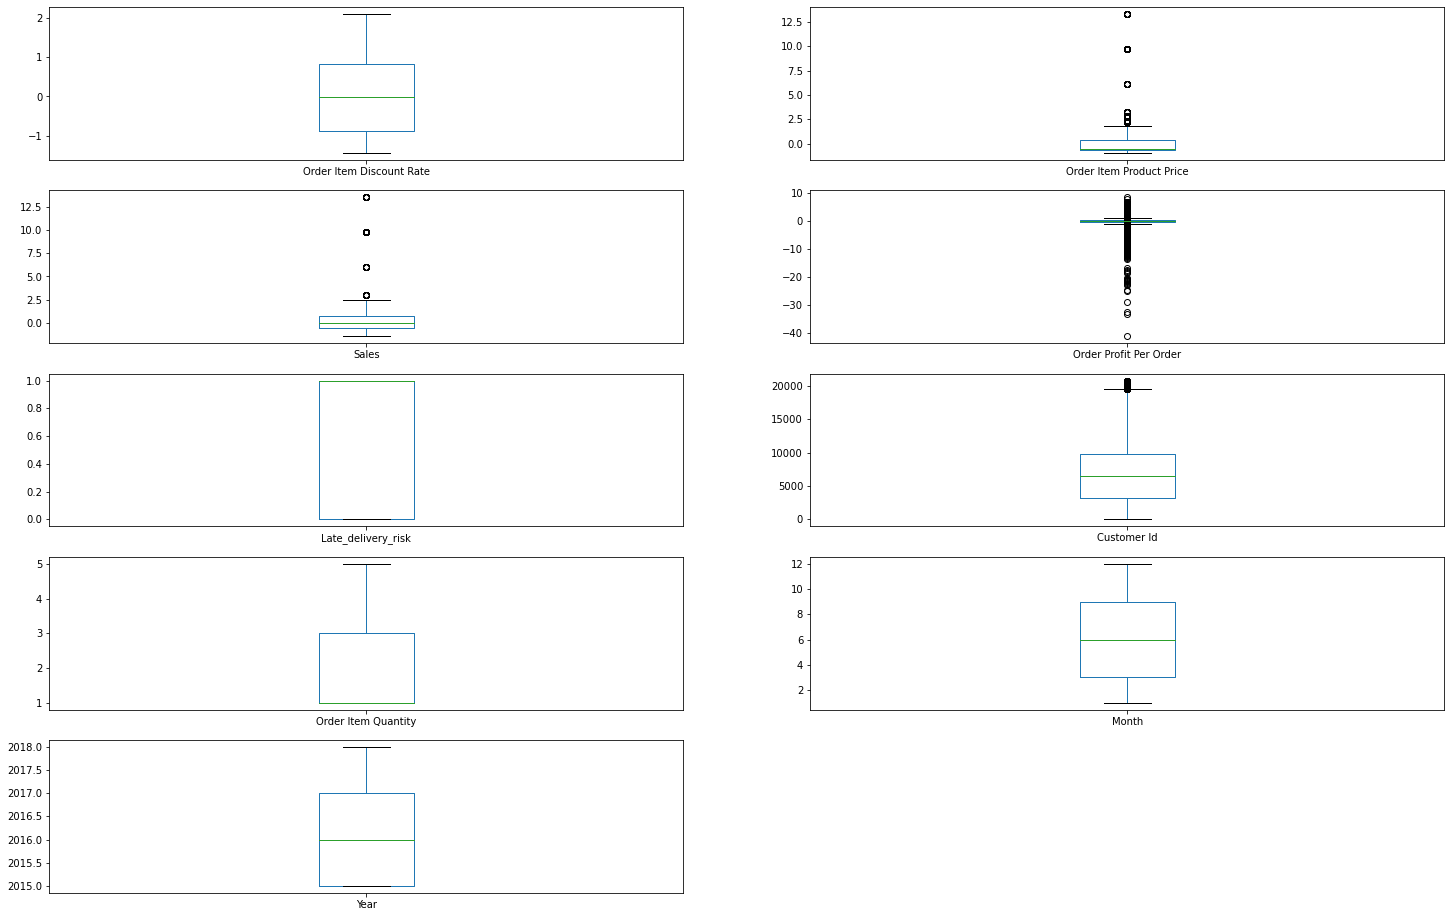

In [85]:
dfm.plot(kind="box",subplots=True,layout=(15,2),figsize=(25,50))
plt.show()

In [86]:
dfm.shape

(180519, 22)

# Outlier Treatment

In [87]:
Q1= dfm["Sales"].quantile(.25)
Q3= dfm["Sales"].quantile(.75)
IQR= Q3-Q1
dfm= dfm[((dfm["Sales"]>(Q1-1.5*IQR)) & (dfm["Sales"]<(Q3+1.5*IQR)))]
dfm.shape

(180031, 22)

In [88]:
Q1= dfm["Order Item Product Price"].quantile(.25)
Q3= dfm["Order Item Product Price"].quantile(.75)
IQR= Q3-Q1
dfm= dfm[((dfm["Order Item Product Price"]>(Q1-1.5*IQR)) & (dfm["Order Item Product Price"]<(Q3+1.5*IQR)))]
dfm.shape

(178471, 22)

In [89]:
Q1= dfm["Order Profit Per Order"].quantile(.25)
Q3= dfm["Order Profit Per Order"].quantile(.75)
IQR= Q3-Q1
dfm= dfm[((dfm["Order Profit Per Order"]>(Q1-1.5*IQR)) & (dfm["Order Profit Per Order"]<(Q3+1.5*IQR)))]
dfm.shape

(160181, 22)

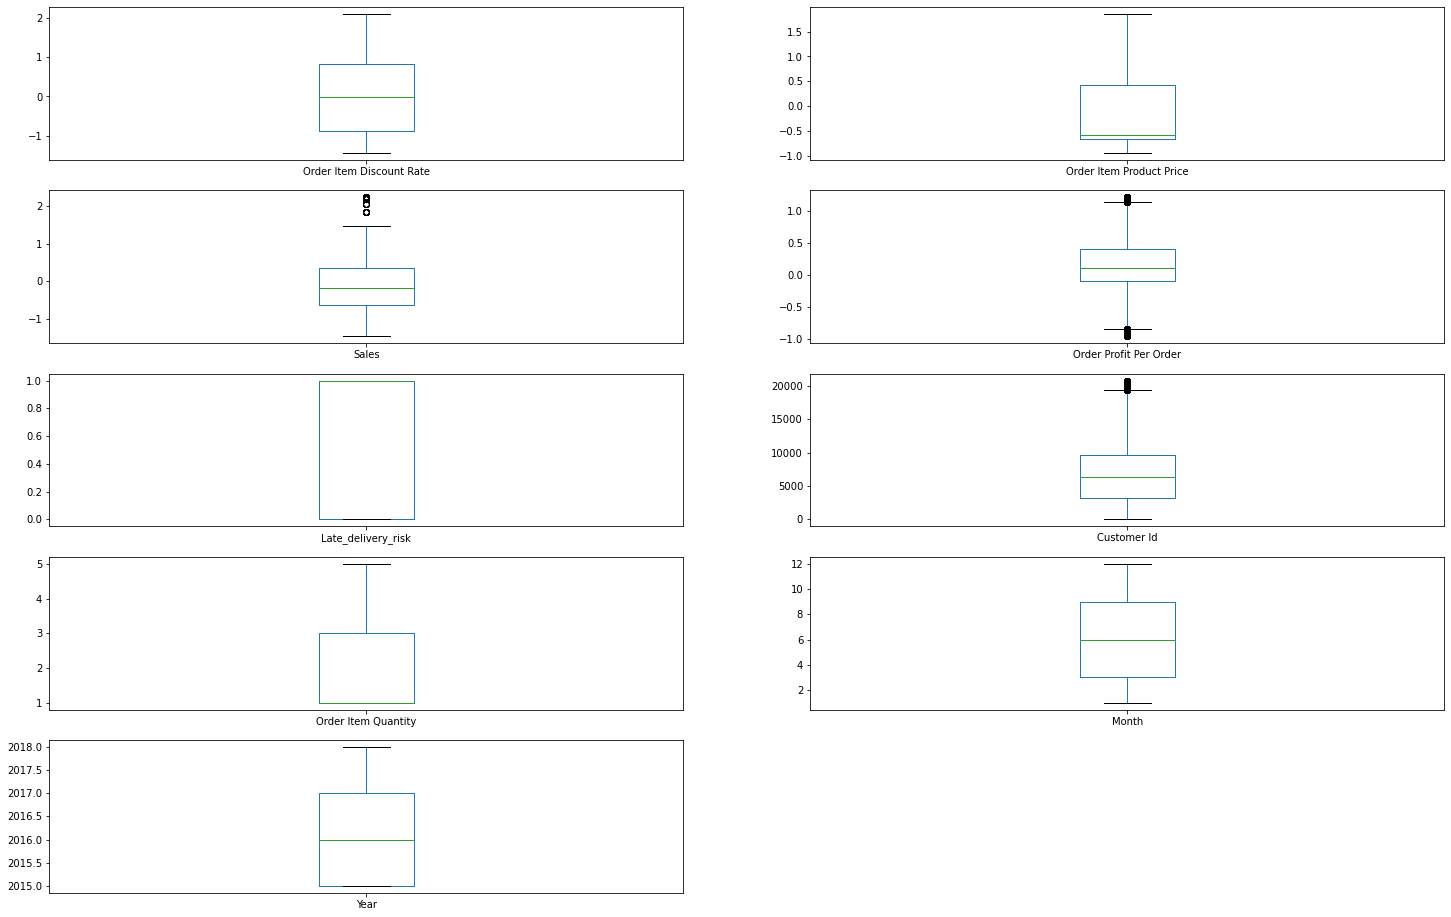

In [90]:
dfm.plot(kind="box",subplots=True,layout=(15,2),figsize=(25,50))
plt.show()

# Multicollinearity

<AxesSubplot:>

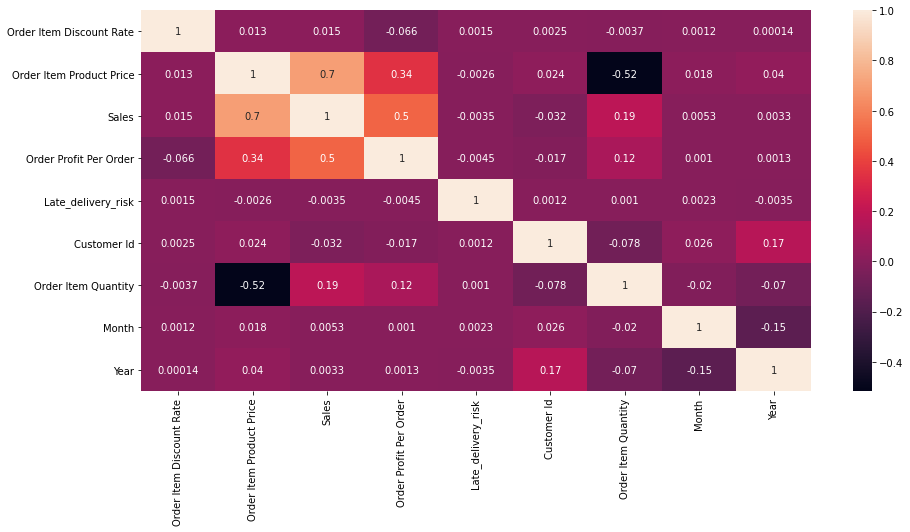

In [91]:
plt.figure(figsize=(15,7))
sns.heatmap(dfm.corr(),annot=True)

# Encoding 

In [92]:
dfm.nunique()

Order Item Discount Rate       18
Order Item Product Price       68
Sales                         186
Order Profit Per Order      14554
Late_delivery_risk              2
Customer Id                 18170
Order Item Quantity             5
Category Name                  46
Customer City                 563
Customer Country                2
Customer Segment                3
Customer State                 46
Department Name                11
Market                          5
Order City                   3585
Order Country                 164
Order Region                   23
Order State                  1086
Product Name                  110
Shipping Mode                   4
Month                          12
Year                            4
dtype: int64

In [93]:
dfm["Year"]=dfm["Year"].astype("object")
dfm["Month"]=dfm["Month"].astype("object")
dfm["Order Item Quantity"]=dfm["Order Item Quantity"].astype("object")
dfm["Late_delivery_risk"]=dfm["Late_delivery_risk"].astype("object")

In [94]:
dfm_cat=dfm.drop(["Order Item Discount Rate","Order Item Product Price","Sales","Order Profit Per Order","Order City",
                  "Customer Id","Category Name","Customer City","Customer State","Order City","Order Country","Order State",
                  "Product Name"
                 ],axis=1)
dfm_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160181 entries, 0 to 180516
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Late_delivery_risk   160181 non-null  object
 1   Order Item Quantity  160181 non-null  object
 2   Customer Country     160181 non-null  object
 3   Customer Segment     160181 non-null  object
 4   Department Name      160181 non-null  object
 5   Market               160181 non-null  object
 6   Order Region         160181 non-null  object
 7   Shipping Mode        160181 non-null  object
 8   Month                160181 non-null  object
 9   Year                 160181 non-null  object
dtypes: object(10)
memory usage: 13.4+ MB


In [95]:
#for i in dfm_cat.columns:
#    print(dfm_cat[i].value_counts())

In [96]:
dummy=pd.get_dummies(dfm_cat)
dummy.head()

Late_delivery_risk_0  Late_delivery_risk_1  Order Item Quantity_1  \
0                     1                     0                      1   
3                     1                     0                      1   
4                     1                     0                      1   
5                     1                     0                      1   
6                     0                     1                      1   

   Order Item Quantity_2  Order Item Quantity_3  Order Item Quantity_4  \
0                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   
5                      0                      0                      0   
6                      0                      0                      0   

   Order Item Quantity_5  Customer Country_EE. UU.  \
0                      0                         0   
3                      0                         1   
4                      0                         0   
5                      0                         1   
6                      0                         0   

   Customer Country_Puerto Rico  Customer Segment_Consumer  \
0                             1                          1   
3                             0                          0   
4                             1                          0   
5                             0                          1   
6                             1                          0   

   Customer Segment_Corporate  Customer Segment_Home Office  \
0                           0                             0   
3                           0                             1   
4                           1                             0   
5                           0                             0   
6                           0                             1   

   Department Name_Apparel  Department Name_Book Shop  \
0                        0                          0   
3                        0                          0   
4                        0                          0   
5                        0                          0   
6                        0                          0   

   Department Name_Discs Shop  Department Name_Fan Shop  \
0                           0                         0   
3                           0                         0   
4                           0                         0   
5                           0                         0   
6                           0                         0   

   Department Name_Fitness  Department Name_Footwear  Department Name_Golf  \
0                        1                         0                     0   
3                        1                         0                     0   
4                        1                         0                     0   
5                        1                         0                     0   
6                        1                         0                     0   

   Department Name_Health and Beauty   Department Name_Outdoors  \
0                                   0                         0   
3                                   0                         0   
4                                   0                         0   
5                                   0                         0   
6                                   0                         0   

   Department Name_Pet Shop  Department Name_Technology  Market_Africa  \
0                         0                           0              0   
3                         0                           0              0   
4                         0                           0              0   
5                         0                           0              0   
6                         0                           0              0   

   Market_Europe  Market_LATAM  M

In [97]:
dummy.shape

(160181, 71)

In [98]:
dfp1=pd.concat([dfm.iloc[:,[0,1,2,3]],dummy],axis=1)
dfp1.head()

Order Item Discount Rate  Order Item Product Price    Sales  \
0                 -0.875782                  1.334822  0.93729   
3                 -0.449736                  1.334822  0.93729   
4                 -0.165706                  1.334822  0.93729   
5                 -0.023691                  1.334822  0.93729   
6                  0.260339                  1.334822  0.93729   

   Order Profit Per Order  Late_delivery_risk_0  Late_delivery_risk_1  \
0                0.663343                     1                     0   
3                0.008474                     1                     0   
4                1.074706                     1                     0   
5               -0.032509                     1                     0   
6                0.700974                     0                     1   

   Order Item Quantity_1  Order Item Quantity_2  Order Item Quantity_3  \
0                      1                      0                      0   
3                      1                      0                      0   
4                      1                      0                      0   
5                      1                      0                      0   
6                      1                      0                      0   

   Order Item Quantity_4  Order Item Quantity_5  Customer Country_EE. UU.  \
0                      0                      0                         0   
3                      0                      0                         1   
4                      0                      0                         0   
5                      0                      0                         1   
6                      0                      0                         0   

   Customer Country_Puerto Rico  Customer Segment_Consumer  \
0                             1                          1   
3                             0                          0   
4                             1                          0   
5                             0                          1   
6                             1                          0   

   Customer Segment_Corporate  Customer Segment_Home Office  \
0                           0                             0   
3                           0                             1   
4                           1                             0   
5                           0                             0   
6                           0                             1   

   Department Name_Apparel  Department Name_Book Shop  \
0                        0                          0   
3                        0                          0   
4                        0                          0   
5                        0                          0   
6                        0                          0   

   Department Name_Discs Shop  Department Name_Fan Shop  \
0                           0                         0   
3                           0                         0   
4                           0                         0   
5                           0                         0   
6                           0                         0   

   Department Name_Fitness  Department Name_Footwear  Department Name_Golf  \
0                        1                         0                     0   
3                        1                         0                     0   
4                        1                         0                     0   
5                        1                         0                     0   
6                        1                         0                     0   

   Department Name_Health and Beauty   Department Name_Outdoors  \
0                                   0                         0   
3                                   0                         0   
4                                   0                         0   
5                                   0                         0   
6    

In [99]:
dfp1.drop("Late_delivery_risk_0",axis=1,inplace=True)

In [100]:
dfp1.shape

(160181, 74)

In [101]:
dfp1.head()

Order Item Discount Rate  Order Item Product Price    Sales  \
0                 -0.875782                  1.334822  0.93729   
3                 -0.449736                  1.334822  0.93729   
4                 -0.165706                  1.334822  0.93729   
5                 -0.023691                  1.334822  0.93729   
6                  0.260339                  1.334822  0.93729   

   Order Profit Per Order  Late_delivery_risk_1  Order Item Quantity_1  \
0                0.663343                     0                      1   
3                0.008474                     0                      1   
4                1.074706                     0                      1   
5               -0.032509                     0                      1   
6                0.700974                     1                      1   

   Order Item Quantity_2  Order Item Quantity_3  Order Item Quantity_4  \
0                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   
5                      0                      0                      0   
6                      0                      0                      0   

   Order Item Quantity_5  Customer Country_EE. UU.  \
0                      0                         0   
3                      0                         1   
4                      0                         0   
5                      0                         1   
6                      0                         0   

   Customer Country_Puerto Rico  Customer Segment_Consumer  \
0                             1                          1   
3                             0                          0   
4                             1                          0   
5                             0                          1   
6                             1                          0   

   Customer Segment_Corporate  Customer Segment_Home Office  \
0                           0                             0   
3                           0                             1   
4                           1                             0   
5                           0                             0   
6                           0                             1   

   Department Name_Apparel  Department Name_Book Shop  \
0                        0                          0   
3                        0                          0   
4                        0                          0   
5                        0                          0   
6                        0                          0   

   Department Name_Discs Shop  Department Name_Fan Shop  \
0                           0                         0   
3                           0                         0   
4                           0                         0   
5                           0                         0   
6                           0                         0   

   Department Name_Fitness  Department Name_Footwear  Department Name_Golf  \
0                        1                         0                     0   
3                        1                         0                     0   
4                        1                         0                     0   
5                        1                         0                     0   
6                        1                         0                     0   

   Department Name_Health and Beauty   Department Name_Outdoors  \
0                                   0                         0   
3                                   0                         0   
4                                   0                         0   
5                                   0                         0   
6                                   0                         0   

   Department Name_Pet Shop  Department Name_Technology  Market_Afric

In [102]:
from sklearn.preprocessing import LabelEncoder
z=["Order City","Customer Id","Category Name","Customer City","Customer State","Order City",
   "Order Country","Order State",  "Product Name"]

for i in z:
    le=LabelEncoder()
    dfp1[i]=le.fit_transform(dfm[[i]])
    

In [103]:
dfp1.head()

Order Item Discount Rate  Order Item Product Price    Sales  \
0                 -0.875782                  1.334822  0.93729   
3                 -0.449736                  1.334822  0.93729   
4                 -0.165706                  1.334822  0.93729   
5                 -0.023691                  1.334822  0.93729   
6                  0.260339                  1.334822  0.93729   

   Order Profit Per Order  Late_delivery_risk_1  Order Item Quantity_1  \
0                0.663343                     0                      1   
3                0.008474                     0                      1   
4                1.074706                     0                      1   
5               -0.032509                     0                      1   
6                0.700974                     1                      1   

   Order Item Quantity_2  Order Item Quantity_3  Order Item Quantity_4  \
0                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   
5                      0                      0                      0   
6                      0                      0                      0   

   Order Item Quantity_5  Customer Country_EE. UU.  \
0                      0                         0   
3                      0                         1   
4                      0                         0   
5                      0                         1   
6                      0                         0   

   Customer Country_Puerto Rico  Customer Segment_Consumer  \
0                             1                          1   
3                             0                          0   
4                             1                          0   
5                             0                          1   
6                             1                          0   

   Customer Segment_Corporate  Customer Segment_Home Office  \
0                           0                             0   
3                           0                             1   
4                           1                             0   
5                           0                             0   
6                           0                             1   

   Department Name_Apparel  Department Name_Book Shop  \
0                        0                          0   
3                        0                          0   
4                        0                          0   
5                        0                          0   
6                        0                          0   

   Department Name_Discs Shop  Department Name_Fan Shop  \
0                           0                         0   
3                           0                         0   
4                           0                         0   
5                           0                         0   
6                           0                         0   

   Department Name_Fitness  Department Name_Footwear  Department Name_Golf  \
0                        1                         0                     0   
3                        1                         0                     0   
4                        1                         0                     0   
5                        1                         0                     0   
6                        1                         0                     0   

   Department Name_Health and Beauty   Department Name_Outdoors  \
0                                   0                         0   
3                                   0                         0   
4                                   0                         0   
5                                   0                         0   
6                                   0                         0   

   Department Name_Pet Shop  Department Name_Technology  Market_Afric

In [115]:
dfp1.shape

(160181, 82)

In [104]:
#dfp1.to_csv("D:\Data Science\8.capstone project\SCM dataset\DataFrame_Lencoded.csv")

In [107]:
dfp1["Late_delivery_risk_1"].value_counts()

1    87769
0    72412
Name: Late_delivery_risk_1, dtype: int64

In [105]:
# The target variable does not have imbalance issue.

## Feature selection

Information Gain :
Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [110]:
X_fin=dfp1.drop("Late_delivery_risk_1",axis=1)
Y=dfp1["Late_delivery_risk_1"]

In [111]:
from     sklearn.feature_selection  import mutual_info_classif
import  matplotlib.pyplot  as  plt

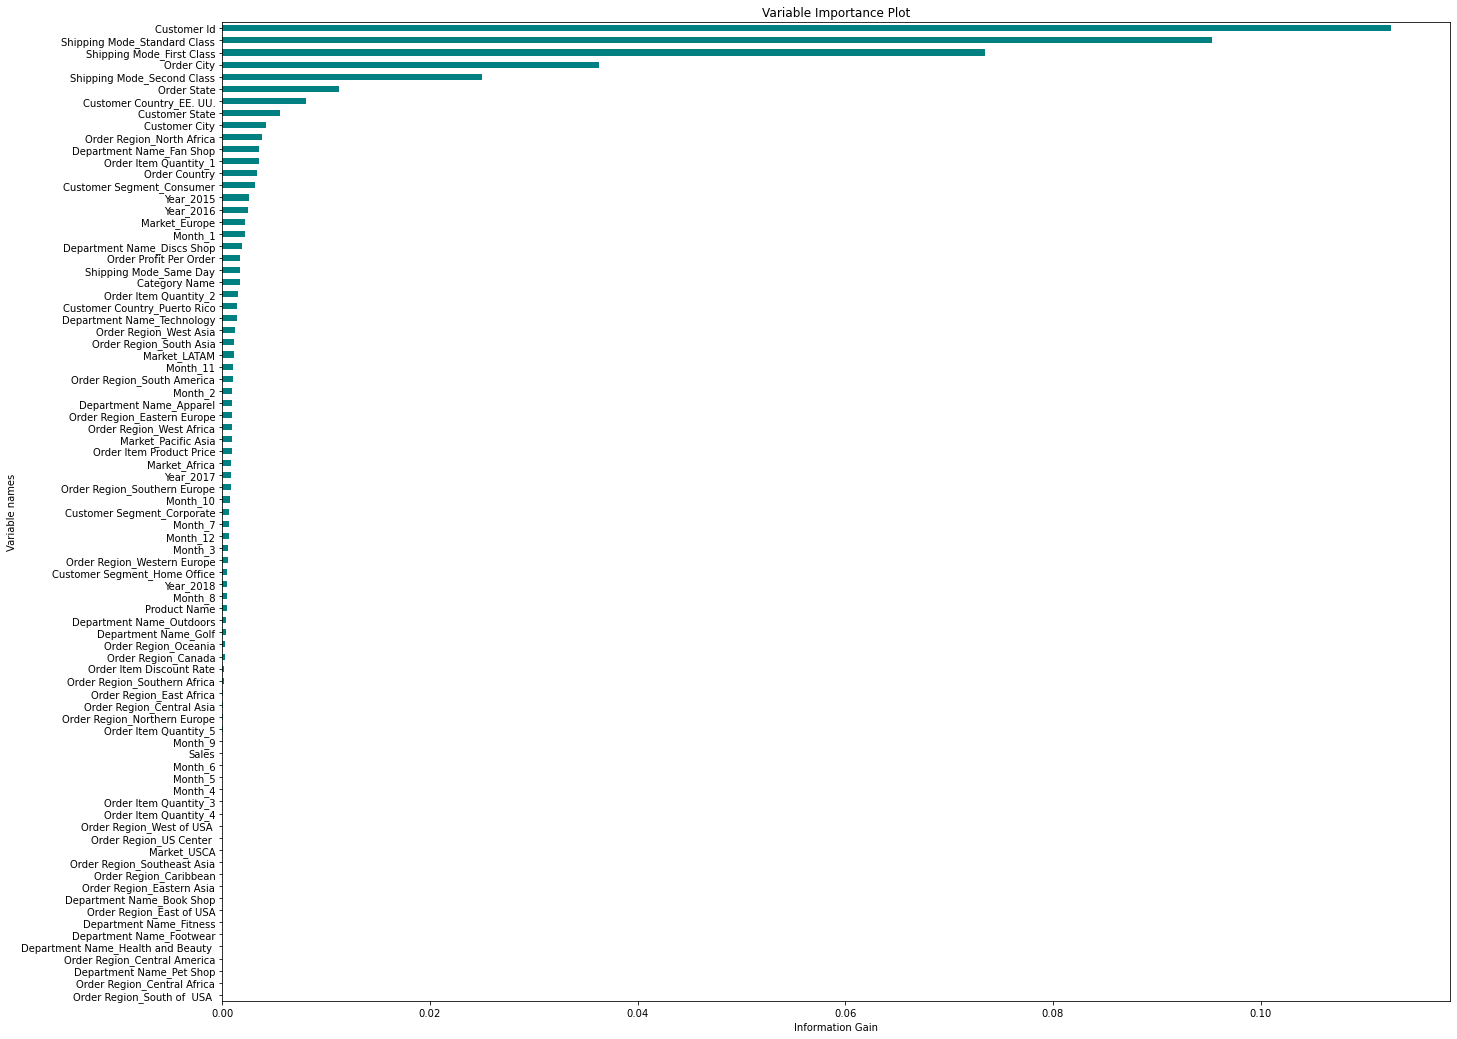

In [114]:
%matplotlib inline

importances              =   mutual_info_classif(X_fin,Y)
feature_importances      =   pd.Series(importances, X_fin.columns)
feature_importances.sort_values(ascending = True,inplace = True)
ax                       =  feature_importances.plot(kind = 'barh', color = 'teal', figsize = (22, 18), title = 'Variable Importance Plot' )
ax.set_xlabel("Information Gain")
ax.set_ylabel("Variable names")
plt.show()

In [ ]:
# the above variables are important features obtained through information gain feature selection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc
from sklearn.model_selection import KFold, train_test_split,cross_val_score

import pydotplus
%matplotlib inline

In [2]:
df_len_len = pd.read_csv('DataFrame_Lencoded.csv',encoding='latin')
df_len_len.head()

Unnamed: 0  Order Item Discount Rate  Order Item Product Price    Sales  \
0           0                 -0.875782                  1.334822  0.93729   
1           3                 -0.449736                  1.334822  0.93729   
2           4                 -0.165706                  1.334822  0.93729   
3           5                 -0.023691                  1.334822  0.93729   
4           6                  0.260339                  1.334822  0.93729   

   Order Profit Per Order  Late_delivery_risk_1  Order Item Quantity_1  \
0                0.663343                     0                      1   
1                0.008474                     0                      1   
2                1.074706                     0                      1   
3               -0.032509                     0                      1   
4                0.700974                     1                      1   

   Order Item Quantity_2  Order Item Quantity_3  Order Item Quantity_4  ...  \
0                      0                      0                      0  ...   
1                      0                      0                      0  ...   
2                      0                      0                      0  ...   
3                      0                      0                      0  ...   
4                      0                      0                      0  ...   

   Year_2017  Year_2018  Order City  Customer Id  Category Name  \
0          0          1         329        18167             36   
1          0          1        3215        16937             36   
2          0          1        3215        16936             36   
3          0          1        3196        16935             36   
4          0          1        1232        16934             36   

   Customer City  Customer State  Order Country  Order State  Product Name  
0             66              36             70          475            71  
1            285               5              8          833            71  
2             66              36              8          833            71  
3            505              31              8          833            71  
4             66              36             31          386            71  

[5 rows x 83 columns]

In [3]:
df_len.columns

Index(['Unnamed: 0', 'Order Item Discount Rate', 'Order Item Product Price',
       'Sales', 'Order Profit Per Order', 'Late_delivery_risk_1',
       'Order Item Quantity_1', 'Order Item Quantity_2',
       'Order Item Quantity_3', 'Order Item Quantity_4',
       'Order Item Quantity_5', 'Customer Country_EE. UU.',
       'Customer Country_Puerto Rico', 'Customer Segment_Consumer',
       'Customer Segment_Corporate', 'Customer Segment_Home Office',
       'Department Name_Apparel', 'Department Name_Book Shop',
       'Department Name_Discs Shop', 'Department Name_Fan Shop',
       'Department Name_Fitness', 'Department Name_Footwear',
       'Department Name_Golf', 'Department Name_Health and Beauty ',
       'Department Name_Outdoors', 'Department Name_Pet Shop',
       'Department Name_Technology', 'Market_Africa', 'Market_Europe',
       'Market_LATAM', 'Market_Pacific Asia', 'Market_USCA',
       'Order Region_Canada', 'Order Region_Caribbean',
       'Order Region_Central Africa'

In [4]:
X = df_len.drop(['Unnamed: 0','Late_delivery_risk_1'],axis=1)
y = df_len['Late_delivery_risk_1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12345,stratify=y)

In [5]:
y_train.value_counts().apply(lambda x: [x,(x*100)/y_train.shape[0]])

1    [61438, 54.793714214365984]
0    [50688, 45.206285785634016]
Name: Late_delivery_risk_1, dtype: object

In [6]:
y_test.value_counts().apply(lambda x: [x,(x*100)/y_test.shape[0]])

1    [26331, 54.793465820414106]
0    [21724, 45.206534179585894]
Name: Late_delivery_risk_1, dtype: object

In [7]:
# Class proportion is same in both training and testing data

# Decision Tree

In [8]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
predicted_train = clf.predict(X_train)

In [10]:
matrix = confusion_matrix(y_train,predicted_train)
print("\nTraining Data")
print(matrix)


Training Data
[[50688     0]
 [    0 61438]]


In [33]:
def draw_cm(actual,predicted):
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    import seaborn as sns
    
    cm = metrics.confusion_matrix(actual,predicted,[1,0])
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels = ['Yes','No'],yticklabels = ['Yes','No'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


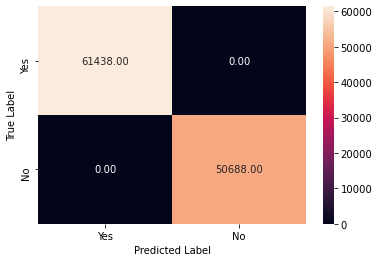

In [12]:
draw_cm(y_train,predicted_train)

In [13]:
accuracy_train = clf.score(X_train,y_train)
measures_train = classification_report(y_train,predicted_train)
print('\nTraining data\n')
print("Training Accuracy: %.3f%%" % (accuracy_train*100))
print(measures_train)


Training data

Training Accuracy: 100.000%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50688
           1       1.00      1.00      1.00     61438

    accuracy                           1.00    112126
   macro avg       1.00      1.00      1.00    112126
weighted avg       1.00      1.00      1.00    112126



## ROC Curve

In [34]:
def draw_roc(actual,probs):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    import seaborn as sns
    
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(6,4))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc='lower right')
    plt.show()
    return fpr,tpr,thresholds

## Performance on training data

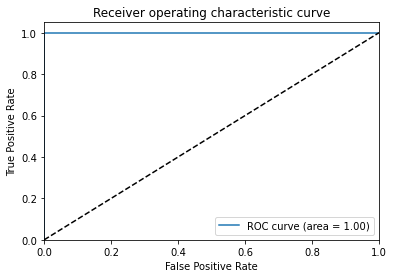

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0]))

In [15]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(clf,X_train,y_train,scoring=scoring)
draw_roc(y_train,predicted_train)

#### Very high performance on training data

# Performance on test data

In [16]:
predicted_testing = clf.predict(X_test)

In [17]:
matrix = confusion_matrix(y_test,predicted_testing)
accuracy_train = clf.score(X_test,y_test)
measures_test = classification_report(y_test,predicted_testing)

print('\nTesting Data\n')
print(matrix)
print("Testing Accuracy: %.3f%%" % (accuracy_train*100))
print(measures_test)


Testing Data

[[17443  4281]
 [ 4269 22062]]
Testing Accuracy: 82.208%
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     21724
           1       0.84      0.84      0.84     26331

    accuracy                           0.82     48055
   macro avg       0.82      0.82      0.82     48055
weighted avg       0.82      0.82      0.82     48055



/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


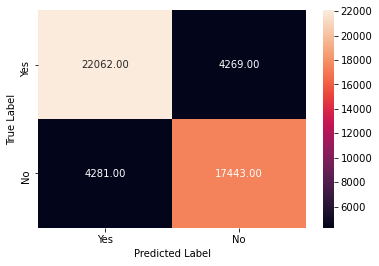

In [18]:
draw_cm(y_test,predicted_testing)

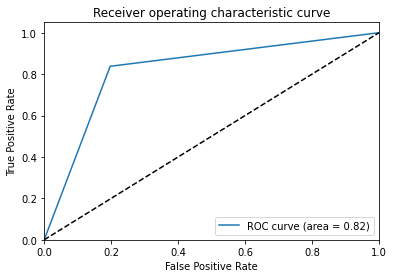

(array([0.        , 0.19706316, 1.        ]),
 array([0.        , 0.83787171, 1.        ]),
 array([2, 1, 0]))

In [19]:
draw_roc(y_test,predicted_testing)

In [20]:
decision_tree = {'Metrics':['Precision for class 1','Precision for class 0',
                            'Recall for class 1','Recall for class 0','Accuracy','AUROC'],
                 'Training dataset':[1,1,1,1,'100%',1],
                 'Testing dataset':[0.84,0.80,0.84,0.80,'82%',0.82]}
dt_df_len = pd.DataFrame(decision_tree)
dt_df_len

Metrics Training dataset Testing dataset
0  Precision for class 1                1            0.84
1  Precision for class 0                1             0.8
2     Recall for class 1                1            0.84
3     Recall for class 0                1             0.8
4               Accuracy             100%             82%
5                  AUROC                1            0.82

#### The model is overfitting

## Pruning the Decision Tree

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
tune_params = {'criterion':['entropy','gini'],'max_depth':[30,35,40]}
rand = RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=tune_params,
                         n_iter=8,scoring='accuracy',cv=3,n_jobs=-1)
rand.fit(X_train,y_train)

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=8. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=8,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [30, 35, 40]},
                   scoring='accuracy')

In [40]:
rand.best_params_

{'max_depth': 40, 'criterion': 'gini'}

In [22]:
clf1 = DecisionTreeClassifier(criterion='gini',max_depth=40)
clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=40)

In [23]:
predicted_train = clf1.predict(X_train)

In [24]:
print('\nTraining data')
matrix = confusion_matrix(y_train,predicted_train)
print(matrix)
measures_train = classification_report(y_train,predicted_train)
print(measures_train)


Training data
[[50195   493]
 [  567 60871]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     50688
           1       0.99      0.99      0.99     61438

    accuracy                           0.99    112126
   macro avg       0.99      0.99      0.99    112126
weighted avg       0.99      0.99      0.99    112126



/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


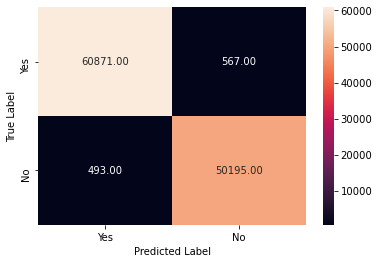

In [25]:
draw_cm(y_train,predicted_train)

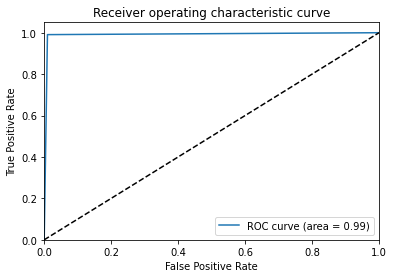

(array([0.        , 0.00972617, 1.        ]),
 array([0.        , 0.99077118, 1.        ]),
 array([2, 1, 0]))

In [26]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(clf1,X_train,y_train,scoring=scoring)
draw_roc(y_train,predicted_train)

In [27]:
predicted_test = clf1.predict(X_test)

In [28]:
print('\nTesting Data')
matrix = confusion_matrix(y_test,predicted_test)
print(matrix)
measures_test = classification_report(y_test,predicted_test)
print(measures_test)


Testing Data
[[17337  4387]
 [ 4393 21938]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     21724
           1       0.83      0.83      0.83     26331

    accuracy                           0.82     48055
   macro avg       0.82      0.82      0.82     48055
weighted avg       0.82      0.82      0.82     48055



/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


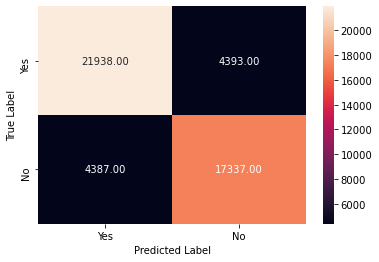

In [29]:
draw_cm(y_test,predicted_test)

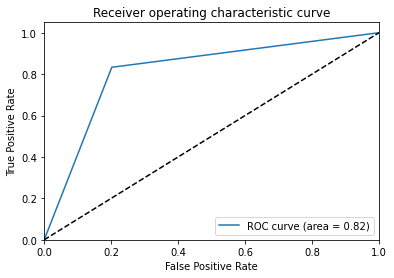

(array([0.        , 0.20194255, 1.        ]),
 array([0.        , 0.83316243, 1.        ]),
 array([2, 1, 0]))

In [30]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(clf1,X_test,y_test,scoring=scoring)
draw_roc(y_test,predicted_test)

In [56]:
decision_tree = {'Metrics':['Precision for class 1','Precision for class 0',
                            'Recall for class 1','Recall for class 0','Accuracy','AUROC'],
                 'Training dataset':[0.99,0.99,0.99,0.99,'99%',0.99],
                 'Testing dataset':[0.83,0.80,0.83,0.80,'82%',0.82]}
dt_df_len1 = pd.DataFrame(decision_tree)
dt_df_len1

Metrics Training dataset Testing dataset
0  Precision for class 1             0.99            0.83
1  Precision for class 0             0.99             0.8
2     Recall for class 1             0.99            0.83
3     Recall for class 0             0.99             0.8
4               Accuracy              99%             82%
5                  AUROC             0.99            0.82

In [57]:
# there is still a difference between training and testing results

## Optimum cut-off

In [31]:
def get_youdens_cutoff(fpr,tpr,thresholds):
    scores = np.abs(tpr-fpr)
    order = sorted((zip(scores,thresholds,fpr,tpr)))
    
    fig,ax = plt.subplots()
    plt.plot(tpr)
    plt.plot(1-fpr,color='red')
    plt.xlabel('1-FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    ax.set_xticklabels([])
    res = {'fpr':order[-1][2],'tpr':order[-1][3],'threshold':order[-1][1]}
    return res

In [32]:
predicted_proba_train = clf1.predict_proba(X_train)[:,1]

{'fpr': 0.008937026515151516, 'tpr': 0.9902340570982129, 'threshold': 0.5625}

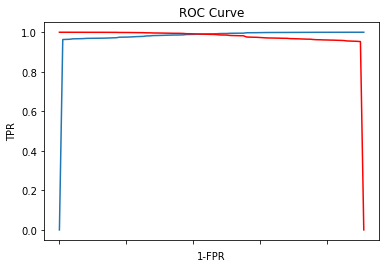

In [61]:
fpr,tpr,thresholds = roc_curve(y_train,predicted_proba_train)
get_youdens_cutoff(fpr,tpr,thresholds)

In [62]:
# so optimum thereshold = 0.56 insteadt of 0.50

In [33]:
thresh_train_df_len = pd.DataFrame()
thresh_train_df_len['Actual'] = y_train
threshold = 0.5625
cutoff_df_len = pd.DataFrame()

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[60827   611]
 [  453 50235]]


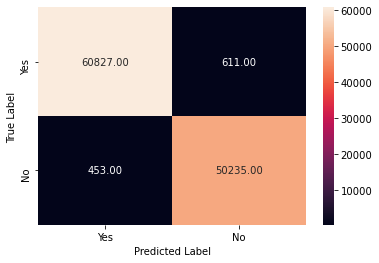

In [34]:
thresh_train_df_len['Probability'] = predicted_proba_train
thresh_train_df_len['pred'] = thresh_train_df_len['Probability'].map(lambda x: 1 if x>threshold else 0)
cm = confusion_matrix(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'],[1,0])
print(cm)
draw_cm(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'])

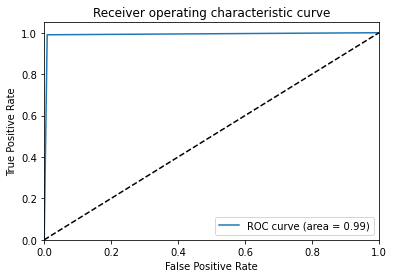

   Threshold    Recall  Precision  Accuracy_ratio
0     0.5625  0.991063   0.987983       99.051068


In [35]:
draw_roc(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'])
precision = np.diag(cm)/np.sum(cm,axis=0)
recall = np.diag(cm)/np.sum(cm,axis=1)

accuracy_ratio = ((cm[0,0] + cm[1,1])*100 )/((cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))
recall_positive = recall[1]
precision_positive = precision[1]
cutoff_df_len_ind = pd.DataFrame({'Threshold':threshold,'Recall':recall_positive,'Precision':precision_positive,'Accuracy_ratio':accuracy_ratio},index=[0])
print(cutoff_df_len_ind)

In [36]:
thresh_test_df_len = pd.DataFrame()
thresh_test_df_len['Actual'] = y_test
threshold = 0.5625
cutoff_df_len = pd.DataFrame()

In [37]:
predicted_proba_test = clf1.predict_proba(X_test)[:,1]

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[21922  4409]
 [ 4372 17352]]


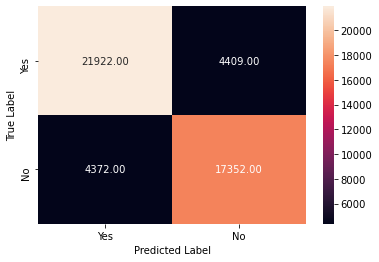

In [38]:
thresh_test_df_len['Probability'] = predicted_proba_test
thresh_test_df_len['pred'] = thresh_test_df_len['Probability'].map(lambda x: 1 if x>threshold else 0)
cm = confusion_matrix(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'],[1,0])
print(cm)
draw_cm(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'])

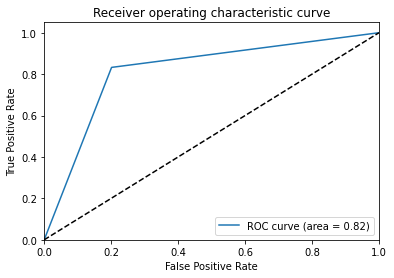

   Threshold    Recall  Precision  Accuracy_ratio
0     0.5625  0.798748    0.79739       81.727188


In [39]:
draw_roc(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'])
precision = np.diag(cm)/np.sum(cm,axis=0)
recall = np.diag(cm)/np.sum(cm,axis=1)

accuracy_ratio = ((cm[0,0] + cm[1,1])*100 )/((cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))
recall_positive = recall[1]
precision_positive = precision[1]
cutoff_df_len_ind = pd.DataFrame({'Threshold':threshold,'Recall':recall_positive,'Precision':precision_positive,'Accuracy_ratio':accuracy_ratio},index=[0])
print(cutoff_df_len_ind)

In [72]:
varImp_df_len = pd.DataFrame({'Features':X.columns,'Importances':clf1.feature_importances_})
varImp_df_len.sort_values('Importances',ascending=False,inplace=True)

In [73]:
varImp_df_len

Features  Importances
56  Shipping Mode_Standard Class     0.172937
74                   Customer Id     0.145749
73                    Order City     0.086786
76                 Customer City     0.078019
79                   Order State     0.062594
..                           ...          ...
23      Department Name_Pet Shop     0.000209
72                     Year_2018     0.000159
24    Department Name_Technology     0.000114
15     Department Name_Book Shop     0.000079
55    Shipping Mode_Second Class     0.000000

[81 rows x 2 columns]

In [4]:
model_summary = pd.DataFrame({'Model':['Unpruned decision Tree','depth tuned decision Tree','cutoff tuned decision tree'],
                              'Training Precision_1':[1,0.99,0.89],
                              'Testing Precision_1':[0.84,0.83,0.79],
                              'Training Recall_1':[1,0.99,0.99],
                              'Testing Recall_1':[0.84,0.83,0.8],
                              'Training f1_weighted':[1,0.99,0.98],
                              'Testing f1_weighted':[0.82,0.82,0.79],
                              'Training Accuracy':[1,0.99,0.99],
                              'Testing Accuracy':[0.82,0.81,0.81],
                              'AUROC Train':[1,0.99,0.99],
                              'AUROC Test':[0.82,0.82,0.82]
                             })
model_summary

Model  Training Precision_1  Testing Precision_1  \
0      Unpruned decision Tree                  1.00                 0.84   
1   depth tuned decision Tree                  0.99                 0.83   
2  cutoff tuned decision tree                  0.89                 0.79   

   Training Recall_1  Testing Recall_1  Training f1_weighted  \
0               1.00              0.84                  1.00   
1               0.99              0.83                  0.99   
2               0.99              0.80                  0.98   

   Testing f1_weighted  Training Accuracy  Testing Accuracy  AUROC Train  \
0                 0.82               1.00              0.82         1.00   
1                 0.82               0.99              0.81         0.99   
2                 0.79               0.99              0.81         0.99   

   AUROC Test  
0        0.82  
1        0.82  
2        0.82

# Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
predicted_train = lr.predict(X_train)

In [44]:
print('\nTraining data')
matrix = confusion_matrix(y_train,predicted_train)
print(matrix)
measures_train = classification_report(y_train,predicted_train)
print(measures_train)


Training data
[[ 8745 41943]
 [ 8278 53160]]
              precision    recall  f1-score   support

           0       0.51      0.17      0.26     50688
           1       0.56      0.87      0.68     61438

    accuracy                           0.55    112126
   macro avg       0.54      0.52      0.47    112126
weighted avg       0.54      0.55      0.49    112126



/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

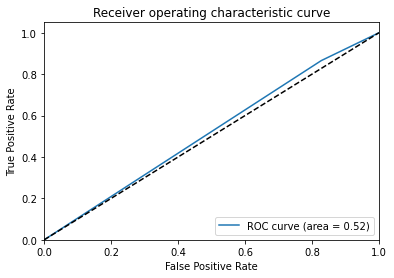

(array([0.        , 0.82747396, 1.        ]),
 array([0.        , 0.86526254, 1.        ]),
 array([2, 1, 0]))

In [45]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(lr,X_train,y_train,scoring=scoring)
draw_roc(y_train,predicted_train)

In [46]:
predicted_test = lr.predict(X_test)

In [47]:
print('\nTesting data')
matrix = confusion_matrix(y_test,predicted_test)
print(matrix)
measures_test = classification_report(y_test,predicted_test)
print(measures_test)


Testing data
[[ 3700 18024]
 [ 3445 22886]]
              precision    recall  f1-score   support

           0       0.52      0.17      0.26     21724
           1       0.56      0.87      0.68     26331

    accuracy                           0.55     48055
   macro avg       0.54      0.52      0.47     48055
weighted avg       0.54      0.55      0.49     48055



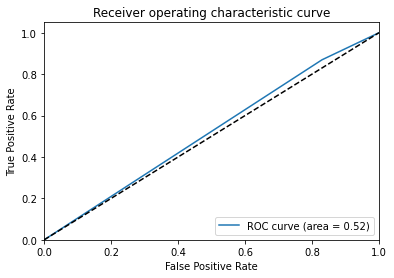

(array([0.        , 0.82968146, 1.        ]),
 array([0.        , 0.86916562, 1.        ]),
 array([2, 1, 0]))

In [48]:
draw_roc(y_test,predicted_test)

In [5]:
df_len1 = {'Model':'Logistic regression without tuned cutoff',
       'Training Precision_1':0.56,
       'Testing Precision_1':0.56,
       'Training Recall_1':0.87,
       'Testing Recall_1':0.87,
       'Training f1_weighted':0.49,
       'Testing f1_weighted':0.49,
       'Training Accuracy':0.55,
       'Testing Accuracy':0.55,
       'AUROC Train':0.52,
       'AUROC Test':0.52
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                    Unpruned decision Tree                  1.00   
1                 depth tuned decision Tree                  0.99   
2                cutoff tuned decision tree                  0.89   
3  Logistic regression without tuned cutoff                  0.56   

   Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                 0.84               1.00              0.84   
1                 0.83               0.99              0.83   
2                 0.79               0.99              0.80   
3                 0.56               0.87              0.87   

   Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0                  1.00                 0.82               1.00   
1                  0.99                 0.82               0.99   
2                  0.98                 0.79               0.99   
3                  0.49                 0.49               0.55   

   Testing Accuracy  AUROC Train  AUROC Test  
0              0.82         1.00        0.82  
1              0.81         0.99        0.82  
2              0.81         0.99        0.82  
3              0.55         0.52        0.52

In [50]:
predicted_proba_train = lr.predict_proba(X_train)[:,1]

{'fpr': 0.270675505050505,
 'tpr': 0.3624955239428367,
 'threshold': 0.5712805599861789}

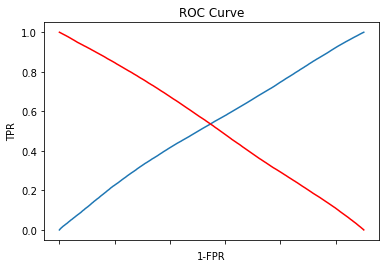

In [51]:
fpr,tpr,thresholds = roc_curve(y_train,predicted_proba_train)
get_youdens_cutoff(fpr,tpr,thresholds)

In [86]:
# optimum threshold = 0.57 and not 0.5

# logistic regression for training data

In [52]:
thresh_train_df_len = pd.DataFrame()
thresh_train_df_len['Actual'] = y_train
threshold = 0.5712
cutoff_df_len = pd.DataFrame()

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[22325 39113]
 [13767 36921]]


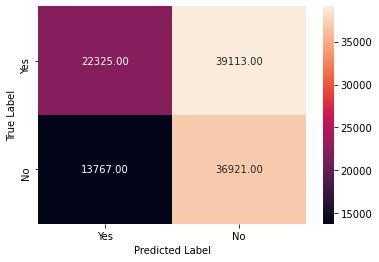

In [53]:
thresh_train_df_len['Probability'] = predicted_proba_train
thresh_train_df_len['pred'] = thresh_train_df_len['Probability'].map(lambda x: 1 if x>threshold else 0)
cm = confusion_matrix(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'],[1,0])
print(cm)
draw_cm(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'])

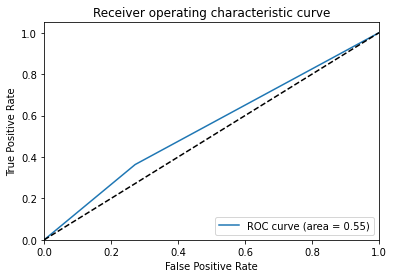

   Threshold    Recall  Precision  Accuracy_ratio
0     0.5712  0.728397   0.485585       52.838771


In [54]:
draw_roc(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'])
precision = np.diag(cm)/np.sum(cm,axis=0)
recall = np.diag(cm)/np.sum(cm,axis=1)

accuracy_ratio = ((cm[0,0] + cm[1,1])*100 )/((cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))
recall_positive = recall[1]
precision_positive = precision[1]
cutoff_df_len_ind = pd.DataFrame({'Threshold':threshold,'Recall':recall_positive,'Precision':precision_positive,'Accuracy_ratio':accuracy_ratio},index=[0])
print(cutoff_df_len_ind)

# logistic regression for testing data

In [55]:
thresh_test_df_len = pd.DataFrame()
thresh_test_df_len['Actual'] = y_test
threshold = 0.5712
cutoff_df_len = pd.DataFrame()

In [56]:
predicted_proba_test = lr.predict_proba(X_test)[:,1]

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[ 9479 16852]
 [ 5909 15815]]


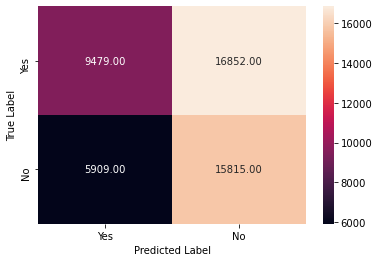

In [57]:
thresh_test_df_len['Probability'] = predicted_proba_test
thresh_test_df_len['pred'] = thresh_test_df_len['Probability'].map(lambda x: 1 if x>threshold else 0)
cm = confusion_matrix(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'],[1,0])
print(cm)
draw_cm(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'])

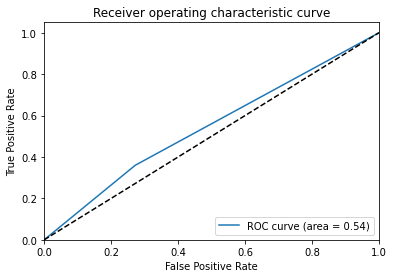

   Threshold    Recall  Precision  Accuracy_ratio
0     0.5712  0.727997   0.484128       52.635522


In [58]:
draw_roc(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'])
precision = np.diag(cm)/np.sum(cm,axis=0)
recall = np.diag(cm)/np.sum(cm,axis=1)

accuracy_ratio = ((cm[0,0] + cm[1,1])*100 )/((cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))
recall_positive = recall[1]
precision_positive = precision[1]
cutoff_df_len_ind = pd.DataFrame({'Threshold':threshold,'Recall':recall_positive,'Precision':precision_positive,'Accuracy_ratio':accuracy_ratio},index=[0])
print(cutoff_df_len_ind)

In [6]:
df_len1 = {'Model':'Logistic regression with tuned cutoff',
       'Training Precision_1':0.48,
       'Testing Precision_1':0.48,
       'Training Recall_1':0.72,
       'Testing Recall_1':0.72,
       'Training f1_weighted':2*0.48*0.72/(0.48+0.72),
       'Testing f1_weighted':2*0.48*0.72/(0.48*0.72),
       'Training Accuracy':0.53,
       'Testing Accuracy':0.52,
       'AUROC Train':0.55,
       'AUROC Test':0.54
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                    Unpruned decision Tree                  1.00   
1                 depth tuned decision Tree                  0.99   
2                cutoff tuned decision tree                  0.89   
3  Logistic regression without tuned cutoff                  0.56   
4     Logistic regression with tuned cutoff                  0.48   

   Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                 0.84               1.00              0.84   
1                 0.83               0.99              0.83   
2                 0.79               0.99              0.80   
3                 0.56               0.87              0.87   
4                 0.48               0.72              0.72   

   Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0                 1.000                 0.82               1.00   
1                 0.990                 0.82               0.99   
2                 0.980                 0.79               0.99   
3                 0.490                 0.49               0.55   
4                 0.576                 2.00               0.53   

   Testing Accuracy  AUROC Train  AUROC Test  
0              0.82         1.00        0.82  
1              0.81         0.99        0.82  
2              0.81         0.99        0.82  
3              0.55         0.52        0.52  
4              0.52         0.55        0.54

# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [62]:
predicted_train = knn.predict(X_train)

In [63]:
print('\nTraining data')
matrix = confusion_matrix(y_train,predicted_train)
print(matrix)
measures_train = classification_report(y_train,predicted_train)
print(measures_train)


Training data
[[34346 16342]
 [13127 48311]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     50688
           1       0.75      0.79      0.77     61438

    accuracy                           0.74    112126
   macro avg       0.74      0.73      0.73    112126
weighted avg       0.74      0.74      0.74    112126



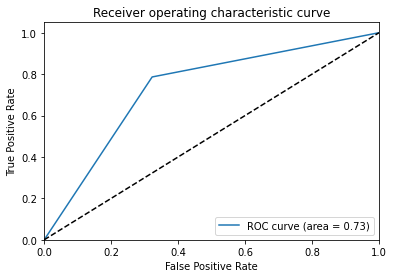

(array([0.        , 0.32240372, 1.        ]),
 array([0.        , 0.78633745, 1.        ]),
 array([2, 1, 0]))

In [64]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(knn,X_train,y_train,scoring=scoring)
draw_roc(y_train,predicted_train)

In [65]:
predicted_test = knn.predict(X_test)

In [66]:
print('\nTesting data')
matrix = confusion_matrix(y_test,predicted_test)
print(matrix)
measures_test = classification_report(y_test,predicted_test)
print(measures_test)


Testing data
[[12425  9299]
 [ 7649 18682]]
              precision    recall  f1-score   support

           0       0.62      0.57      0.59     21724
           1       0.67      0.71      0.69     26331

    accuracy                           0.65     48055
   macro avg       0.64      0.64      0.64     48055
weighted avg       0.65      0.65      0.65     48055



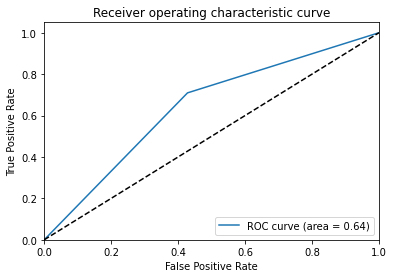

(array([0.        , 0.42805192, 1.        ]),
 array([0.        , 0.70950591, 1.        ]),
 array([2, 1, 0]))

In [67]:
draw_roc(y_test,predicted_test)

In [7]:
df_len1 = {'Model':'KNN Model untuned',
       'Training Precision_1':0.75,
       'Testing Precision_1':0.67,
       'Training Recall_1':0.79,
       'Testing Recall_1':0.71,
       'Training f1_weighted':0.74,
       'Testing f1_weighted':0.65,
       'Training Accuracy':0.74,
       'Testing Accuracy':0.65,
       'AUROC Train':0.73,
       'AUROC Test':0.64
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                    Unpruned decision Tree                  1.00   
1                 depth tuned decision Tree                  0.99   
2                cutoff tuned decision tree                  0.89   
3  Logistic regression without tuned cutoff                  0.56   
4     Logistic regression with tuned cutoff                  0.48   
5                         KNN Model untuned                  0.75   

   Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                 0.84               1.00              0.84   
1                 0.83               0.99              0.83   
2                 0.79               0.99              0.80   
3                 0.56               0.87              0.87   
4                 0.48               0.72              0.72   
5                 0.67               0.79              0.71   

   Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0                 1.000                 0.82               1.00   
1                 0.990                 0.82               0.99   
2                 0.980                 0.79               0.99   
3                 0.490                 0.49               0.55   
4                 0.576                 2.00               0.53   
5                 0.740                 0.65               0.74   

   Testing Accuracy  AUROC Train  AUROC Test  
0              0.82         1.00        0.82  
1              0.81         0.99        0.82  
2              0.81         0.99        0.82  
3              0.55         0.52        0.52  
4              0.52         0.55        0.54  
5              0.65         0.73        0.64

## tuning knn model 

In [108]:
tune_params = {'n_neighbors':range(5,18,2)}
rand = RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=tune_params,n_iter=8,
                           cv=3,scoring='accuracy')
rand.fit(X_train,y_train)

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 7 is smaller than n_iter=8. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=8,
                   param_distributions={'n_neighbors': range(5, 18, 2)},
                   scoring='accuracy')

In [109]:
rand.best_params_

{'n_neighbors': 5}

In [69]:
knn_tuned = KNeighborsClassifier(n_neighbors=5)
knn_tuned.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
predicted_train = knn_tuned.predict(X_train)

In [71]:
print('\nTraining data')
matrix = confusion_matrix(y_train,predicted_train)
print(matrix)
measures_train = classification_report(y_train,predicted_train)
print(measures_train)


Training data
[[40983  9705]
 [ 8307 53131]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     50688
           1       0.85      0.86      0.86     61438

    accuracy                           0.84    112126
   macro avg       0.84      0.84      0.84    112126
weighted avg       0.84      0.84      0.84    112126



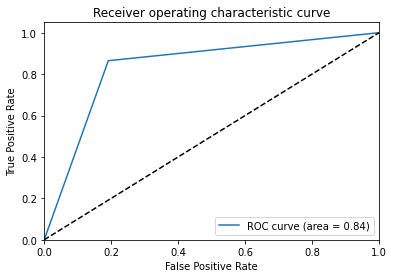

(array([0.        , 0.19146544, 1.        ]),
 array([0.        , 0.86479052, 1.        ]),
 array([2, 1, 0]))

In [72]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(knn_tuned,X_train,y_train,scoring=scoring)
draw_roc(y_train,predicted_train)

In [73]:
predicted_test = knn_tuned.predict(X_test)

In [74]:
print('\nTesting data')
matrix = confusion_matrix(y_test,predicted_test)
print(matrix)
measures_test = classification_report(y_test,predicted_test)
print(measures_test)


Testing data
[[14195  7529]
 [ 6732 19599]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67     21724
           1       0.72      0.74      0.73     26331

    accuracy                           0.70     48055
   macro avg       0.70      0.70      0.70     48055
weighted avg       0.70      0.70      0.70     48055



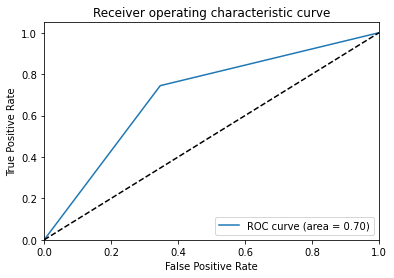

(array([0.        , 0.34657522, 1.        ]),
 array([0.        , 0.74433178, 1.        ]),
 array([2, 1, 0]))

In [75]:
draw_roc(y_test,predicted_test)

In [8]:
df_len1 = {'Model':'KNN Model tuned',
       'Training Precision_1':0.85,
       'Testing Precision_1':0.72,
       'Training Recall_1':0.86,
       'Testing Recall_1':0.74,
       'Training f1_weighted':0.84,
       'Testing f1_weighted':0.70,
       'Training Accuracy':0.84,
       'Testing Accuracy':0.70,
       'AUROC Train':0.84,
       'AUROC Test':0.70
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                    Unpruned decision Tree                  1.00   
1                 depth tuned decision Tree                  0.99   
2                cutoff tuned decision tree                  0.89   
3  Logistic regression without tuned cutoff                  0.56   
4     Logistic regression with tuned cutoff                  0.48   
5                         KNN Model untuned                  0.75   
6                           KNN Model tuned                  0.85   

   Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                 0.84               1.00              0.84   
1                 0.83               0.99              0.83   
2                 0.79               0.99              0.80   
3                 0.56               0.87              0.87   
4                 0.48               0.72              0.72   
5                 0.67               0.79              0.71   
6                 0.72               0.86              0.74   

   Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0                 1.000                 0.82               1.00   
1                 0.990                 0.82               0.99   
2                 0.980                 0.79               0.99   
3                 0.490                 0.49               0.55   
4                 0.576                 2.00               0.53   
5                 0.740                 0.65               0.74   
6                 0.840                 0.70               0.84   

   Testing Accuracy  AUROC Train  AUROC Test  
0              0.82         1.00        0.82  
1              0.81         0.99        0.82  
2              0.81         0.99        0.82  
3              0.55         0.52        0.52  
4              0.52         0.55        0.54  
5              0.65         0.73        0.64  
6              0.70         0.84        0.70

## cutoff tuning of tuned knn model

In [77]:
predicted_proba_train = knn_tuned.predict_proba(X_train)[:,1]

{'fpr': 0.1914654356060606, 'tpr': 0.8647905205247567, 'threshold': 0.6}

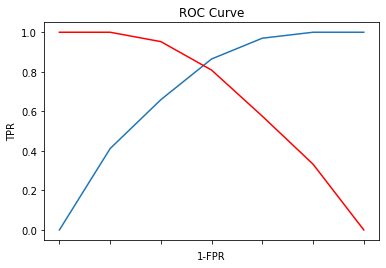

In [78]:
fpr,tpr,thresholds = roc_curve(y_train,predicted_proba_train)
get_youdens_cutoff(fpr,tpr,thresholds)

In [119]:
# optimum threshold = 0.6

In [120]:
thresh_train_df_len = pd.DataFrame()
thresh_train_df_len['Actual'] = y_train
threshold = 0.6
cutoff_df_len = pd.DataFrame()

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[40481 20957]
 [ 2405 48283]]


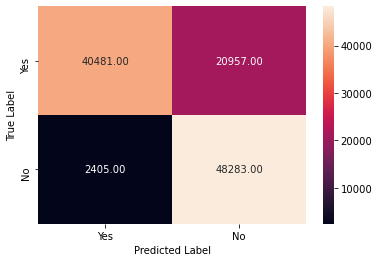

In [121]:
thresh_train_df_len['Probability'] = predicted_proba_train
thresh_train_df_len['pred'] = thresh_train_df_len['Probability'].map(lambda x: 1 if x>threshold else 0)
cm = confusion_matrix(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'],[1,0])
print(cm)
draw_cm(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'])

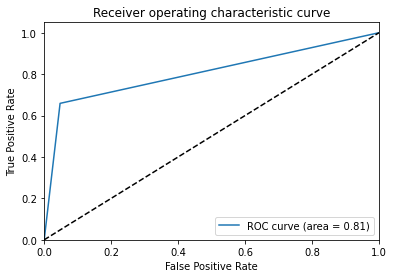

   Threshold    Recall  Precision  Accuracy_ratio
0        0.6  0.952553   0.697328       79.164511


In [122]:
draw_roc(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'])
precision = np.diag(cm)/np.sum(cm,axis=0)
recall = np.diag(cm)/np.sum(cm,axis=1)

accuracy_ratio = ((cm[0,0] + cm[1,1])*100 )/((cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))
recall_positive = recall[1]
precision_positive = precision[1]
cutoff_df_len_ind = pd.DataFrame({'Threshold':threshold,'Recall':recall_positive,'Precision':precision_positive,'Accuracy_ratio':accuracy_ratio},index=[0])
print(cutoff_df_len_ind)

In [123]:
thresh_test_df_len = pd.DataFrame()
thresh_test_df_len['Actual'] = y_test
threshold = 0.6
cutoff_df_len = pd.DataFrame()

In [124]:
predicted_proba_test = knn_tuned.predict_proba(X_test)[:,1]

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[13833 12498]
 [ 3214 18510]]


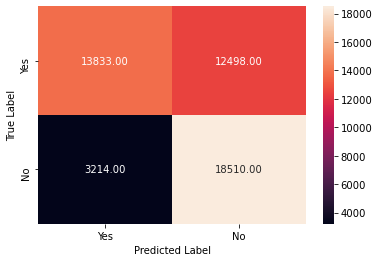

In [125]:
thresh_test_df_len['Probability'] = predicted_proba_test
thresh_test_df_len['pred'] = thresh_test_df_len['Probability'].map(lambda x: 1 if x>threshold else 0)
cm = confusion_matrix(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'],[1,0])
print(cm)
draw_cm(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'])

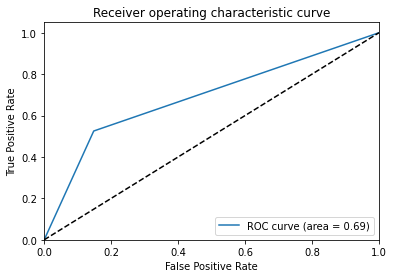

   Threshold    Recall  Precision  Accuracy_ratio
0        0.6  0.852053   0.596943       67.304131


In [126]:
draw_roc(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'])
precision = np.diag(cm)/np.sum(cm,axis=0)
recall = np.diag(cm)/np.sum(cm,axis=1)

accuracy_ratio = ((cm[0,0] + cm[1,1])*100 )/((cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))
recall_positive = recall[1]
precision_positive = precision[1]
cutoff_df_len_ind = pd.DataFrame({'Threshold':threshold,'Recall':recall_positive,'Precision':precision_positive,'Accuracy_ratio':accuracy_ratio},index=[0])
print(cutoff_df_len_ind)

In [9]:
df_len1 = {'Model':'KNN Model tuned with cutoff',
       'Training Precision_1':0.70,
       'Testing Precision_1':0.59,
       'Training Recall_1':0.95,
       'Testing Recall_1':0.85,
       'Training f1_weighted':2*0.7*0.95/(0.7+0.95),
       'Testing f1_weighted':2*0.59*0.85/(0.59+0.85),
       'Training Accuracy':0.79,
       'Testing Accuracy':0.67,
       'AUROC Train':0.81,
       'AUROC Test':0.69
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                    Unpruned decision Tree                  1.00   
1                 depth tuned decision Tree                  0.99   
2                cutoff tuned decision tree                  0.89   
3  Logistic regression without tuned cutoff                  0.56   
4     Logistic regression with tuned cutoff                  0.48   
5                         KNN Model untuned                  0.75   
6                           KNN Model tuned                  0.85   
7               KNN Model tuned with cutoff                  0.70   

   Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                 0.84               1.00              0.84   
1                 0.83               0.99              0.83   
2                 0.79               0.99              0.80   
3                 0.56               0.87              0.87   
4                 0.48               0.72              0.72   
5                 0.67               0.79              0.71   
6                 0.72               0.86              0.74   
7                 0.59               0.95              0.85   

   Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0              1.000000             0.820000               1.00   
1              0.990000             0.820000               0.99   
2              0.980000             0.790000               0.99   
3              0.490000             0.490000               0.55   
4              0.576000             2.000000               0.53   
5              0.740000             0.650000               0.74   
6              0.840000             0.700000               0.84   
7              0.806061             0.696528               0.79   

   Testing Accuracy  AUROC Train  AUROC Test  
0              0.82         1.00        0.82  
1              0.81         0.99        0.82  
2              0.81         0.99        0.82  
3              0.55         0.52        0.52  
4              0.52         0.55        0.54  
5              0.65         0.73        0.64  
6              0.70         0.84        0.70  
7              0.67         0.81        0.69

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
predicted_train = rfc.predict(X_train)

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


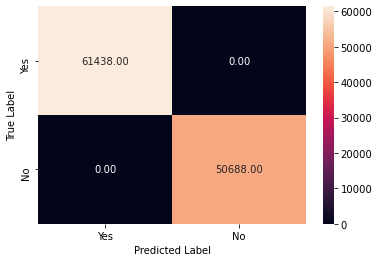

In [83]:
draw_cm(y_train,predicted_train)

In [84]:
print('\nTraining data')
matrix = confusion_matrix(y_train,predicted_train)
print(matrix)
measures_train = classification_report(y_train,predicted_train)
print(measures_train)


Training data
[[50688     0]
 [    0 61438]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50688
           1       1.00      1.00      1.00     61438

    accuracy                           1.00    112126
   macro avg       1.00      1.00      1.00    112126
weighted avg       1.00      1.00      1.00    112126



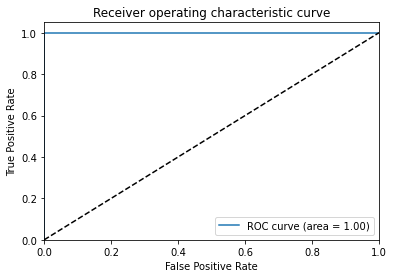

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0]))

In [85]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(rfc,X_train,y_train,scoring=scoring)
draw_roc(y_train,predicted_train)

In [86]:
predicted_test = rfc.predict(X_test)

In [87]:
print('\nTesting data')
matrix = confusion_matrix(y_test,predicted_test)
print(matrix)
measures_test = classification_report(y_test,predicted_test)
print(measures_test)


Testing data
[[18497  3227]
 [ 8385 17946]]
              precision    recall  f1-score   support

           0       0.69      0.85      0.76     21724
           1       0.85      0.68      0.76     26331

    accuracy                           0.76     48055
   macro avg       0.77      0.77      0.76     48055
weighted avg       0.78      0.76      0.76     48055



/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


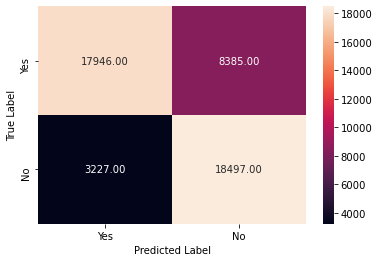

In [88]:
draw_cm(y_test,predicted_test)

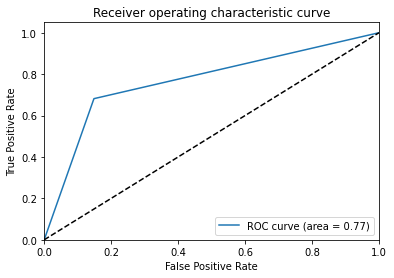

(array([0.        , 0.14854539, 1.        ]),
 array([0.        , 0.68155406, 1.        ]),
 array([2, 1, 0]))

In [89]:
draw_roc(y_test,predicted_test)

In [10]:
df_len1 = {'Model':'Random Forest untuned',
       'Training Precision_1':1,
       'Testing Precision_1':0.85,
       'Training Recall_1':1,
       'Testing Recall_1':0.68,
       'Training f1_weighted':1,
       'Testing f1_weighted':0.78,
       'Training Accuracy':1,
       'Testing Accuracy':0.76,
       'AUROC Train':1,
       'AUROC Test':0.77
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                    Unpruned decision Tree                  1.00   
1                 depth tuned decision Tree                  0.99   
2                cutoff tuned decision tree                  0.89   
3  Logistic regression without tuned cutoff                  0.56   
4     Logistic regression with tuned cutoff                  0.48   
5                         KNN Model untuned                  0.75   
6                           KNN Model tuned                  0.85   
7               KNN Model tuned with cutoff                  0.70   
8                     Random Forest untuned                  1.00   

   Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                 0.84               1.00              0.84   
1                 0.83               0.99              0.83   
2                 0.79               0.99              0.80   
3                 0.56               0.87              0.87   
4                 0.48               0.72              0.72   
5                 0.67               0.79              0.71   
6                 0.72               0.86              0.74   
7                 0.59               0.95              0.85   
8                 0.85               1.00              0.68   

   Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0              1.000000             0.820000               1.00   
1              0.990000             0.820000               0.99   
2              0.980000             0.790000               0.99   
3              0.490000             0.490000               0.55   
4              0.576000             2.000000               0.53   
5              0.740000             0.650000               0.74   
6              0.840000             0.700000               0.84   
7              0.806061             0.696528               0.79   
8              1.000000             0.780000               1.00   

   Testing Accuracy  AUROC Train  AUROC Test  
0              0.82         1.00        0.82  
1              0.81         0.99        0.82  
2              0.81         0.99        0.82  
3              0.55         0.52        0.52  
4              0.52         0.55        0.54  
5              0.65         0.73        0.64  
6              0.70         0.84        0.70  
7              0.67         0.81        0.69  
8              0.76         1.00        0.77

## tuning Random Forest

In [142]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num = 5) ]
max_features = ['auto','sqrt']

max_depth = [int(x) for x in np.linspace(100,500,num=5) ]
max_depth.append(None)
print(n_estimators)
print(max_depth)

[200, 400, 600, 800, 1000]
[100, 200, 300, 400, 500, None]


In [145]:
random_grid = {'n_estimators':n_estimators,'max_depth':max_depth,'criterion':['gini','entropy']}
rfc_random = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=random_grid,n_iter = 8,
                               cv=3, verbose=2,random_state=42)
rfc_random.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ....criterion=gini, max_depth=100, n_estimators=200; total time=  45.4s
[CV] END ....criterion=gini, max_depth=100, n_estimators=200; total time=  43.2s
[CV] END ....criterion=gini, max_depth=100, n_estimators=200; total time=  44.1s
[CV] END ....criterion=gini, max_depth=200, n_estimators=200; total time=  43.8s
[CV] END ....criterion=gini, max_depth=200, n_estimators=200; total time=  43.5s
[CV] END ....criterion=gini, max_depth=200, n_estimators=200; total time=  43.1s
[CV] END .criterion=entropy, max_depth=200, n_estimators=400; total time= 1.6min
[CV] END .criterion=entropy, max_depth=200, n_estimators=400; total time= 1.6min
[CV] END .criterion=entropy, max_depth=200, n_estimators=400; total time= 1.6min
[CV] END .criterion=entropy, max_depth=400, n_estimators=200; total time=  48.3s
[CV] END .criterion=entropy, max_depth=400, n_estimators=200; total time= 1.5min
[CV] END .criterion=entropy, max_depth=400, n_est

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=8,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [100, 200, 300, 400, 500,
                                                      None],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [146]:
rfc_random.best_params_

{'n_estimators': 200, 'max_depth': 400, 'criterion': 'entropy'}

In [91]:
rfc_tuned = RandomForestClassifier(criterion='entropy',max_depth=400,n_estimators=200)
rfc_tuned.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=400, n_estimators=200)

In [92]:
predicted_train = rfc_tuned.predict(X_train)

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


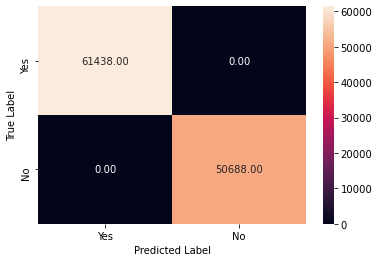

In [93]:
draw_cm(y_train,predicted_train)

In [94]:
print('\nTraining data')
matrix = confusion_matrix(y_train,predicted_train)
print(matrix)
measures_train = classification_report(y_train,predicted_train)
print(measures_train)


Training data
[[50688     0]
 [    0 61438]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50688
           1       1.00      1.00      1.00     61438

    accuracy                           1.00    112126
   macro avg       1.00      1.00      1.00    112126
weighted avg       1.00      1.00      1.00    112126



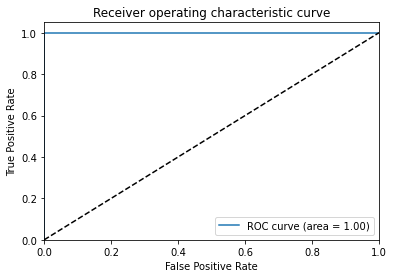

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0]))

In [95]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(rfc_tuned,X_train,y_train,scoring=scoring)
draw_roc(y_train,predicted_train)

In [96]:
predicted_test = rfc.predict(X_test)

In [97]:
print('\nTesting data')
matrix = confusion_matrix(y_test,predicted_test)
print(matrix)
measures_test = classification_report(y_test,predicted_test)
print(measures_test)


Testing data
[[18497  3227]
 [ 8385 17946]]
              precision    recall  f1-score   support

           0       0.69      0.85      0.76     21724
           1       0.85      0.68      0.76     26331

    accuracy                           0.76     48055
   macro avg       0.77      0.77      0.76     48055
weighted avg       0.78      0.76      0.76     48055



/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


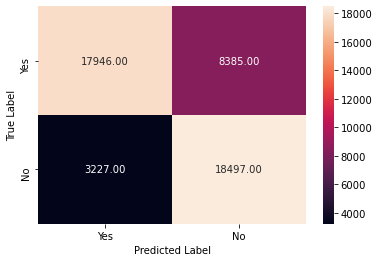

In [98]:
draw_cm(y_test,predicted_test)

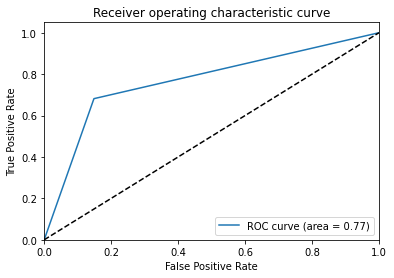

(array([0.        , 0.14854539, 1.        ]),
 array([0.        , 0.68155406, 1.        ]),
 array([2, 1, 0]))

In [99]:
draw_roc(y_test,predicted_test)

In [11]:
df_len1 = {'Model':'Random Forest tuned',
       'Training Precision_1':1,
       'Testing Precision_1':0.85,
       'Training Recall_1':1,
       'Testing Recall_1':0.68,
       'Training f1_weighted':1,
       'Testing f1_weighted':0.76,
       'Training Accuracy':1,
       'Testing Accuracy':0.76,
       'AUROC Train':1,
       'AUROC Test':0.77
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                    Unpruned decision Tree                  1.00   
1                 depth tuned decision Tree                  0.99   
2                cutoff tuned decision tree                  0.89   
3  Logistic regression without tuned cutoff                  0.56   
4     Logistic regression with tuned cutoff                  0.48   
5                         KNN Model untuned                  0.75   
6                           KNN Model tuned                  0.85   
7               KNN Model tuned with cutoff                  0.70   
8                     Random Forest untuned                  1.00   
9                       Random Forest tuned                  1.00   

   Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                 0.84               1.00              0.84   
1                 0.83               0.99              0.83   
2                 0.79               0.99              0.80   
3                 0.56               0.87              0.87   
4                 0.48               0.72              0.72   
5                 0.67               0.79              0.71   
6                 0.72               0.86              0.74   
7                 0.59               0.95              0.85   
8                 0.85               1.00              0.68   
9                 0.85               1.00              0.68   

   Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0              1.000000             0.820000               1.00   
1              0.990000             0.820000               0.99   
2              0.980000             0.790000               0.99   
3              0.490000             0.490000               0.55   
4              0.576000             2.000000               0.53   
5              0.740000             0.650000               0.74   
6              0.840000             0.700000               0.84   
7              0.806061             0.696528               0.79   
8              1.000000             0.780000               1.00   
9              1.000000             0.760000               1.00   

   Testing Accuracy  AUROC Train  AUROC Test  
0              0.82         1.00        0.82  
1              0.81         0.99        0.82  
2              0.81         0.99        0.82  
3              0.55         0.52        0.52  
4              0.52         0.55        0.54  
5              0.65         0.73        0.64  
6              0.70         0.84        0.70  
7              0.67         0.81        0.69  
8              0.76         1.00        0.77  
9              0.76         1.00        0.77

## cutoff tuning of Randomforest

In [101]:
predicted_proba_train = rfc_tuned.predict_proba(X_train)[:,1]

{'fpr': 0.0, 'tpr': 1.0, 'threshold': 0.59}

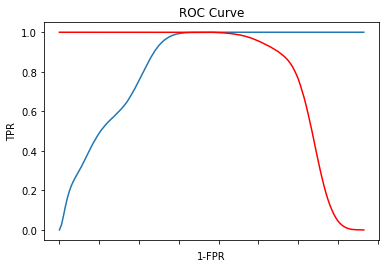

In [102]:
fpr,tpr,thresholds = roc_curve(y_train,predicted_proba_train)
get_youdens_cutoff(fpr,tpr,thresholds)

In [159]:
# optimum threshold = 0.59

In [103]:
thresh_train_df_len = pd.DataFrame()
thresh_train_df_len['Actual'] = y_train
threshold = 0.59
cutoff_df_len = pd.DataFrame()

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[61437     1]
 [    0 50688]]


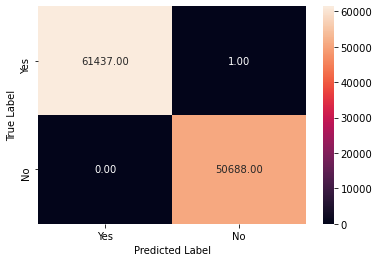

In [104]:
thresh_train_df_len['Probability'] = predicted_proba_train
thresh_train_df_len['pred'] = thresh_train_df_len['Probability'].map(lambda x: 1 if x>threshold else 0)
cm = confusion_matrix(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'],[1,0])
print(cm)
draw_cm(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'])

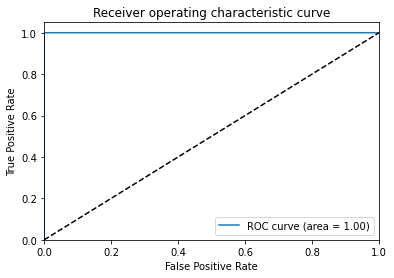

   Threshold  Recall  Precision  Accuracy_ratio
0       0.59     1.0    0.99998       99.999108


In [105]:
draw_roc(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'])
precision = np.diag(cm)/np.sum(cm,axis=0)
recall = np.diag(cm)/np.sum(cm,axis=1)

accuracy_ratio = ((cm[0,0] + cm[1,1])*100 )/((cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))
recall_positive = recall[1]
precision_positive = precision[1]
cutoff_df_len_ind = pd.DataFrame({'Threshold':threshold,'Recall':recall_positive,'Precision':precision_positive,'Accuracy_ratio':accuracy_ratio},index=[0])
print(cutoff_df_len_ind)

In [106]:
thresh_test_df_len = pd.DataFrame()
thresh_test_df_len['Actual'] = y_test
threshold = 0.59
cutoff_df_len = pd.DataFrame()

In [107]:
predicted_proba_test = rfc_tuned.predict_proba(X_test)[:,1]

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[15661 10670]
 [ 2050 19674]]


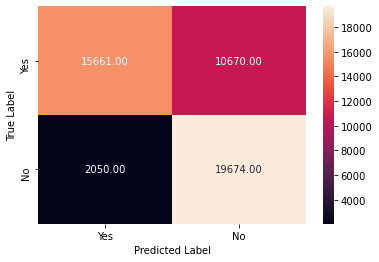

In [108]:
thresh_test_df_len['Probability'] = predicted_proba_test
thresh_test_df_len['pred'] = thresh_test_df_len['Probability'].map(lambda x: 1 if x>threshold else 0)
cm = confusion_matrix(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'],[1,0])
print(cm)
draw_cm(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'])

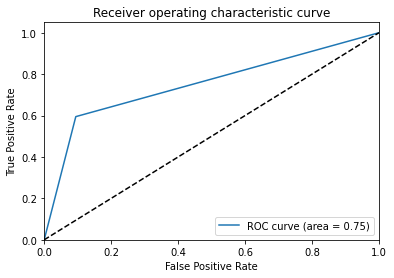

   Threshold    Recall  Precision  Accuracy_ratio
0       0.59  0.905634   0.648365        73.53033


In [109]:
draw_roc(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'])
precision = np.diag(cm)/np.sum(cm,axis=0)
recall = np.diag(cm)/np.sum(cm,axis=1)

accuracy_ratio = ((cm[0,0] + cm[1,1])*100 )/((cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))
recall_positive = recall[1]
precision_positive = precision[1]
cutoff_df_len_ind = pd.DataFrame({'Threshold':threshold,'Recall':recall_positive,'Precision':precision_positive,'Accuracy_ratio':accuracy_ratio},index=[0])
print(cutoff_df_len_ind)

In [12]:
df_len1 = {'Model':'Random Forest tuned with cutoff',
       'Training Precision_1':0.99,
       'Testing Precision_1':0.65,
       'Training Recall_1':1,
       'Testing Recall_1':0.90,
       'Training f1_weighted':2*0.99*1/(1+0.99),
       'Testing f1_weighted':2*0.65*0.9/(0.9+0.65),
       'Training Accuracy':0.99,
       'Testing Accuracy':0.74,
       'AUROC Train':1,
       'AUROC Test':0.75
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                     Unpruned decision Tree                  1.00   
1                  depth tuned decision Tree                  0.99   
2                 cutoff tuned decision tree                  0.89   
3   Logistic regression without tuned cutoff                  0.56   
4      Logistic regression with tuned cutoff                  0.48   
5                          KNN Model untuned                  0.75   
6                            KNN Model tuned                  0.85   
7                KNN Model tuned with cutoff                  0.70   
8                      Random Forest untuned                  1.00   
9                        Random Forest tuned                  1.00   
10           Random Forest tuned with cutoff                  0.99   

    Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                  0.84               1.00              0.84   
1                  0.83               0.99              0.83   
2                  0.79               0.99              0.80   
3                  0.56               0.87              0.87   
4                  0.48               0.72              0.72   
5                  0.67               0.79              0.71   
6                  0.72               0.86              0.74   
7                  0.59               0.95              0.85   
8                  0.85               1.00              0.68   
9                  0.85               1.00              0.68   
10                 0.65               1.00              0.90   

    Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0               1.000000             0.820000               1.00   
1               0.990000             0.820000               0.99   
2               0.980000             0.790000               0.99   
3               0.490000             0.490000               0.55   
4               0.576000             2.000000               0.53   
5               0.740000             0.650000               0.74   
6               0.840000             0.700000               0.84   
7               0.806061             0.696528               0.79   
8               1.000000             0.780000               1.00   
9               1.000000             0.760000               1.00   
10              0.994975             0.754839               0.99   

    Testing Accuracy  AUROC Train  AUROC Test  
0               0.82         1.00        0.82  
1               0.81         0.99        0.82  
2               0.81         0.99        0.82  
3               0.55         0.52        0.52  
4               0.52         0.55        0.54  
5               0.65         0.73        0.64  
6               0.70         0.84        0.70  
7               0.67         0.81        0.69  
8               0.76         1.00        0.77  
9               0.76         1.00        0.77  
10              0.74         1.00        0.75

# AdaBoosting

In [168]:
from sklearn.ensemble import AdaBoostClassifier

In [169]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [170]:
predicted_train = ada.predict(X_train)

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


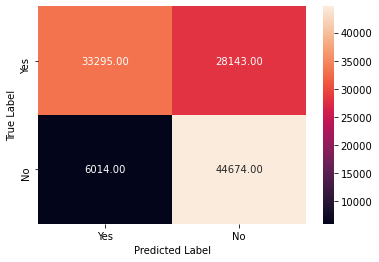

In [171]:
draw_cm(y_train,predicted_train)

In [172]:
print('\nTraining data')
matrix = confusion_matrix(y_train,predicted_train)
print(matrix)
measures_train = classification_report(y_train,predicted_train)
print(measures_train)


Training data
[[44674  6014]
 [28143 33295]]
              precision    recall  f1-score   support

           0       0.61      0.88      0.72     50688
           1       0.85      0.54      0.66     61438

    accuracy                           0.70    112126
   macro avg       0.73      0.71      0.69    112126
weighted avg       0.74      0.70      0.69    112126



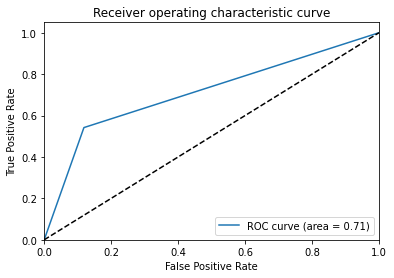

(array([0.        , 0.11864741, 1.        ]),
 array([0.        , 0.54192845, 1.        ]),
 array([2, 1, 0]))

In [173]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(ada,X_train,y_train,scoring=scoring)
draw_roc(y_train,predicted_train)

In [174]:
predicted_test = rfc.predict(X_test)

In [175]:
print('\nTesting data')
matrix = confusion_matrix(y_test,predicted_test)
print(matrix)
measures_test = classification_report(y_test,predicted_test)
print(measures_test)


Testing data
[[18500  3224]
 [ 8503 17828]]
              precision    recall  f1-score   support

           0       0.69      0.85      0.76     21724
           1       0.85      0.68      0.75     26331

    accuracy                           0.76     48055
   macro avg       0.77      0.76      0.76     48055
weighted avg       0.77      0.76      0.76     48055



/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


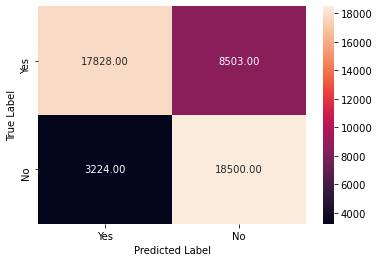

In [176]:
draw_cm(y_test,predicted_test)

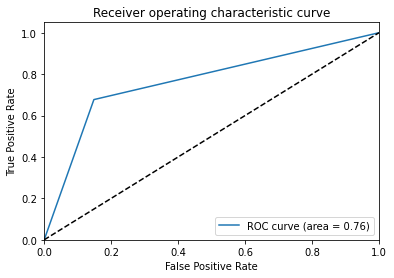

(array([0.        , 0.14840729, 1.        ]),
 array([0.        , 0.67707265, 1.        ]),
 array([2, 1, 0]))

In [177]:
draw_roc(y_test,predicted_test)

In [13]:
df_len1 = {'Model':'AdaBoost untuned',
       'Training Precision_1':0.85,
       'Testing Precision_1':0.85,
       'Training Recall_1':0.54,
       'Testing Recall_1':0.68,
       'Training f1_weighted':0.69,
       'Testing f1_weighted':0.76,
       'Training Accuracy':0.70,
       'Testing Accuracy':0.76,
       'AUROC Train':0.71,
       'AUROC Test':0.76
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                     Unpruned decision Tree                  1.00   
1                  depth tuned decision Tree                  0.99   
2                 cutoff tuned decision tree                  0.89   
3   Logistic regression without tuned cutoff                  0.56   
4      Logistic regression with tuned cutoff                  0.48   
5                          KNN Model untuned                  0.75   
6                            KNN Model tuned                  0.85   
7                KNN Model tuned with cutoff                  0.70   
8                      Random Forest untuned                  1.00   
9                        Random Forest tuned                  1.00   
10           Random Forest tuned with cutoff                  0.99   
11                          AdaBoost untuned                  0.85   

    Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                  0.84               1.00              0.84   
1                  0.83               0.99              0.83   
2                  0.79               0.99              0.80   
3                  0.56               0.87              0.87   
4                  0.48               0.72              0.72   
5                  0.67               0.79              0.71   
6                  0.72               0.86              0.74   
7                  0.59               0.95              0.85   
8                  0.85               1.00              0.68   
9                  0.85               1.00              0.68   
10                 0.65               1.00              0.90   
11                 0.85               0.54              0.68   

    Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0               1.000000             0.820000               1.00   
1               0.990000             0.820000               0.99   
2               0.980000             0.790000               0.99   
3               0.490000             0.490000               0.55   
4               0.576000             2.000000               0.53   
5               0.740000             0.650000               0.74   
6               0.840000             0.700000               0.84   
7               0.806061             0.696528               0.79   
8               1.000000             0.780000               1.00   
9               1.000000             0.760000               1.00   
10              0.994975             0.754839               0.99   
11              0.690000             0.760000               0.70   

    Testing Accuracy  AUROC Train  AUROC Test  
0               0.82         1.00        0.82  
1               0.81         0.99        0.82  
2               0.81         0.99        0.82  
3               0.55         0.52        0.52  
4               0.52         0.55        0.54  
5               0.65         0.73        0.64  
6               0.70         0.84        0.70  
7               0.67         0.81        0.69  
8               0.76         1.00        0.77  
9               0.76         1.00        0.77  
10              0.74         1.00        0.75  
11              0.76         0.71        0.76

## tuning AdaBoost

In [188]:
tune_params = {'n_estimators':[45,50,55],'learning_rate':[0.3,0.4,0.5,0.6,0.7]}

In [189]:
ada_param = RandomizedSearchCV(estimator=AdaBoostClassifier(),param_distributions=tune_params,cv=3,n_iter=8,scoring='accuracy',verbose=2,random_state=42)
ada_param.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .................learning_rate=0.6, n_estimators=45; total time=   6.4s
[CV] END .................learning_rate=0.6, n_estimators=45; total time=   6.1s
[CV] END .................learning_rate=0.6, n_estimators=45; total time=   6.3s
[CV] END .................learning_rate=0.6, n_estimators=55; total time=   7.4s
[CV] END .................learning_rate=0.6, n_estimators=55; total time=   7.3s
[CV] END .................learning_rate=0.6, n_estimators=55; total time=   7.3s
[CV] END .................learning_rate=0.3, n_estimators=45; total time=   6.1s
[CV] END .................learning_rate=0.3, n_estimators=45; total time=   6.0s
[CV] END .................learning_rate=0.3, n_estimators=45; total time=   6.0s
[CV] END .................learning_rate=0.7, n_estimators=50; total time=   6.7s
[CV] END .................learning_rate=0.7, n_estimators=50; total time=   7.3s
[CV] END .................learning_rate=0.7, n_es

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_iter=8,
                   param_distributions={'learning_rate': [0.3, 0.4, 0.5, 0.6,
                                                          0.7],
                                        'n_estimators': [45, 50, 55]},
                   random_state=42, scoring='accuracy', verbose=2)

In [190]:
ada_param.best_params_

{'n_estimators': 50, 'learning_rate': 0.7}

In [191]:
ada_tuned = AdaBoostClassifier(n_estimators=50,learning_rate=0.7)
ada_tuned.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.7)

In [192]:
predicted_train = ada_tuned.predict(X_train)

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


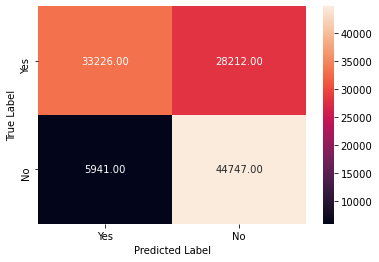

In [193]:
draw_cm(y_train,predicted_train)

In [194]:
print('\nTraining data')
matrix = confusion_matrix(y_train,predicted_train)
print(matrix)
measures_train = classification_report(y_train,predicted_train)
print(measures_train)


Training data
[[44747  5941]
 [28212 33226]]
              precision    recall  f1-score   support

           0       0.61      0.88      0.72     50688
           1       0.85      0.54      0.66     61438

    accuracy                           0.70    112126
   macro avg       0.73      0.71      0.69    112126
weighted avg       0.74      0.70      0.69    112126



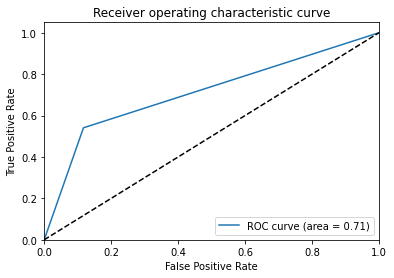

(array([0.        , 0.11720723, 1.        ]),
 array([0.        , 0.54080536, 1.        ]),
 array([2, 1, 0]))

In [195]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(ada_tuned,X_train,y_train,scoring=scoring)
draw_roc(y_train,predicted_train)

In [196]:
predicted_test = ada_tuned.predict(X_test)

In [197]:
print('\nTesting data')
matrix = confusion_matrix(y_test,predicted_test)
print(matrix)
measures_test = classification_report(y_test,predicted_test)
print(measures_test)


Testing data
[[19162  2562]
 [12017 14314]]
              precision    recall  f1-score   support

           0       0.61      0.88      0.72     21724
           1       0.85      0.54      0.66     26331

    accuracy                           0.70     48055
   macro avg       0.73      0.71      0.69     48055
weighted avg       0.74      0.70      0.69     48055



/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


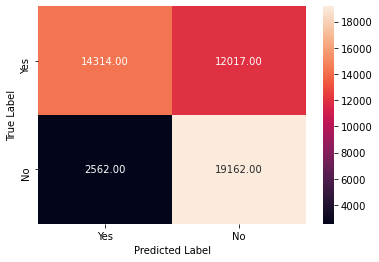

In [198]:
draw_cm(y_test,predicted_test)

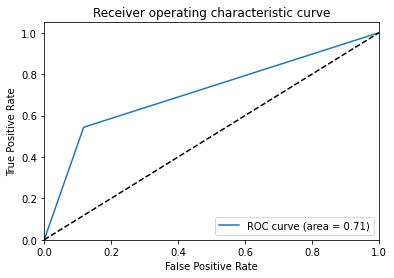

(array([0.        , 0.11793408, 1.        ]),
 array([0.        , 0.54361779, 1.        ]),
 array([2, 1, 0]))

In [199]:
draw_roc(y_test,predicted_test)

In [14]:
df_len1 = {'Model':'AdaBoost tuned',
       'Training Precision_1':0.85,
       'Testing Precision_1':0.85,
       'Training Recall_1':0.54,
       'Testing Recall_1':0.54,
       'Training f1_weighted':0.69,
       'Testing f1_weighted':0.69,
       'Training Accuracy':0.70,
       'Testing Accuracy':0.70,
       'AUROC Train':0.71,
       'AUROC Test':0.71
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                     Unpruned decision Tree                  1.00   
1                  depth tuned decision Tree                  0.99   
2                 cutoff tuned decision tree                  0.89   
3   Logistic regression without tuned cutoff                  0.56   
4      Logistic regression with tuned cutoff                  0.48   
5                          KNN Model untuned                  0.75   
6                            KNN Model tuned                  0.85   
7                KNN Model tuned with cutoff                  0.70   
8                      Random Forest untuned                  1.00   
9                        Random Forest tuned                  1.00   
10           Random Forest tuned with cutoff                  0.99   
11                          AdaBoost untuned                  0.85   
12                            AdaBoost tuned                  0.85   

    Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                  0.84               1.00              0.84   
1                  0.83               0.99              0.83   
2                  0.79               0.99              0.80   
3                  0.56               0.87              0.87   
4                  0.48               0.72              0.72   
5                  0.67               0.79              0.71   
6                  0.72               0.86              0.74   
7                  0.59               0.95              0.85   
8                  0.85               1.00              0.68   
9                  0.85               1.00              0.68   
10                 0.65               1.00              0.90   
11                 0.85               0.54              0.68   
12                 0.85               0.54              0.54   

    Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0               1.000000             0.820000               1.00   
1               0.990000             0.820000               0.99   
2               0.980000             0.790000               0.99   
3               0.490000             0.490000               0.55   
4               0.576000             2.000000               0.53   
5               0.740000             0.650000               0.74   
6               0.840000             0.700000               0.84   
7               0.806061             0.696528               0.79   
8               1.000000             0.780000               1.00   
9               1.000000             0.760000               1.00   
10              0.994975             0.754839               0.99   
11              0.690000             0.760000               0.70   
12              0.690000             0.690000               0.70   

    Testing Accuracy  AUROC Train  AUROC Test  
0               0.82         1.00        0.82  
1               0.81         0.99        0.82  
2               0.81         0.99        0.82  
3               0.55         0.52        0.52  
4               0.52         0.55        0.54  
5               0.65         0.73        0.64  
6               0.70         0.84        0.70  
7               0.67         0.81        0.69  
8               0.76         1.00        0.77  
9               0.76         1.00        0.77  
10              0.74         1.00        0.75  
11              0.76         0.71        0.76  
12              0.70         0.71        0.71

## cutoff tuning of adaboost

In [201]:
predicted_proba_train = ada_tuned.predict_proba(X_train)[:,1]

{'fpr': 0.1165759154040404,
 'tpr': 0.540349620755884,
 'threshold': 0.5005256605939634}

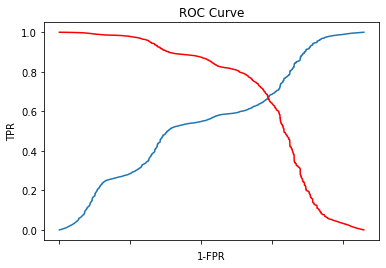

In [202]:
fpr,tpr,thresholds = roc_curve(y_train,predicted_proba_train)
get_youdens_cutoff(fpr,tpr,thresholds)

In [203]:
# since effective threshold is same as 0.5 we won't be tuning the cutoff.

# Gradient Boosting

In [204]:
from sklearn.ensemble import GradientBoostingClassifier

In [205]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [206]:
predicted_train = gb.predict(X_train)

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


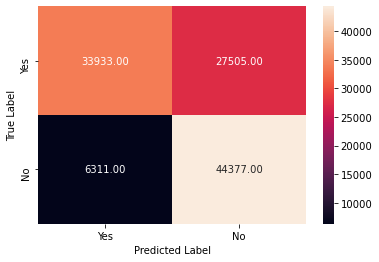

In [207]:
draw_cm(y_train,predicted_train)

In [208]:
print('\nTraining data')
matrix = confusion_matrix(y_train,predicted_train)
print(matrix)
measures_train = classification_report(y_train,predicted_train)
print(measures_train)


Training data
[[44377  6311]
 [27505 33933]]
              precision    recall  f1-score   support

           0       0.62      0.88      0.72     50688
           1       0.84      0.55      0.67     61438

    accuracy                           0.70    112126
   macro avg       0.73      0.71      0.70    112126
weighted avg       0.74      0.70      0.69    112126



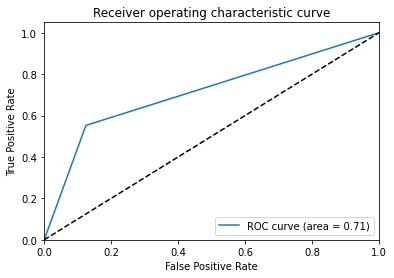

(array([0.        , 0.12450679, 1.        ]),
 array([0.       , 0.5523129, 1.       ]),
 array([2, 1, 0]))

In [209]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(gb,X_train,y_train,scoring=scoring)
draw_roc(y_train,predicted_train)

In [210]:
predicted_test = gb.predict(X_test)

In [211]:
print('\nTesting data')
matrix = confusion_matrix(y_test,predicted_test)
print(matrix)
measures_test = classification_report(y_test,predicted_test)
print(measures_test)


Testing data
[[18978  2746]
 [11762 14569]]
              precision    recall  f1-score   support

           0       0.62      0.87      0.72     21724
           1       0.84      0.55      0.67     26331

    accuracy                           0.70     48055
   macro avg       0.73      0.71      0.70     48055
weighted avg       0.74      0.70      0.69     48055



/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


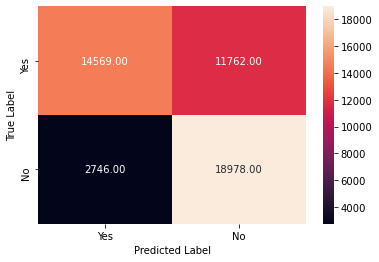

In [212]:
draw_cm(y_test,predicted_test)

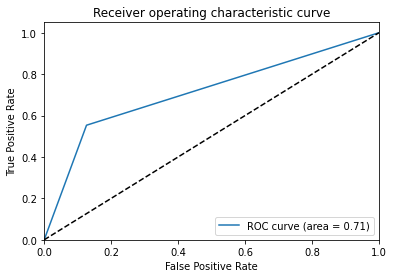

(array([0.        , 0.12640398, 1.        ]),
 array([0.        , 0.55330219, 1.        ]),
 array([2, 1, 0]))

In [213]:
draw_roc(y_test,predicted_test)

In [15]:
df_len1 = {'Model':'GradientBoost untuned',
       'Training Precision_1':0.84,
       'Testing Precision_1':0.84,
       'Training Recall_1':0.55,
       'Testing Recall_1':0.55,
       'Training f1_weighted':0.69,
       'Testing f1_weighted':0.69,
       'Training Accuracy':0.70,
       'Testing Accuracy':0.70,
       'AUROC Train':0.71,
       'AUROC Test':0.71
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                     Unpruned decision Tree                  1.00   
1                  depth tuned decision Tree                  0.99   
2                 cutoff tuned decision tree                  0.89   
3   Logistic regression without tuned cutoff                  0.56   
4      Logistic regression with tuned cutoff                  0.48   
5                          KNN Model untuned                  0.75   
6                            KNN Model tuned                  0.85   
7                KNN Model tuned with cutoff                  0.70   
8                      Random Forest untuned                  1.00   
9                        Random Forest tuned                  1.00   
10           Random Forest tuned with cutoff                  0.99   
11                          AdaBoost untuned                  0.85   
12                            AdaBoost tuned                  0.85   
13                     GradientBoost untuned                  0.84   

    Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                  0.84               1.00              0.84   
1                  0.83               0.99              0.83   
2                  0.79               0.99              0.80   
3                  0.56               0.87              0.87   
4                  0.48               0.72              0.72   
5                  0.67               0.79              0.71   
6                  0.72               0.86              0.74   
7                  0.59               0.95              0.85   
8                  0.85               1.00              0.68   
9                  0.85               1.00              0.68   
10                 0.65               1.00              0.90   
11                 0.85               0.54              0.68   
12                 0.85               0.54              0.54   
13                 0.84               0.55              0.55   

    Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0               1.000000             0.820000               1.00   
1               0.990000             0.820000               0.99   
2               0.980000             0.790000               0.99   
3               0.490000             0.490000               0.55   
4               0.576000             2.000000               0.53   
5               0.740000             0.650000               0.74   
6               0.840000             0.700000               0.84   
7               0.806061             0.696528               0.79   
8               1.000000             0.780000               1.00   
9               1.000000             0.760000               1.00   
10              0.994975             0.754839               0.99   
11              0.690000             0.760000               0.70   
12              0.690000             0.690000               0.70   
13              0.690000             0.690000               0.70   

    Testing Accuracy  AUROC Train  AUROC Test  
0               0.82         1.00        0.82  
1               0.81         0.99        0.82  
2               0.81         0.99        0.82  
3               0.55         0.52        0.52  
4               0.52         0.55        0.54  
5               0.65         0.73        0.64  
6               0.70         0.84        0.70  
7               0.67         0.81        0.69  
8               0.76         1.00        0.77  
9               0.76         1.00        0.77  
10              0.74         1.00        0.75  
11              0.76         0.71        0.76  
12              0.70         0.71        0.71  
13              0.70         0.71        0.71

## tuning Gradientboost

In [217]:
tune_params = {'max_depth':[3,4,5,6,7,8,9]}

In [218]:
rand = RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=tune_params,cv=3,verbose=2,scoring='accuracy',n_iter=8)
rand.fit(X_train,y_train)

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 7 is smaller than n_iter=8. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END ........................................max_depth=3; total time=  24.5s
[CV] END ........................................max_depth=3; total time=  24.5s
[CV] END ........................................max_depth=3; total time=  24.0s
[CV] END ........................................max_depth=4; total time=  32.4s
[CV] END ........................................max_depth=4; total time=  32.3s
[CV] END ........................................max_depth=4; total time=  32.0s
[CV] END ........................................max_depth=5; total time=  40.7s
[CV] END ........................................max_depth=5; total time=  40.5s
[CV] END ........................................max_depth=5; total time=  40.6s
[CV] END ........................................max_depth=6; total time=  48.6s
[CV] END ........................................max_depth=6; total time=  49.6s
[CV] END ........................................

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=8,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9]},
                   scoring='accuracy', verbose=2)

In [219]:
rand.best_params_

{'max_depth': 9}

In [220]:
gb_tuned = GradientBoostingClassifier(max_depth=9)
gb_tuned.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=9)

In [221]:
predicted_train = gb.predict(X_train)

In [222]:
print('\nTraining data')
matrix = confusion_matrix(y_train,predicted_train)
print(matrix)
measures_train = classification_report(y_train,predicted_train)
print(measures_train)


Training data
[[44377  6311]
 [27505 33933]]
              precision    recall  f1-score   support

           0       0.62      0.88      0.72     50688
           1       0.84      0.55      0.67     61438

    accuracy                           0.70    112126
   macro avg       0.73      0.71      0.70    112126
weighted avg       0.74      0.70      0.69    112126



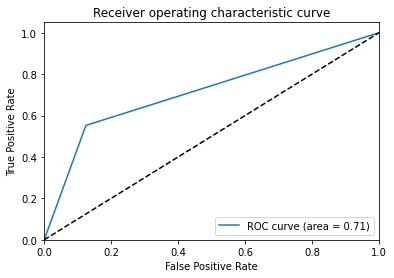

(array([0.        , 0.12450679, 1.        ]),
 array([0.       , 0.5523129, 1.       ]),
 array([2, 1, 0]))

In [223]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(gb,X_train,y_train,scoring=scoring)
draw_roc(y_train,predicted_train)

In [224]:
predicted_test = gb.predict(X_test)

In [225]:
print('\nTesting data')
matrix = confusion_matrix(y_test,predicted_test)
print(matrix)
measures_test = classification_report(y_test,predicted_test)
print(measures_test)


Testing data
[[18978  2746]
 [11762 14569]]
              precision    recall  f1-score   support

           0       0.62      0.87      0.72     21724
           1       0.84      0.55      0.67     26331

    accuracy                           0.70     48055
   macro avg       0.73      0.71      0.70     48055
weighted avg       0.74      0.70      0.69     48055



/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


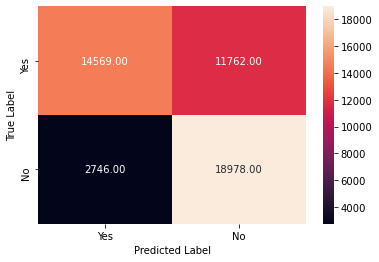

In [226]:
draw_cm(y_test,predicted_test)

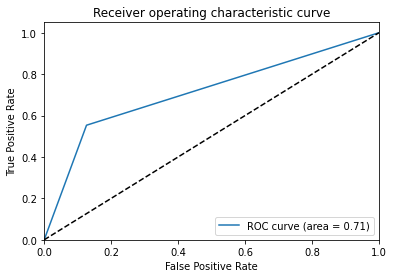

(array([0.        , 0.12640398, 1.        ]),
 array([0.        , 0.55330219, 1.        ]),
 array([2, 1, 0]))

In [227]:
draw_roc(y_test,predicted_test)

In [114]:
df_len1 = {'Model':'GradientBoost tuned',
       'Training Precision_1':0.84,
       'Testing Precision_1':0.84,
       'Training Recall_1':0.55,
       'Testing Recall_1':0.55,
       'Training f1_weighted':0.69,
       'Testing f1_weighted':0.69,
       'Training Accuracy':0.70,
       'Testing Accuracy':0.70,
       'AUROC Train':0.71,
       'AUROC Test':0.71
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                     Unpruned decision Tree                  1.00   
1                  depth tuned decision Tree                  0.99   
2                 cutoff tuned decision tree                  0.89   
3   Logistic regression without tuned cutoff                  0.56   
4      Logistic regression with tuned cutoff                  0.48   
5                          KNN Model untuned                  0.75   
6                            KNN Model tuned                  0.85   
7                KNN Model tuned with cutoff                  0.70   
8                      Random Forest untuned                  1.00   
9                        Random Forest tuned                  1.00   
10           Random Forest tuned with cutoff                  0.99   
11                          AdaBoost untuned                  0.85   
12                            AdaBoost tuned                  0.85   
13                     GradientBoost untuned                  0.84   
14                       GradientBoost tuned                  0.84   

    Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                  0.84               1.00              0.84   
1                  0.83               0.99              0.83   
2                  0.79               0.99              0.80   
3                  0.56               0.87              0.87   
4                  0.48               0.72              0.72   
5                  0.67               0.79              0.71   
6                  0.72               0.86              0.74   
7                  0.59               0.95              0.85   
8                  0.85               1.00              0.68   
9                  0.85               1.00              0.68   
10                 0.65               1.00              0.90   
11                 0.85               0.54              0.68   
12                 0.85               0.54              0.54   
13                 0.84               0.55              0.55   
14                 0.84               0.55              0.55   

    Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0               1.000000             0.820000               1.00   
1               0.990000             0.820000               0.99   
2               0.980000             0.790000               0.99   
3               0.490000             0.490000               0.55   
4               0.576000             2.000000               0.53   
5               0.740000             0.650000               0.74   
6               0.840000             0.700000               0.84   
7               0.806061             0.696528               0.79   
8               1.000000             0.780000               1.00   
9               1.000000             0.760000               1.00   
10              0.994975             0.754839               0.99   
11              0.690000             0.760000               0.70   
12              0.690000             0.690000               0.70   
13              0.690000             0.690000               0.70   
14              0.690000             0.690000               0.70   

    Testing Accuracy  AUROC Train  AUROC Test  
0               0.82         1.00        0.82  
1               0.81         0.99        0.82  
2               0.81         0.99        0.82  
3               0.55         0.52        0.52  
4               0.52         0.55        0.54  
5               0.65         0.73        0.64  
6               0.70         0.84        0.70  
7               0.67         0.81        0.69  
8               0.76         1.00        0.77  
9               0.76         1.00        0.77  
10              0.74         1.00        0.75  
11              0.76         0.71        0.76  
12              0.70         0.71        0.71  
13              0.70         0.71        0.71  
14              0.70         0.71        0.71

## cutoff tuning of Gradientboosting

In [229]:
predicted_proba_train = gb_tuned.predict_proba(X_train)[:,1]

{'fpr': 0.16321417297979798,
 'tpr': 0.8317816335167161,
 'threshold': 0.4180635204367287}

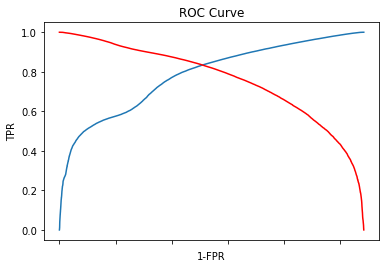

In [230]:
fpr,tpr,thresholds = roc_curve(y_train,predicted_proba_train)
get_youdens_cutoff(fpr,tpr,thresholds)

In [231]:
# optimum threshold = 0.4180

In [232]:
thresh_train_df_len = pd.DataFrame()
thresh_train_df_len['Actual'] = y_train
threshold = 0.4180
cutoff_df_len = pd.DataFrame()

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[51108 10330]
 [ 8283 42405]]


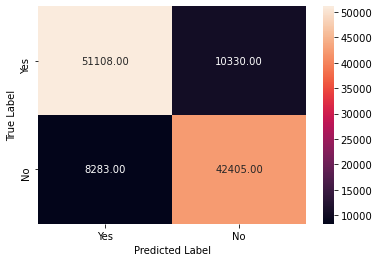

In [233]:
thresh_train_df_len['Probability'] = predicted_proba_train
thresh_train_df_len['pred'] = thresh_train_df_len['Probability'].map(lambda x: 1 if x>threshold else 0)
cm = confusion_matrix(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'],[1,0])
print(cm)
draw_cm(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'])

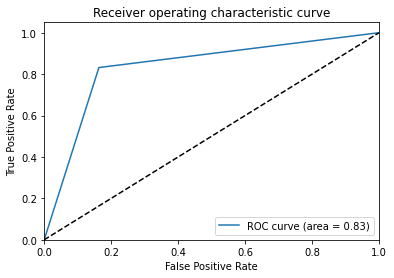

   Threshold    Recall  Precision  Accuracy_ratio
0      0.418  0.836589   0.804115       83.399925


In [234]:
draw_roc(thresh_train_df_len['Actual'].astype('int'),thresh_train_df_len['pred'])
precision = np.diag(cm)/np.sum(cm,axis=0)
recall = np.diag(cm)/np.sum(cm,axis=1)

accuracy_ratio = ((cm[0,0] + cm[1,1])*100 )/((cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))
recall_positive = recall[1]
precision_positive = precision[1]
cutoff_df_len_ind = pd.DataFrame({'Threshold':threshold,'Recall':recall_positive,'Precision':precision_positive,'Accuracy_ratio':accuracy_ratio},index=[0])
print(cutoff_df_len_ind)

In [235]:
thresh_test_df_len = pd.DataFrame()
thresh_test_df_len['Actual'] = y_test
threshold = 0.4180
cutoff_df_len = pd.DataFrame()

In [236]:
predicted_proba_test = rfc_tuned.predict_proba(X_test)[:,1]

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[21645  4686]
 [ 6419 15305]]


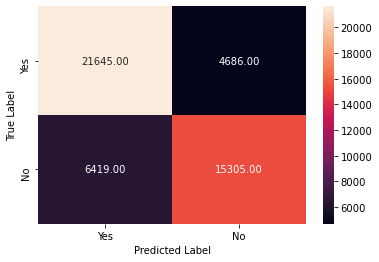

In [237]:
thresh_test_df_len['Probability'] = predicted_proba_test
thresh_test_df_len['pred'] = thresh_test_df_len['Probability'].map(lambda x: 1 if x>threshold else 0)
cm = confusion_matrix(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'],[1,0])
print(cm)
draw_cm(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'])

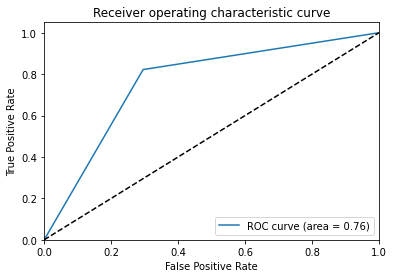

   Threshold   Recall  Precision  Accuracy_ratio
0      0.418  0.70452   0.765595       76.891062


In [238]:
draw_roc(thresh_test_df_len['Actual'].astype('int'),thresh_test_df_len['pred'])
precision = np.diag(cm)/np.sum(cm,axis=0)
recall = np.diag(cm)/np.sum(cm,axis=1)

accuracy_ratio = ((cm[0,0] + cm[1,1])*100 )/((cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))
recall_positive = recall[1]
precision_positive = precision[1]
cutoff_df_len_ind = pd.DataFrame({'Threshold':threshold,'Recall':recall_positive,'Precision':precision_positive,'Accuracy_ratio':accuracy_ratio},index=[0])
print(cutoff_df_len_ind)

In [16]:
df_len1 = {'Model':'GradientBoost tuned with cutoff',
       'Training Precision_1':0.80,
       'Testing Precision_1':0.77,
       'Training Recall_1':0.84,
       'Testing Recall_1':0.70,
       'Training f1_weighted':2*0.80*0.84/(0.80+0.84),
       'Testing f1_weighted':2*0.77*0.70/(0.77+0.70),
       'Training Accuracy':0.84,
       'Testing Accuracy':0.77,
       'AUROC Train':0.83,
       'AUROC Test':0.76
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                     Unpruned decision Tree                  1.00   
1                  depth tuned decision Tree                  0.99   
2                 cutoff tuned decision tree                  0.89   
3   Logistic regression without tuned cutoff                  0.56   
4      Logistic regression with tuned cutoff                  0.48   
5                          KNN Model untuned                  0.75   
6                            KNN Model tuned                  0.85   
7                KNN Model tuned with cutoff                  0.70   
8                      Random Forest untuned                  1.00   
9                        Random Forest tuned                  1.00   
10           Random Forest tuned with cutoff                  0.99   
11                          AdaBoost untuned                  0.85   
12                            AdaBoost tuned                  0.85   
13                     GradientBoost untuned                  0.84   
14           GradientBoost tuned with cutoff                  0.80   

    Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                  0.84               1.00              0.84   
1                  0.83               0.99              0.83   
2                  0.79               0.99              0.80   
3                  0.56               0.87              0.87   
4                  0.48               0.72              0.72   
5                  0.67               0.79              0.71   
6                  0.72               0.86              0.74   
7                  0.59               0.95              0.85   
8                  0.85               1.00              0.68   
9                  0.85               1.00              0.68   
10                 0.65               1.00              0.90   
11                 0.85               0.54              0.68   
12                 0.85               0.54              0.54   
13                 0.84               0.55              0.55   
14                 0.77               0.84              0.70   

    Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0               1.000000             0.820000               1.00   
1               0.990000             0.820000               0.99   
2               0.980000             0.790000               0.99   
3               0.490000             0.490000               0.55   
4               0.576000             2.000000               0.53   
5               0.740000             0.650000               0.74   
6               0.840000             0.700000               0.84   
7               0.806061             0.696528               0.79   
8               1.000000             0.780000               1.00   
9               1.000000             0.760000               1.00   
10              0.994975             0.754839               0.99   
11              0.690000             0.760000               0.70   
12              0.690000             0.690000               0.70   
13              0.690000             0.690000               0.70   
14              0.819512             0.733333               0.84   

    Testing Accuracy  AUROC Train  AUROC Test  
0               0.82         1.00        0.82  
1               0.81         0.99        0.82  
2               0.81         0.99        0.82  
3               0.55         0.52        0.52  
4               0.52         0.55        0.54  
5               0.65         0.73        0.64  
6               0.70         0.84        0.70  
7               0.67         0.81        0.69  
8               0.76         1.00        0.77  
9               0.76         1.00        0.77  
10              0.74         1.00        0.75  
11              0.76         0.71        0.76  
12              0.70         0.71        0.71  
13              0.70         0.71        0.71  
14              0.77         0.83        0.76

In [20]:
ms = pd.read_csv('model_summary.csv')
ms.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
ms

Model  Training Precision_1  \
0                     Unpruned decision Tree                  1.00   
1                  depth tuned decision Tree                  0.99   
2                 cutoff tuned decision tree                  0.89   
3   Logistic regression without tuned cutoff                  0.56   
4      Logistic regression with tuned cutoff                  0.48   
5                          KNN Model untuned                  0.75   
6                            KNN Model tuned                  0.85   
7                KNN Model tuned with cutoff                  0.70   
8                      Random Forest untuned                  1.00   
9                        Random Forest tuned                  1.00   
10           Random Forest tuned with cutoff                  0.99   
11                          AdaBoost untuned                  0.85   
12                            AdaBoost tuned                  0.85   
13                     GradientBoost untuned                  0.84   
14           GradientBoost tuned with cutoff                  0.80   

    Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                  0.84               1.00              0.84   
1                  0.83               0.99              0.83   
2                  0.79               0.99              0.80   
3                  0.56               0.87              0.87   
4                  0.48               0.72              0.72   
5                  0.67               0.79              0.71   
6                  0.72               0.86              0.74   
7                  0.59               0.95              0.85   
8                  0.85               1.00              0.68   
9                  0.85               1.00              0.68   
10                 0.65               1.00              0.90   
11                 0.85               0.54              0.68   
12                 0.85               0.54              0.54   
13                 0.84               0.55              0.55   
14                 0.77               0.84              0.70   

    Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0               1.000000             0.820000               1.00   
1               0.990000             0.820000               0.99   
2               0.980000             0.790000               0.99   
3               0.490000             0.490000               0.55   
4               0.576000             2.000000               0.53   
5               0.740000             0.650000               0.74   
6               0.840000             0.700000               0.84   
7               0.806061             0.696528               0.79   
8               1.000000             0.780000               1.00   
9               1.000000             0.760000               1.00   
10              0.994975             0.754839               0.99   
11              0.690000             0.760000               0.70   
12              0.690000             0.690000               0.70   
13              0.690000             0.690000               0.70   
14              0.819512             0.733333               0.84   

    Testing Accuracy  AUROC Train  AUROC Test  
0               0.82         1.00        0.82  
1               0.81         0.99        0.82  
2               0.81         0.99        0.82  
3               0.55         0.52        0.52  
4               0.52         0.55        0.54  
5               0.65         0.73        0.64  
6               0.70         0.84        0.70  
7               0.67         0.81        0.69  
8               0.76         1.00        0.77  
9               0.76         1.00        0.77  
10              0.74         1.00        0.75  
11              0.76         0.71        0.76  
12              0.70         0.71        0.71  
13              0.70         0.71        0.71  
14              0.77         0.83        0.76

In [3]:
X = df_len.drop(['Unnamed: 0','Late_delivery_risk_1'],axis=1)
y = df_len['Late_delivery_risk_1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
gbc_final= GradientBoostingClassifier(n_estimators=50,max_depth=19,learning_rate=0.1)
gbc_final.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=19, n_estimators=50)

In [30]:
predicted_train = gbc_final.predict(X_train)

In [31]:
print('\nTraining data')
matrix = confusion_matrix(y_train,predicted_train)
print(matrix)
measures_train = classification_report(y_train,predicted_train)
print(measures_train)


Training data
[[57774   115]
 [  839 69416]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     57889
           1       1.00      0.99      0.99     70255

    accuracy                           0.99    128144
   macro avg       0.99      0.99      0.99    128144
weighted avg       0.99      0.99      0.99    128144



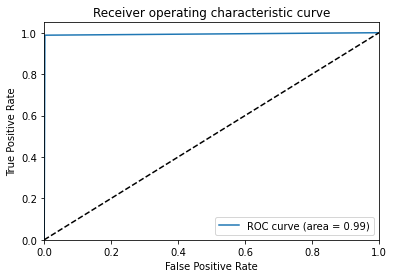

(array([0.        , 0.00198656, 1.        ]),
 array([0.        , 0.98805779, 1.        ]),
 array([2, 1, 0]))

In [35]:
n_splits = 10
random_state = 12345
scoring = 'roc_auc'
kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
auc_train = cross_val_score(gbc_final,X_train,y_train,scoring=scoring)
draw_roc(y_train,predicted_train)

In [36]:
predicted_test = gbc_final.predict(X_test)

In [37]:
print('\nTesting data')
matrix = confusion_matrix(y_test,predicted_test)
print(matrix)
measures_test = classification_report(y_test,predicted_test)
print(measures_test)


Testing data
[[13198  1325]
 [ 2392 15122]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     14523
           1       0.92      0.86      0.89     17514

    accuracy                           0.88     32037
   macro avg       0.88      0.89      0.88     32037
weighted avg       0.89      0.88      0.88     32037



/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


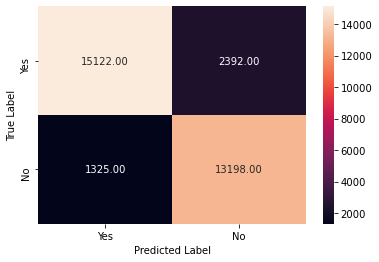

In [38]:
draw_cm(y_test,predicted_test)

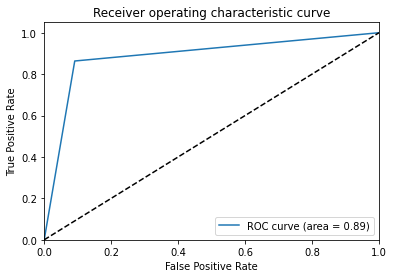

(array([0.        , 0.09123459, 1.        ]),
 array([0.        , 0.86342355, 1.        ]),
 array([2, 1, 0]))

In [39]:
draw_roc(y_test,predicted_test)

In [41]:
df_len1 = {'Model':'GradientBoost Final Tuned Model',
       'Training Precision_1':1,
       'Testing Precision_1':0.92,
       'Training Recall_1':0.99,
       'Testing Recall_1':0.70,
       'Training f1_weighted':0.99,
       'Testing f1_weighted':0.88,
       'Training Accuracy':0.99,
       'Testing Accuracy':0.88,
       'AUROC Train':0.99,
       'AUROC Test':0.89
      }
model_summary = model_summary.append(df_len1,ignore_index=True)
model_summary

Model  Training Precision_1  \
0                     Unpruned decision Tree                  1.00   
1                  depth tuned decision Tree                  0.99   
2                 cutoff tuned decision tree                  0.89   
3   Logistic regression without tuned cutoff                  0.56   
4      Logistic regression with tuned cutoff                  0.48   
5                          KNN Model untuned                  0.75   
6                            KNN Model tuned                  0.85   
7                KNN Model tuned with cutoff                  0.70   
8                      Random Forest untuned                  1.00   
9                        Random Forest tuned                  1.00   
10           Random Forest tuned with cutoff                  0.99   
11                          AdaBoost untuned                  0.85   
12                            AdaBoost tuned                  0.85   
13                     GradientBoost untuned                  0.84   
14           GradientBoost tuned with cutoff                  0.80   
15           GradientBoost Final Tuned Model                  1.00   

    Testing Precision_1  Training Recall_1  Testing Recall_1  \
0                  0.84               1.00              0.84   
1                  0.83               0.99              0.83   
2                  0.79               0.99              0.80   
3                  0.56               0.87              0.87   
4                  0.48               0.72              0.72   
5                  0.67               0.79              0.71   
6                  0.72               0.86              0.74   
7                  0.59               0.95              0.85   
8                  0.85               1.00              0.68   
9                  0.85               1.00              0.68   
10                 0.65               1.00              0.90   
11                 0.85               0.54              0.68   
12                 0.85               0.54              0.54   
13                 0.84               0.55              0.55   
14                 0.77               0.84              0.70   
15                 0.92               0.99              0.70   

    Training f1_weighted  Testing f1_weighted  Training Accuracy  \
0               1.000000             0.820000               1.00   
1               0.990000             0.820000               0.99   
2               0.980000             0.790000               0.99   
3               0.490000             0.490000               0.55   
4               0.576000             2.000000               0.53   
5               0.740000             0.650000               0.74   
6               0.840000             0.700000               0.84   
7               0.806061             0.696528               0.79   
8               1.000000             0.780000               1.00   
9               1.000000             0.760000               1.00   
10              0.994975             0.754839               0.99   
11              0.690000             0.760000               0.70   
12              0.690000             0.690000               0.70   
13              0.690000             0.690000               0.70   
14              0.819512             0.733333               0.84   
15              0.990000             0.880000               0.99   

    Testing Accuracy  AUROC Train  AUROC Test  
0               0.82         1.00        0.82  
1               0.81         0.99        0.82  
2               0.81         0.99        0.82  
3               0.55         0.52        0.52  
4               0.52         0.55        0.54  
5               0.65         0.73        0.64  
6               0.70         0.84        0.70  
7               0.67         0.81        0.69  
8               0.76         1.00        0.77  
9               0.76         1.00        0.77  
10              0.74         1.00        0.75  
11              0.76      

In [42]:
gbc1= GradientBoostingClassifier(n_estimators=50,max_depth=19,learning_rate=0.1)
scores = cross_val_score(gbc1,X_train,y_train,cv=5,scoring='f1_weighted',)
print(scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

[0.84319059 0.84360394 0.84187745 0.85191908 0.85144615]
Bias error: 0.153592558894049
Variance error: 0.005136182603568692


In [47]:
gbc20= GradientBoostingClassifier(n_estimators=50,max_depth=20,learning_rate=0.1)
scores20 = cross_val_score(gbc2,X_train,y_train,cv=5,scoring='f1_weighted')
print(scores20)
print('Bias error:',1-np.mean(scores20))
print('Variance error:', np.std(scores20)/np.mean(scores20))

[0.8444272  0.85519055 0.85279831 0.8523097  0.85818006]
Bias error: 0.14741883666119193
Variance error: 0.005368913259793521


In [48]:
gbc10= GradientBoostingClassifier(n_estimators=50,max_depth=10,learning_rate=0.1)
scores10 = cross_val_score(gbc10,X_train,y_train,cv=5,scoring='f1_weighted')
print(scores10)
print('Bias error:',1-np.mean(scores10))
print('Variance error:', np.std(scores10)/np.mean(scores10))

[0.73107244 0.73037216 0.7270431  0.73657684 0.73469258]
Bias error: 0.2680485747875476
Variance error: 0.004583093948761216


In [49]:
gbc30= GradientBoostingClassifier(n_estimators=50,max_depth=30,learning_rate=0.1)
scores30 = cross_val_score(gbc30,X_train,y_train,cv=5,scoring='f1_weighted')
print(scores30)
print('Bias error:',1-np.mean(scores30))
print('Variance error:', np.std(scores30)/np.mean(scores30))

[0.88171995 0.88487641 0.88103243 0.88117874 0.87619436]
Bias error: 0.11899962218161586
Variance error: 0.0031567295553953474


In [50]:
gbc40= GradientBoostingClassifier(n_estimators=50,max_depth=40,learning_rate=0.1)
scores40 = cross_val_score(gbc40,X_train,y_train,cv=5,scoring='f1_weighted')
print(scores40)
print('Bias error:',1-np.mean(scores40))
print('Variance error:', np.std(scores40)/np.mean(scores40))

[0.86391817 0.85644129 0.83930078 0.86754117 0.84414314]
Bias error: 0.1457310880112479
Variance error: 0.012829132689800652


In [51]:
gbc60= GradientBoostingClassifier(n_estimators=50,max_depth=60,learning_rate=0.1)
scores60 = cross_val_score(gbc60,X_train,y_train,cv=5,scoring='f1_weighted')
print(scores60)
print('Bias error:',1-np.mean(scores60))
print('Variance error:', np.std(scores60)/np.mean(scores60))

[0.8003217  0.80093298 0.80219213 0.80415416 0.80652339]
Bias error: 0.1971751265849937
Variance error: 0.0028235083451077073


In [52]:
gbc80= GradientBoostingClassifier(n_estimators=50,max_depth=80,learning_rate=0.1)
scores80 = cross_val_score(gbc80,X_train,y_train,cv=5,scoring='f1_weighted')
print(scores80)
print('Bias error:',1-np.mean(scores80))
print('Variance error:', np.std(scores80)/np.mean(scores80))

[0.80224034 0.80142692 0.7883719  0.80165791 0.80645429]
Bias error: 0.19996972832093862
Variance error: 0.007637405621765224


In [62]:
gbc1= GradientBoostingClassifier(n_estimators=50,max_depth=1,learning_rate=0.1)
scores1 = cross_val_score(gbc1,X_train,y_train,cv=5,scoring='f1_weighted')
print(scores1)
print('Bias error:',1-np.mean(scores1))
print('Variance error:', np.std(scores1)/np.mean(scores1))

[0.69021919 0.68823295 0.68660967 0.69081046 0.6902326 ]
Bias error: 0.3107790257042553
Variance error: 0.0022794939041713208


In [63]:
bias_errr_lst = [1-np.mean(scores1) ,1-np.mean(scores10),1-np.mean(scores20),1-np.mean(scores30),1-np.mean(scores40),1-np.mean(scores60),1-np.mean(scores80) ]
var_err_lst = [np.std(scores1)/np.mean(scores1) , np.std(scores10)/np.mean(scores10), np.std(scores20)/np.mean(scores20), np.std(scores30)/np.mean(scores30), 
               np.std(scores40)/np.mean(scores40), np.std(scores60)/np.mean(scores60), np.std(scores80)/np.mean(scores80) ]



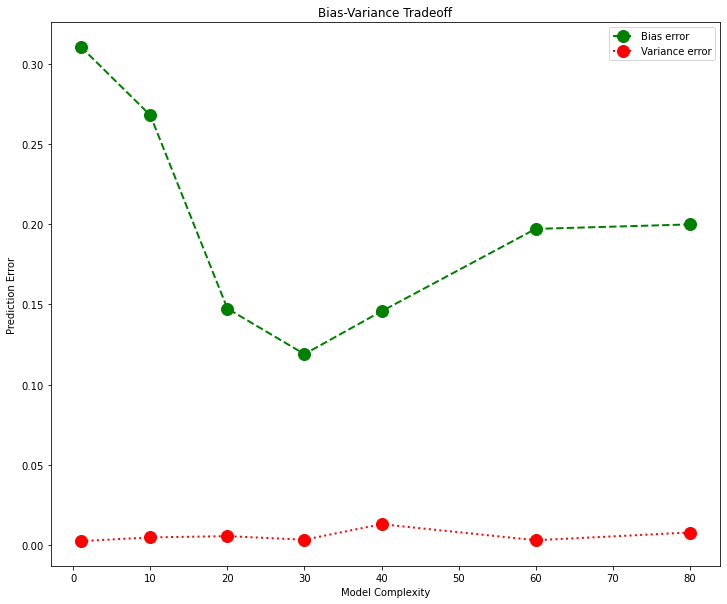

In [64]:
complexity = [1,10,20,30,40,60,80]
plt.figure(figsize=(12,10))
plt.plot(complexity, bias_errr_lst, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12,label='Bias error')
plt.plot(complexity, var_err_lst, color='red', marker='o', linestyle='dotted',linewidth=2, markersize=12,label='Variance error')
plt.xlabel('Model Complexity')
plt.ylabel('Prediction Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

In [65]:
feat_imp = pd.DataFrame({'Features':X.columns,'Importances':gbc_final.feature_importances_})
feat_imp.head()

Features  Importances
0  Order Item Discount Rate     0.017802
1  Order Item Product Price     0.007617
2                     Sales     0.011892
3    Order Profit Per Order     0.031053
4     Order Item Quantity_1     0.001179

In [68]:
feat_imp.sort_values('Importances',ascending=False,inplace=True)

<AxesSubplot:xlabel='Importances', ylabel='Features'>

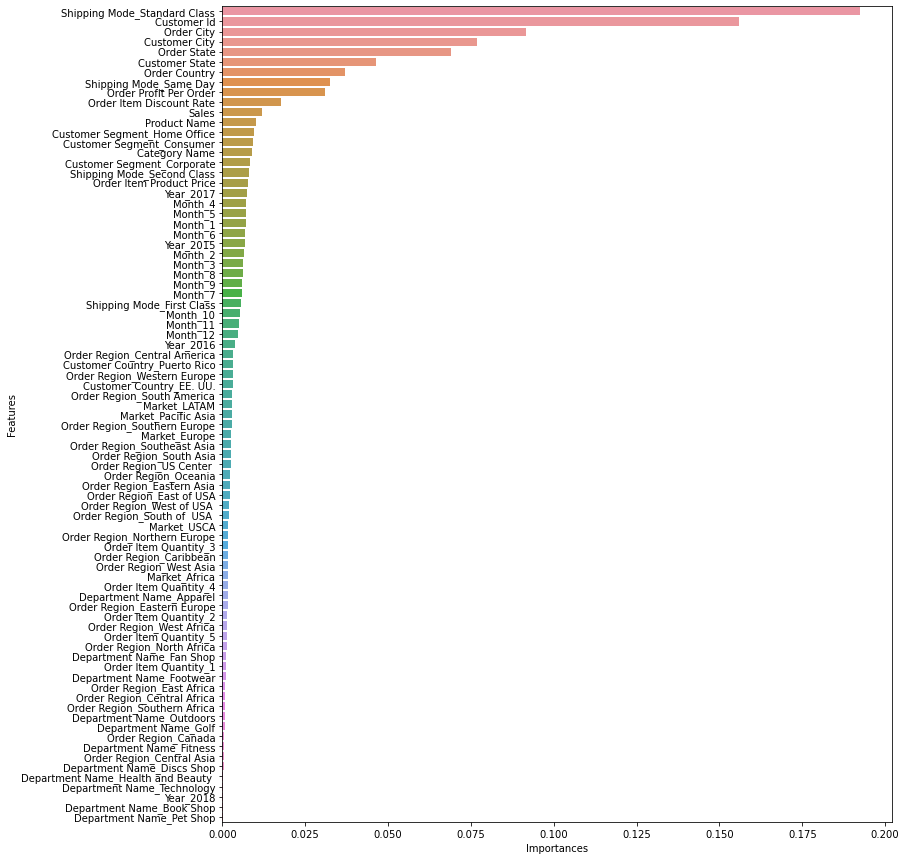

In [71]:
plt.figure(figsize=(12,15))
sns.barplot(x=feat_imp['Importances'],y=feat_imp['Features'])

In [ ]:
# Therefore, customer having shipping mode as standard class, and ordering from certain cities while they themselves residing in certain cities
# have an impact on late deliveries which is consistent with what we saw using statistical tests.